In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import sklearn
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import pylab
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot


pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
sns.set(rc={"figure.figsize": (12.7, 8.27)})

In [2]:
path = "/Users/kamil/Desktop/Otomoto_projekt/data_csv"  # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, converters={"features": pd.eval})
    li.append(df)

otomoto_df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
otomoto_df.shape

(115148, 23)

In [4]:
otomoto_df.link.nunique()

115061

In [5]:
otomoto_df.columns

Index(['Unnamed: 0', 'link', 'condition', 'features', 'state', 'year', 'mileage_km', 'engine_power', 'engine_capacity', 'fuel_type', 'price', 'city', 'region', 'make', 'model', 'version', 'category', 'color', 'origin', 'gearbox', 'transmission', 'private_business', 'ad_id'], dtype='object')

In [6]:
otomoto_df[otomoto_df["condition"] == "No Information"]["link"].to_list()

['https://www.otomoto.pl/oferta/dacia-dokker-salon-pl-i-wlasciciel-vat23-serwis-ID6E0CXu.html',
 'https://www.otomoto.pl/oferta/dacia-sandero-stepway-sliczna-1-5-dci-bogata-wersja-oryginal-2011r-serwis-wyjatkowa-zadbana-ID6EB3at.html',
 'https://www.otomoto.pl/oferta/dacia-spring-ID6EmwRW.html',
 'https://www.otomoto.pl/oferta/dacia-sandero-nowa-dostepna-od-reki-max-opcja-gwarancja-ID6EuzLl.html',
 'https://www.otomoto.pl/oferta/dacia-logan-1-6-benzyna-gwarancja-gethelp-klima-oplacony-ID6EBCp9.html',
 'https://www.otomoto.pl/oferta/dacia-sandero-stepway-super-wersja-serwisowany-maly-przebieg-ID6ErsF8.html',
 'https://www.otomoto.pl/oferta/dacia-dokker-1-2tce115km-turbo-expression-family-privat-1wl-kpl-dokum-serwis-garaz-ID6EnOLH.html',
 'https://www.otomoto.pl/oferta/dacia-sandero-stan-bardzo-dobry-okazja-polecam-ID6Eeabi.html',
 'https://www.otomoto.pl/oferta/dacia-sandero-stepway-0-9-benzyna-klima-navi-zadbany-atrakcyjny-zobacz-ID6EBFPX.html',
 'https://www.otomoto.pl/oferta/dacia-lo

In [7]:
otomoto_df[otomoto_df["condition"] == "No Information"]["make"].value_counts()

opel              3367
audi              3361
volkswagen        3258
bmw               3173
ford              2711
mercedes-benz     2463
toyota            2217
renault           2197
skoda             1799
peugeot           1785
citroen           1236
mazda              985
kia                954
hyundai            946
seat               910
nissan             907
fiat               896
honda              818
volvo              719
jeep               594
suzuki             554
mitsubishi         429
dacia              380
dodge              341
mini               307
alfa-romeo         304
lexus              276
porsche            268
chrysler           265
land-rover         259
jaguar             255
chevrolet          252
subaru             252
saab               109
infiniti           105
maserati            61
smart               52
lancia              51
cadillac            43
aixam               41
tesla               38
daihatsu            36
ssangyong           29
ram        

## Preprocess
- drop duplicates based on link
- drop additional (irrelavant) columns

In [8]:
otomoto_df.drop_duplicates("link", inplace=True)
otomoto_df.drop(["Unnamed: 0", "ad_id"], inplace=True, axis=1)

In [9]:
otomoto_df.shape

(115061, 21)

In [10]:
otomoto_df.state.value_counts()

Używane    105356
Nowe         9705
Name: state, dtype: int64

In [11]:
otomoto_df.head()

,link,condition,features,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,city,region,make,model,version,category,color,origin,gearbox,transmission,private_business
0,https://www.otomoto.pl/oferta/dacia-logan-1-5-...,Crashed,"[abs, velour-interior, electronic-immobiliser,...",Używane,2013,103000.0,75.0,1461.0,diesel,7000.0,margonin,wielkopolskie,dacia,logan,gen-i-2004-2012,sedan,silver,NaN,manual,front-wheel,business
1,https://www.otomoto.pl/oferta/dacia-dokker-sal...,No Information,"[abs, central-lock, front-electric-windows, el...",Używane,2018,136672.0,90.0,1461.0,diesel,34000.0,lodz,lodzkie,dacia,dokker,NaN,combi,white,pl,manual,front-wheel,business
2,https://www.otomoto.pl/oferta/dacia-sandero-se...,Not Crashed,"[abs, alarm, central-lock, front-electric-wind...",Używane,2012,138000.0,75.0,1149.0,petrol,15900.0,plonsk,mazowieckie,dacia,sandero,gen-i-2008-2012-sandero,city-car,white,d,manual,front-wheel,business
3,https://www.otomoto.pl/oferta/dacia-sandero-st...,Not Crashed,"[abs, alloy-wheels, cd, central-lock, front-el...",Używane,2010,244000.0,87.0,1598.0,petrol,14900.0,czestochowa,slaskie,dacia,sandero-stepway,NaN,city-car,grey,NaN,manual,front-wheel,private
4,https://www.otomoto.pl/oferta/dacia-dokker-1-6...,Crashed,"[abs, cd, central-lock, front-electric-windows...",Używane,2013,120100.0,84.0,1598.0,petrol-lpg,19300.0,kostomloty-ii_135983,swietokrzyskie,dacia,dokker,NaN,minivan,other,pl,manual,front-wheel,business


In [12]:
otomoto_df.dtypes

link                 object
condition            object
features             object
state                object
year                  int64
mileage_km          float64
engine_power        float64
engine_capacity     float64
fuel_type            object
price               float64
city                 object
region               object
make                 object
model                object
version              object
category             object
color                object
origin               object
gearbox              object
transmission         object
private_business     object
dtype: object

<AxesSubplot:xlabel='state', ylabel='Count'>

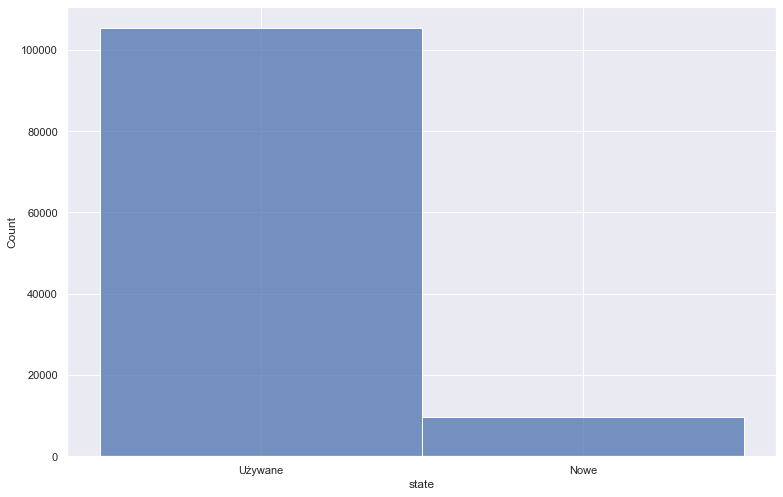

In [13]:
sns.histplot(otomoto_df["state"])

## EDA Price variable (target)

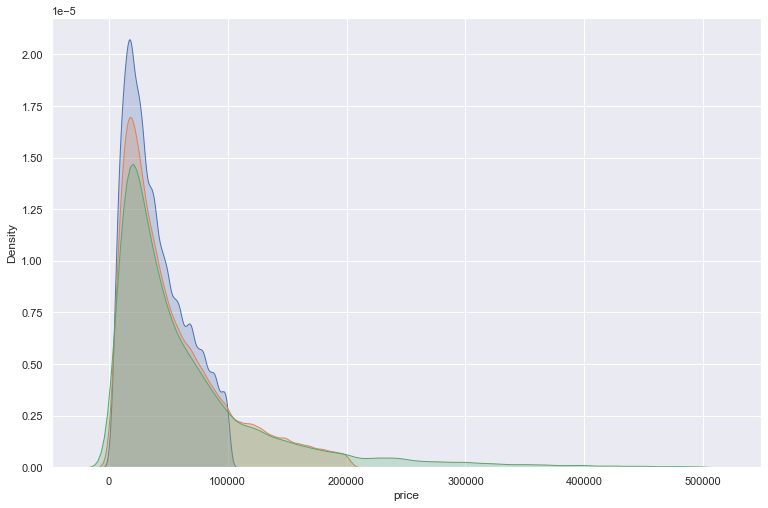

In [14]:
for i in [100000, 200000, 500000]:
    sns.kdeplot(x=otomoto_df[otomoto_df["price"] <= i]["price"], shade=True)

In [15]:
otomoto_df["price"].describe()

count    1.150610e+05
mean     7.255590e+04
std      9.374001e+04
min      1.010000e+03
25%      2.190000e+04
50%      4.290000e+04
75%      8.500000e+04
max      4.444444e+06
Name: price, dtype: float64

In [16]:
otomoto_df[otomoto_df["price"] == otomoto_df["price"].max()]["link"].to_list()

['https://www.otomoto.pl/oferta/opel-adam-ID6EdJ6E.html']

In [17]:
stats.trim_mean(otomoto_df["price"], 0.01)

67431.00641640284

In [18]:
otomoto_df = otomoto_df[
    otomoto_df["link"] != otomoto_df.loc[otomoto_df["price"].idxmax(), "link"]
]

In [19]:
otomoto_df[otomoto_df["price"] == otomoto_df["price"].min()]["link"].to_list()

['https://www.otomoto.pl/oferta/jeep-willys-sprzedam-wyllis-m38-a1-ID6EyHpd.html']

<AxesSubplot:xlabel='mileage_km', ylabel='price'>

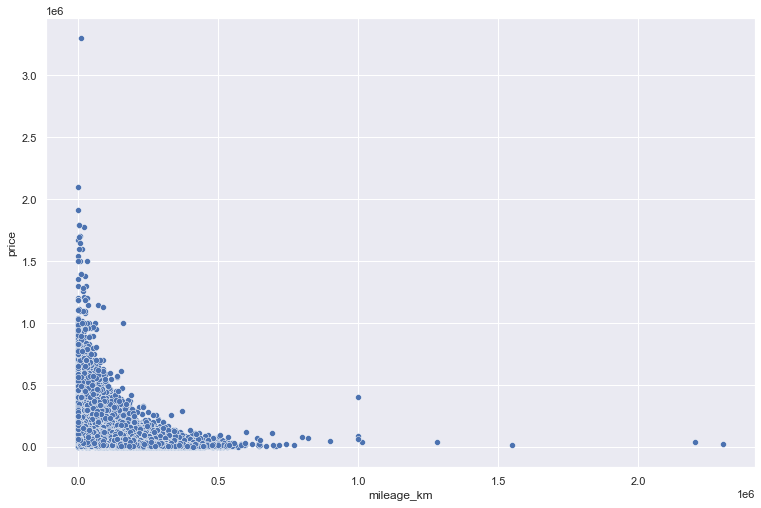

In [20]:
sns.scatterplot(data=otomoto_df, x="mileage_km", y="price")

In [21]:
otomoto_df["price"].describe()

count    1.150600e+05
mean     7.251790e+04
std      9.285012e+04
min      1.010000e+03
25%      2.190000e+04
50%      4.290000e+04
75%      8.500000e+04
max      3.300000e+06
Name: price, dtype: float64

In [22]:
otomoto_df[otomoto_df["price"] == otomoto_df["price"].max()]["link"].to_list()

['https://www.otomoto.pl/oferta/lamborghini-aventador-svj-lp770-6-5l-v12-nero-nemesis-salon-polska-gwarancja-fv23-ID6EBup9.html']

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

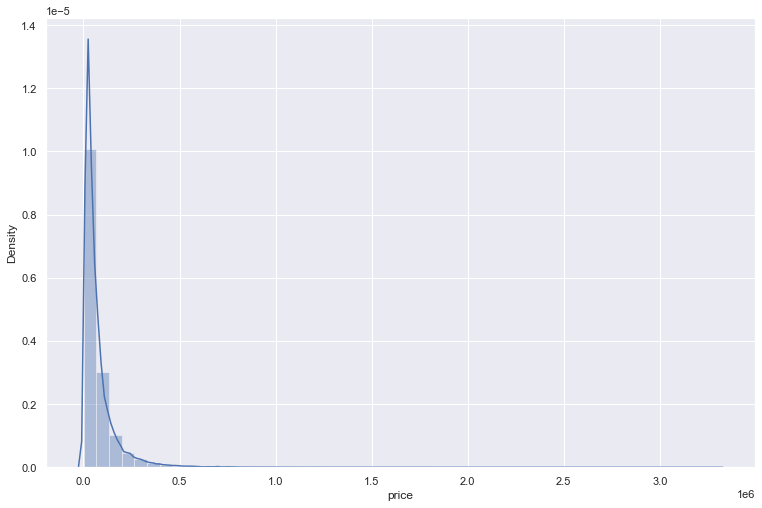

In [23]:
sns.distplot(otomoto_df["price"])

<AxesSubplot:xlabel='price', ylabel='Count'>

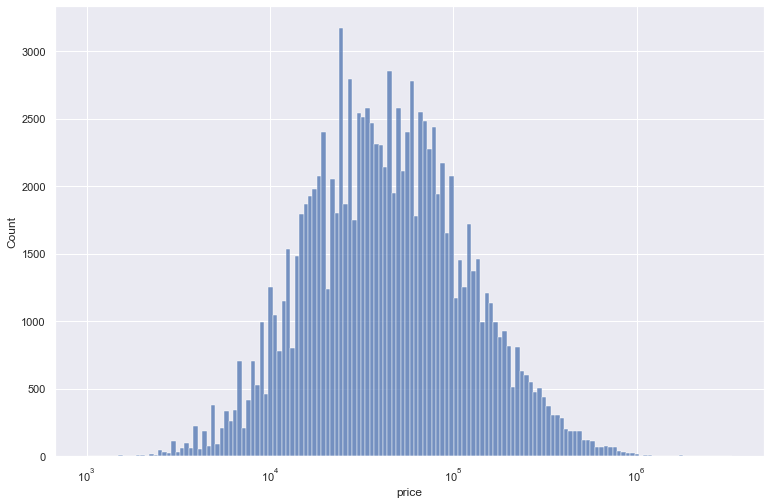

In [24]:
sns.histplot(otomoto_df["price"], log_scale=True)

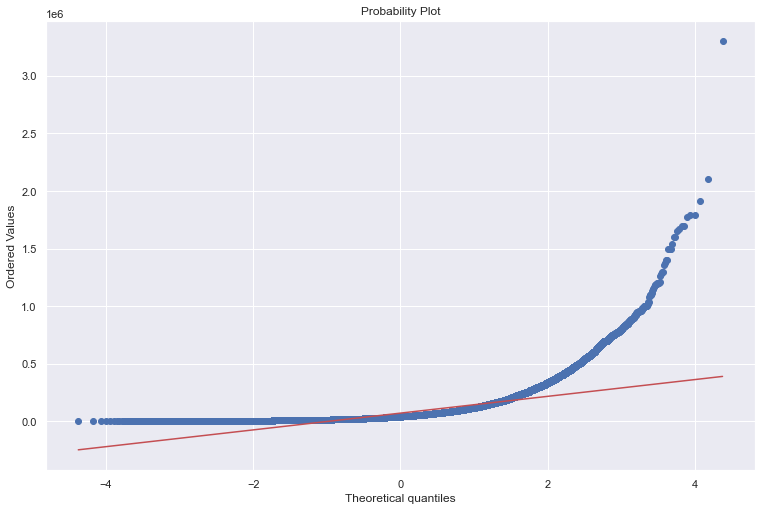

In [25]:
stats.probplot(otomoto_df["price"], dist="norm", plot=pylab)
pylab.show()

In [26]:
stats.shapiro(otomoto_df["price"])

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6140369176864624, pvalue=0.0)

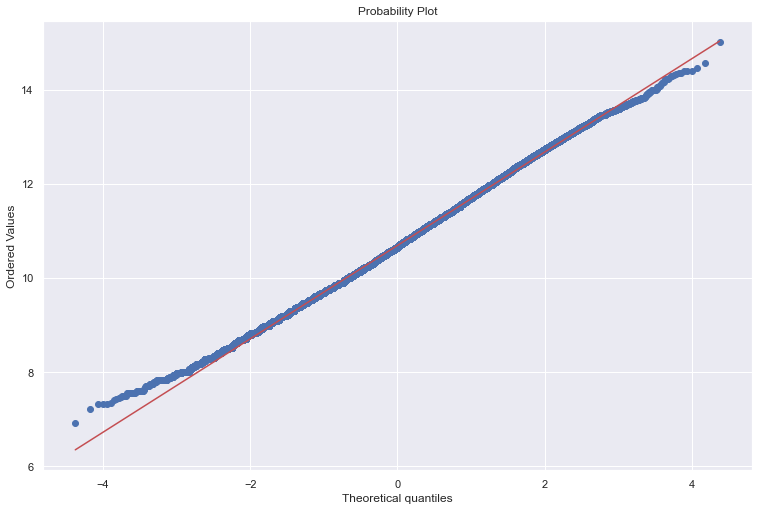

In [27]:
stats.probplot(np.log(otomoto_df["price"]), dist="norm", plot=pylab)
pylab.show()

In [28]:
stats.shapiro(np.log(otomoto_df["price"].values))

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9986305236816406, pvalue=2.9104576282382133e-27)

In [29]:
stats.kstest(otomoto_df["price"], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [30]:
stats.kstest(np.log(otomoto_df["price"]), "norm", N=1000)

KstestResult(statistic=0.999999999997705, pvalue=0.0)

In [31]:
otomoto_df[["link", "make", "price"]].dropna().sort_values(by="price").head(20)

,link,make,price
70970,https://www.otomoto.pl/oferta/jeep-willys-sprz...,jeep,1010.00
102261,https://www.otomoto.pl/oferta/mercedes-benz-kl...,mercedes-benz,1350.00
87014,https://www.otomoto.pl/oferta/renault-clio-ren...,renault,1500.00
95704,https://www.otomoto.pl/oferta/skoda-felicia-ID...,skoda,1500.00
28156,https://www.otomoto.pl/oferta/nissan-micra-nis...,nissan,1500.00
56926,https://www.otomoto.pl/oferta/volkswagen-trans...,volkswagen,1547.44
82766,https://www.otomoto.pl/oferta/ford-mondeo-ford...,ford,1650.00
56763,https://www.otomoto.pl/oferta/volkswagen-trans...,volkswagen,1697.25
58673,https://www.otomoto.pl/oferta/volkswagen-passa...,volkswagen,1700.00
87955,https://www.otomoto.pl/oferta/renault-clio-1-2...,renault,1750.00


In [32]:
otomoto_df[["link", "make", "price"]].dropna().sort_values(by="price").tail(20)

,link,make,price
98792,https://www.otomoto.pl/oferta/mercedes-benz-kl...,mercedes-benz,1359000.0
106346,https://www.otomoto.pl/oferta/rolls-royce-ghos...,rolls-royce,1377000.0
89714,https://www.otomoto.pl/oferta/bentley-continen...,bentley,1399000.0
106798,https://www.otomoto.pl/oferta/lamborghini-urus...,lamborghini,1400000.0
107739,https://www.otomoto.pl/oferta/porsche-911-gt3-...,porsche,1500000.0
88970,https://www.otomoto.pl/oferta/ferrari-f8-tribu...,ferrari,1500000.0
107044,https://www.otomoto.pl/oferta/lamborghini-urus...,lamborghini,1500000.0
89693,https://www.otomoto.pl/oferta/bentley-continen...,bentley,1543942.0
96554,https://www.otomoto.pl/oferta/mercedes-benz-kl...,mercedes-benz,1599000.0
107432,https://www.otomoto.pl/oferta/lamborghini-hura...,lamborghini,1600000.0


In [33]:
otomoto_df[["model", "make", "price"]].groupby(["make", "model"]).mean().sort_values(
    "price"
).tail(40)

price
make          model                         
bmw           ix                4.780130e+05
bentley       continental-gt    4.809770e+05
bmw           seria-8           4.865855e+05
aston-martin  v12-vantage       4.949000e+05
bmw           x7                4.954732e+05
mercedes-benz amg-gt            5.019156e+05
aston-martin  dbx               5.099567e+05
              db11              5.120367e+05
mercedes-benz eqe               5.261700e+05
ferrari       california        5.583167e+05
acura         nsx               5.695000e+05
audi          e-tron-gt         5.771341e+05
              other             5.934000e+05
alpina        b8                5.958000e+05
aston-martin  vantage           5.963633e+05
alpina        xb7               5.967500e+05
audi          sq8               6.039794e+05
maybach       57                6.099990e+05
mercedes-benz eqs               6.186270e+05
porsche       718-spyder        6.307180e+05
ferrari       sf90-stradale     6.630000e+05
porsche       taycan            6.955535e+05
mclaren       650s              7.200000e+05
audi          rs-q8             7.207385e+05
ferrari       458-italia        8.067500e+05
bmw           m8                8.201623e+05
mercedes-benz sls               8.299000e+05
aston-martin  dbs-superleggera  8.456600e+05
ferrari       portofino         9.186992e+05
mclaren       570s-coupe        9.245000e+05
lamborghini   huracan           9.668000e+05
ferrari       f12berlinetta     9.990000e+05
bentley       bentayga          1.115000e+06
lamborghini   diablo            1.199900e+06
rolls-royce   ghost             1.239000e+06
lamborghini   urus              1.403693e+06
ferrari       f8-tributo        1.422250e+06
rolls-royce   wraith            1.545468e+06
mclaren       720s-coupe        1.699000e+06
lamborghini   aventador         3.300000e+06

In [34]:
otomoto_df["price"].isna().any()

False

In [35]:
stats.skew(otomoto_df["price"])

4.628278405419652

In [36]:
stats.kurtosis(otomoto_df["price"])

46.1201061303607

In [37]:
stats.skew(np.log(otomoto_df["price"]))

0.1178537104223516

In [38]:
stats.kurtosis(np.log(otomoto_df["price"]))

-0.1605982635442169

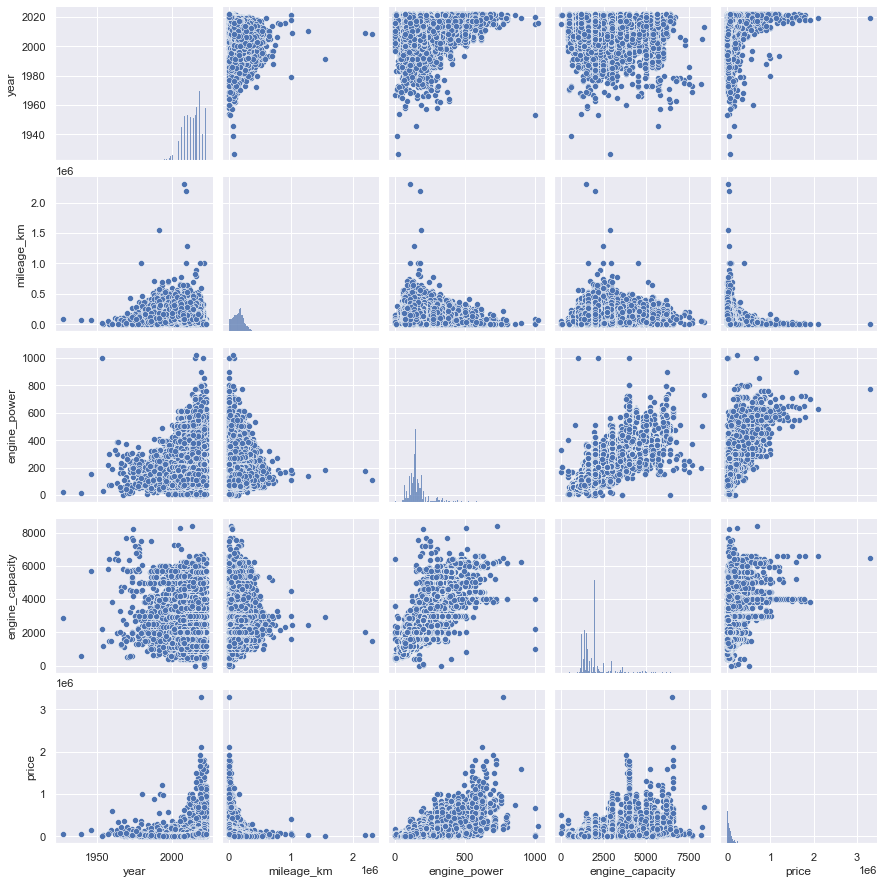

In [39]:
sns.pairplot(otomoto_df)

In [40]:
otomoto_df.columns

Index(['link', 'condition', 'features', 'state', 'year', 'mileage_km', 'engine_power', 'engine_capacity', 'fuel_type', 'price', 'city', 'region', 'make', 'model', 'version', 'category', 'color', 'origin', 'gearbox', 'transmission', 'private_business'], dtype='object')

In [41]:
#otomoto_df['price'] = np.log(otomoto_df['price'])

In [42]:
# otomoto_df["is_outlier"] = otomoto_df.groupby(['model','make','state','condition','year'
#                                               ])['price'].transform(lambda x: (x - x.mean()).abs() > 3*x.std())


In [43]:
# sum(otomoto_df['is_outlier'])

### Removing outliers based on domain knowladge

In [44]:
otomoto_df.loc[(otomoto_df['state']=='Nowe') &
               (otomoto_df['price'] <= 40000)]

,link,condition,features,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,city,region,make,model,version,category,color,origin,gearbox,transmission,private_business
36433,https://www.otomoto.pl/oferta/audi-a4-allroad-...,Not Crashed,"[abs, alarm, alloy-wheels, asr, gps, electroni...",Nowe,2022,1.0,204.0,1968.0,diesel,19902.32,gdynia,pomorskie,audi,a4-allroad,NaN,combi,white,pl,automatic,all-wheel-auto,business
37585,https://www.otomoto.pl/oferta/audi-q7-audi-q7-...,Not Crashed,"[abs, alarm, alloy-wheels, asr, park-assist, l...",Nowe,2022,1.0,231.0,2967.0,diesel,27354.29,gdynia,pomorskie,audi,q7,gen-ii-2015-q7,suv,grey,pl,automatic,all-wheel-auto,business
51690,https://www.otomoto.pl/oferta/volkswagen-t-cro...,Not Crashed,"[abs, alarm, alloy-wheels, asr, gps, electroni...",Nowe,2022,1.0,150.0,1498.0,petrol,9223.53,gdynia,pomorskie,volkswagen,t-cross,NaN,suv,white,pl,automatic,front-wheel,business
56763,https://www.otomoto.pl/oferta/volkswagen-trans...,Not Crashed,"[abs, bluetooth, central-lock, automatic-wiper...",Nowe,2022,5.0,150.0,1968.0,diesel,1697.25,warszawa,mazowieckie,volkswagen,transporter,gen-t6,minivan,grey,pl,manual,front-wheel,business
56926,https://www.otomoto.pl/oferta/volkswagen-trans...,Not Crashed,"[abs, asr, bluetooth, automatic-wipers, centra...",Nowe,2022,5.0,150.0,1968.0,diesel,1547.44,warszawa,mazowieckie,volkswagen,transporter,gen-t6,minivan,blue,NaN,manual,NaN,business
89229,https://www.otomoto.pl/oferta/aixam-city-pojaz...,Not Crashed,"[alloy-wheels, bluetooth, central-lock, front-...",Nowe,2022,9.0,4.0,NaN,electric,27900.00,grezow,mazowieckie,aixam,city,NaN,mini,other,NaN,automatic,rear-wheel,business
90003,https://www.otomoto.pl/oferta/aixam-city-wersj...,Not Crashed,"[central-lock, front-electric-windows, mp3, ra...",Nowe,2022,1.0,8.0,479.0,diesel,9725.00,wroclaw,dolnoslaskie,aixam,city,NaN,mini,red,NaN,automatic,NaN,business


In [45]:
otomoto_df.drop(otomoto_df.loc[(otomoto_df['state']=='Nowe') &
               (otomoto_df['price'] <= 40000)].index, inplace=True)

In [46]:
otomoto_df.shape

(115053, 21)

In [47]:
otomoto_df.drop(otomoto_df.loc[(otomoto_df['mileage_km']<=40000) &
                               (otomoto_df['price'] <= 30000) &
                               (otomoto_df['condition']=='No Information') &
                               (otomoto_df['year'] > 2010)].index,
               inplace=True)

In [48]:
outlier_otomoto_df = otomoto_df.groupby(['model', 'make', 'state', 'condition', 'year']
                                       ).agg({'price':'mean'}).reset_index()
outlier_otomoto_df

,model,make,state,condition,year,price
0,1-5,polonez,Używane,Crashed,1989,4000.000000
1,1-5,polonez,Używane,No Information,1982,19900.000000
2,1-5,polonez,Używane,Not Crashed,1994,2900.000000
3,1-6,polonez,Używane,Not Crashed,1997,5000.000000
4,100,audi,Używane,No Information,1987,4500.000000
...,...,...,...,...,...,...
16091,zoe,renault,Używane,Not Crashed,2016,53174.500000
16092,zoe,renault,Używane,Not Crashed,2018,82166.666667
16093,zoe,renault,Używane,Not Crashed,2019,104900.000000
16094,zoe,renault,Używane,Not Crashed,2020,112400.000000


In [49]:
outlier_otomoto_df.loc[(outlier_otomoto_df['price']<10000) &
                      (outlier_otomoto_df['year']>2000)]

,model,make,state,condition,year,price
16,1007,peugeot,Używane,No Information,2004,6900.000000
17,1007,peugeot,Używane,No Information,2005,8171.142857
18,1007,peugeot,Używane,No Information,2006,8100.000000
19,1007,peugeot,Używane,No Information,2007,9750.000000
21,1007,peugeot,Używane,Not Crashed,2005,8931.000000
...,...,...,...,...,...,...
16041,zafira,opel,Używane,No Information,2003,7160.000000
16042,zafira,opel,Używane,No Information,2004,8505.222222
16059,zafira,opel,Używane,Not Crashed,2001,7775.000000
16061,zafira,opel,Używane,Not Crashed,2003,7956.000000


In [50]:
otomoto_df["is_outlier"] = otomoto_df.groupby(
    ["model", "make", "state", "year"]
)["price"].transform(lambda x: (x - x.mean()).abs() > 1.5 * x.mean())

In [51]:
sum(otomoto_df["is_outlier"])

184

In [52]:
otomoto_df = otomoto_df[otomoto_df['is_outlier']==0]

In [53]:
otomoto_df.shape

(114770, 22)

In [54]:
models_count = dict(zip(otomoto_df['model'].value_counts().index, otomoto_df['model'].value_counts().values))
models_to_model = []
for key, value in models_count.items():
    if value >= 100:
        models_to_model.append(key)

In [55]:
len(models_to_model)

245

In [56]:
otomoto_df = otomoto_df[otomoto_df['model'].isin(models_to_model)]

In [57]:
otomoto_df.shape

(99106, 22)

### Summary:
- Removed outlier (row with max price) because it is a test page and does not represent real car featrures. 
- Trip mean (1%) and basic statistics show that there are no suspicious values in context of target variable
- The check on grouped dataframe returns resonable results: the most expensive cars are from the most prestige make, so results make sense.
- The distribution of variable is skew and has long tail. Mean is larger then median 
- There is no missing values in price variable
- It looks like there is no linear correlation between any continous feature and target (maybe engine power and price)
- There is one clear colinearity between features: engine power and engine capacity
- Taking only cars where number of models is equal or larger than 100

## EDA

In [58]:
otomoto_df.isnull().sum()

link                    0
condition               0
features                0
state                   0
year                    0
mileage_km            225
engine_power           38
engine_capacity       209
fuel_type               0
price                   0
city                    0
region                  0
make                    0
model                   0
version             21725
category                0
color                   0
origin              32196
gearbox                14
transmission         7209
private_business        0
is_outlier              0
dtype: int64

<AxesSubplot:>

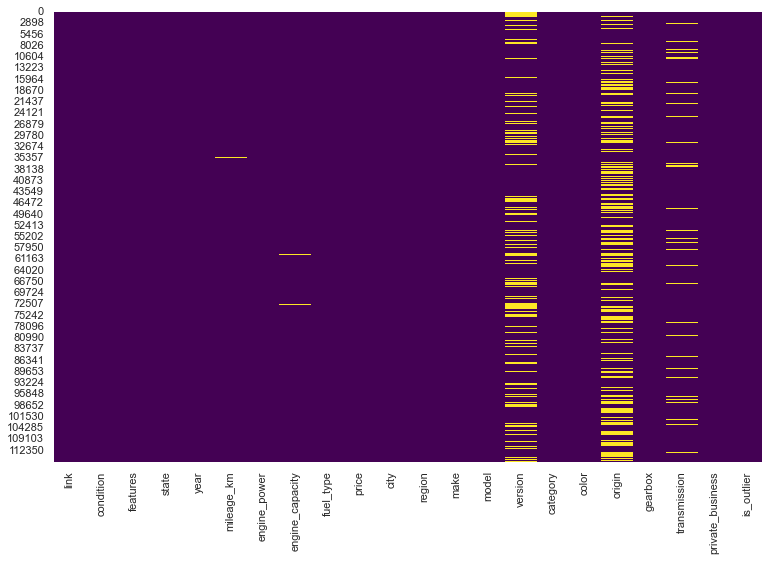

In [59]:
sns.heatmap(otomoto_df.isnull(), cbar=False, cmap="viridis")

### Missing values
- there are many features with missing values: version, origin and transmission have the most missings

### EDA: year

In [60]:
otomoto_df["year"].head(10)

0     2013
1     2018
2     2012
3     2010
4     2013
5     2019
6     2011
9     2018
10    2010
11    2012
Name: year, dtype: int64

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

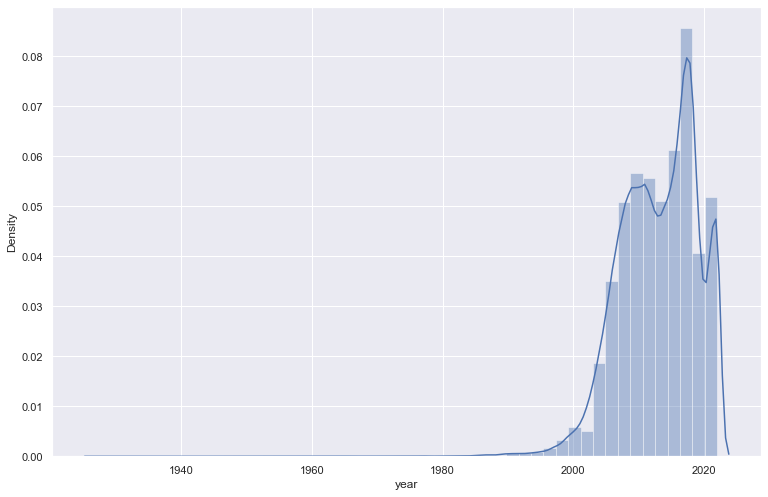

In [61]:
sns.distplot(otomoto_df["year"])

In [62]:
otomoto_df["year"].nunique()

66

In [63]:
otomoto_df["year"].describe()

count    99106.000000
mean      2013.002442
std          5.877198
min       1927.000000
25%       2009.000000
50%       2014.000000
75%       2018.000000
max       2022.000000
Name: year, dtype: float64

In [64]:
sum(otomoto_df["year"].isna())

0

In [65]:
otomoto_df["year"].dtype

dtype('int64')

In [66]:
otomoto_df["year"].value_counts()

2018    8153
2017    7979
2016    6242
2022    5516
2011    5489
2009    5401
2015    5305
2010    5270
2008    5084
2012    5010
2014    4972
2019    4852
2013    4631
2007    4481
2021    4268
2006    3774
2005    2819
2020    2808
2004    2093
2003    1429
2002     936
2001     618
2000     482
1999     382
1998     233
1997     186
1996     111
1995      89
1994      72
1993      59
1991      54
1990      52
1992      51
1989      43
1987      30
1986      24
1988      22
1985      14
1984       8
1981       7
1982       6
1977       6
1983       4
1980       4
1979       3
1976       3
1966       3
1971       2
1978       2
1975       2
1972       2
1970       2
1969       2
1967       2
1965       2
1963       2
1957       1
1968       1
1973       1
1974       1
1960       1
1959       1
1927       1
1958       1
1939       1
1946       1
Name: year, dtype: int64

In [67]:
years_to_replace = otomoto_df['year'].unique()[otomoto_df['year'].unique()<2000]

In [68]:
otomoto_df['year'].replace(to_replace=years_to_replace,
                           value='1999',
                           inplace=True)

In [69]:
otomoto_df['year'].value_counts()

2018    8153
2017    7979
2016    6242
2022    5516
2011    5489
2009    5401
2015    5305
2010    5270
2008    5084
2012    5010
2014    4972
2019    4852
2013    4631
2007    4481
2021    4268
2006    3774
2005    2819
2020    2808
2004    2093
1999    1494
2003    1429
2002     936
2001     618
2000     482
Name: year, dtype: int64

- no missing values
- car mean year production: ~2013
- the most cars on otomoto.pl were produced between 2010 and 2020 (~55% of all ads)
- groupped all cars produced in XX century to one category


### EDA: mileage_km

In [70]:
otomoto_df["mileage_km"].describe()

count    9.888100e+04
mean     1.443955e+05
std      9.166391e+04
min      1.000000e+00
25%      7.300000e+04
50%      1.480000e+05
75%      2.060000e+05
max      2.300000e+06
Name: mileage_km, dtype: float64

<AxesSubplot:xlabel='mileage_km', ylabel='Count'>

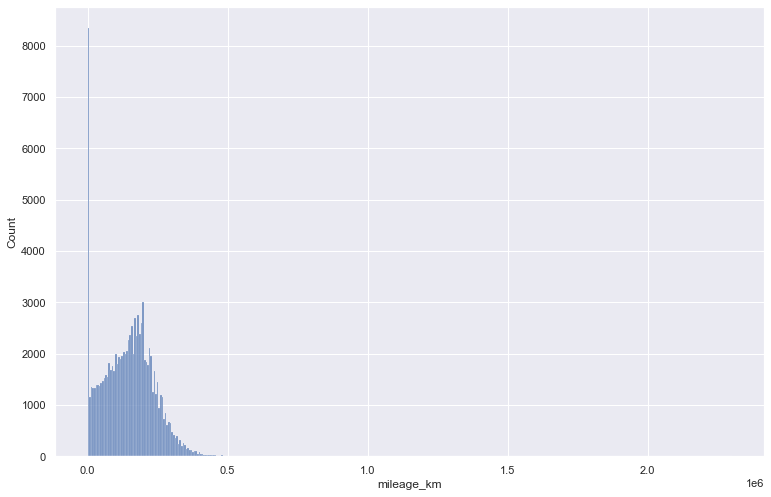

In [71]:
sns.histplot(otomoto_df["mileage_km"])

There is a huge pick for mileage = 0, because I have in dataset new cars, let's check distribution for only used cars

<AxesSubplot:xlabel='mileage_km', ylabel='Count'>

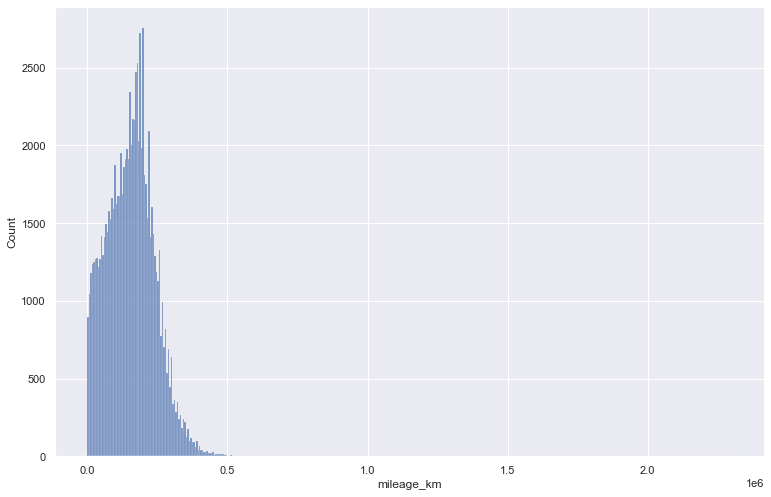

In [72]:
used_otomoto_df = otomoto_df[otomoto_df["state"] == "Używane"]
sns.histplot(used_otomoto_df["mileage_km"])

In [73]:
otomoto_df["mileage_km"].isna().any()

True

In [74]:
sum(otomoto_df["mileage_km"].isna())

225

In [75]:
sum(used_otomoto_df["mileage_km"].isna())

0

I can see that empty values of mileage are assigned to new cars. It means I can replace nan with 0

In [76]:
otomoto_df["mileage_km"].fillna(0, inplace=True)

In [77]:
sum(otomoto_df["mileage_km"].isna())

0

In [78]:
otomoto_df["mileage_km"].value_counts(
    bins=[10000, 50000, 100000, 200000, 500000, 1000000, 10000000], normalize=True
)

(100000.0, 200000.0]       0.395476
(200000.0, 500000.0]       0.266805
(50000.0, 100000.0]        0.146278
(9999.999, 50000.0]        0.095867
(500000.0, 1000000.0]      0.000545
(1000000.0, 10000000.0]    0.000020
Name: mileage_km, dtype: float64

In [79]:
otomoto_df["mileage_km"].describe()

count    9.910600e+04
mean     1.440677e+05
std      9.181735e+04
min      0.000000e+00
25%      7.232650e+04
50%      1.480000e+05
75%      2.060000e+05
max      2.300000e+06
Name: mileage_km, dtype: float64

- mean mileage in KM for a car from otomoto is ~141 000 km. 
- the largest group of cars in otomoto have mileage between 100 000 and 200 000
- missing values are only for new cars, due to that, they were replaced by 0
- distribution of variable is skewed (mean < median)

### EDA: engine_power

In [80]:
otomoto_df["engine_power"].describe()

count    99068.000000
mean       150.290548
std         66.619824
min          1.000000
25%        110.000000
50%        140.000000
75%        177.000000
max        999.000000
Name: engine_power, dtype: float64

<AxesSubplot:xlabel='engine_power', ylabel='Count'>

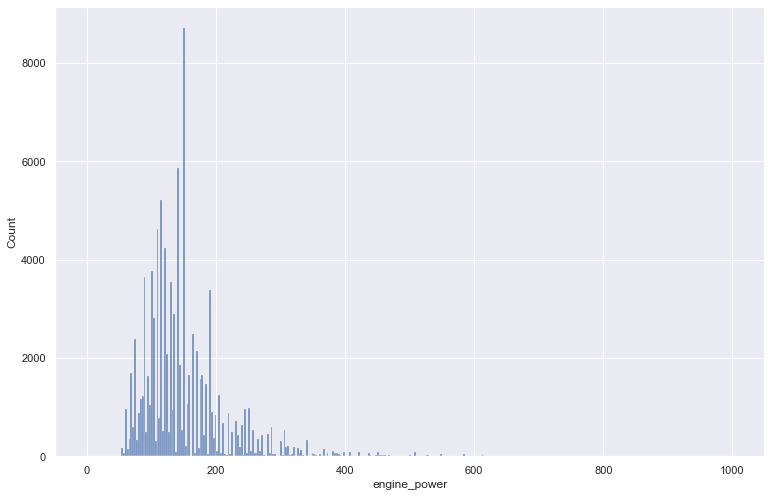

In [81]:
sns.histplot(otomoto_df["engine_power"])

In [82]:
otomoto_df.loc[otomoto_df["engine_power"].idxmin(), "link"]

'https://www.otomoto.pl/oferta/audi-a3-audi-a3-2-0-tfsi-quattro-s-line-dsg-230km-ID6EBzCM.html'

In [83]:
otomoto_df.loc[otomoto_df["engine_power"].idxmax(), "link"]

'https://www.otomoto.pl/oferta/volkswagen-up-move-1-0-mpi-alufelgi16-klimatyzacja-zarejestrowany-w-pl-ID6EqYmo.html'

In [84]:
#thats clearly a mistake - it's imposssible that volkswagen up has 999 horse powers
otomoto_df.drop(otomoto_df["engine_power"].idxmax(), inplace=True)

In [85]:
otomoto_df["engine_power"].isna().any()

True

In [86]:
sum(otomoto_df["engine_power"].isna())

38

In [87]:
otomoto_df[otomoto_df["engine_power"].isna()]["state"].value_counts()

Nowe       25
Używane    13
Name: state, dtype: int64

In [88]:
otomoto_df[otomoto_df["engine_power"].isna()]["make"].value_counts()

honda         14
bmw            5
mini           4
kia            4
volkswagen     4
toyota         3
opel           2
skoda          1
audi           1
Name: make, dtype: int64

I am going to imput empty engine_power with mean for given make, model, year, and engine_capacity

In [89]:
otomoto_df["engine_power"].fillna(
    otomoto_df.groupby(["model", "make", "year", "engine_capacity"])[
        "engine_power"
    ].transform("mean"),
    inplace=True,
)

In [90]:
sum(otomoto_df["engine_power"].isna())

18

There are 18 missing values in engine_capacity, so I am imputing engine_power using different group: mean for model  make and year

In [91]:
otomoto_df["engine_power"].fillna(
    otomoto_df.groupby(["model", "make", "year"])["engine_power"].transform("mean"),
    inplace=True,
)

In [92]:
sum(otomoto_df["engine_power"].isna())

0

In [93]:
otomoto_df["engine_power"].describe()

count    99105.000000
mean       150.281608
std         66.559456
min          1.000000
25%        110.000000
50%        140.000000
75%        177.000000
max        800.000000
Name: engine_power, dtype: float64

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_power'>

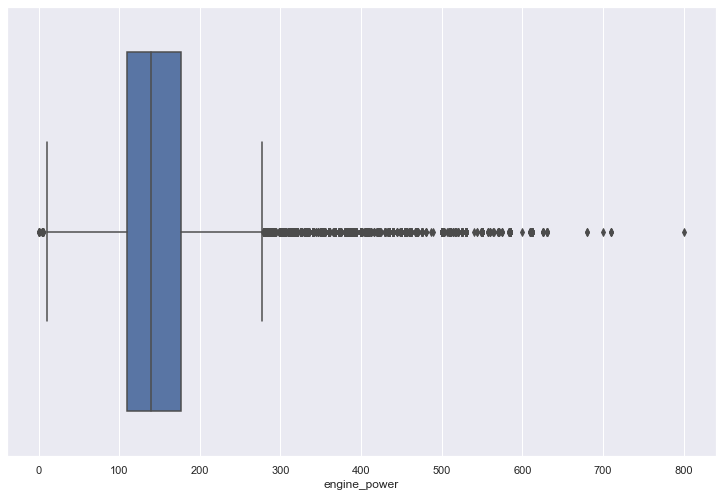

In [94]:
sns.boxplot(otomoto_df["engine_power"])

In [95]:
q3, q1 = np.percentile(otomoto_df["engine_power"], [75, 25])
iqr = q3 - q1
iqr

67.0

- enginge power is a continous variable (float) 
- skewed distribution (mean > median) with long tail (cars with significantly larger power)
- empty values are replaced in groups:
    * fill nan in group of the same model, make, production year and engine capacity
    * for leftovers, replace in group of the same make, model and year
    * finally, replace in group of the same make and model
- average car has engine power equal to ~157
- what's interesting the IQR = 67, so according to rule of thumb everyting above q75 + 1.5 * IRQ = 277.5 could be treated as outlier. Of course, I am not going to use this logic.
- Maximum and minimum values for engine power were checked manualy and the results are coherent with website

In [96]:
def outlier_detection(features_series):
    """
    Znajdz wartość odstającą w ramce danych. Aby uzyskać indeks wartości odstającej należy podać pojedynczą kolumne ramki danych

    Argumenty:
    ----------------
    features_series(pd.Series) : single column features_series

    Wartości zwracane
    -----------------
    outlier : Indeks próbki uznanej za wartość odstającą.
    """
    Q1 = features_series.quantile(0.25)
    Q3 = features_series.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outlier = features_series[
        (features_series > upper_end) | (features_series < lower_end)
    ]
    return outlier

for col in models_to_model:
    print(f'\nOutliers in feature: engine_power for model {col}')
    outlier = outlier_detection(otomoto_df.loc[otomoto_df["model"] == col]['engine_power'])
    print(outlier)


Outliers in feature: engine_power for model astra
3495     200.0
3584      60.0
4128     200.0
4255     200.0
4396      60.0
4528     200.0
4853     200.0
5066     200.0
5142     200.0
5958     280.0
6118     240.0
6157      60.0
6360     190.0
6393     200.0
6503      60.0
6522     280.0
6637     195.0
6720     280.0
6831     195.0
7152     200.0
7528     200.0
8101     192.0
8112     200.0
8431      60.0
8582     200.0
8715     200.0
8888      60.0
9214     200.0
9424     240.0
9576     200.0
9989     200.0
10147    280.0
10243    195.0
10247    280.0
10296    200.0
10464    280.0
10568    200.0
10721    200.0
10760    200.0
10907    200.0
10921    200.0
10955    200.0
11045    200.0
11079    195.0
11081    195.0
11162    195.0
11348    200.0
11533    200.0
11679    200.0
12230    280.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model a4
34096    252.0
34133    245.0
34187    252.0
34225    251.0
34353    265.0
34629    341.0
34983    245.0
35012    25

49524    180.0
49783    130.0
49978    180.0
50225    180.0
50826    207.0
51617    150.0
51620    130.0
51967    150.0
52711    207.0
54030    200.0
54165    180.0
55693    150.0
56665    180.0
56917    200.0
57524    180.0
57651    180.0
58063    180.0
58162    180.0
59023    200.0
59043    200.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model fiesta
75536    200.0
75592    140.0
75701    200.0
76160    182.0
76449    140.0
76629    150.0
77564    140.0
77622    200.0
78732    200.0
78768    200.0
78936    150.0
79393    140.0
79459    200.0
79486    150.0
79544    182.0
79558    140.0
79763    200.0
79783    182.0
80073    140.0
80562    134.0
80633    140.0
81044    140.0
81118    134.0
81532    150.0
81844    182.0
81962    182.0
82049    182.0
82219    150.0
82222    200.0
82724    200.0
82738    182.0
82758    182.0
82761    182.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model auris
Series([], Name: engine_power, d

47519    120.0
47648    120.0
47653    120.0
48008    120.0
48020    120.0
48397    120.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model ix35
Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model grand-cherokee
70617    468.0
70803    468.0
70847    468.0
70853    468.0
70902    468.0
70932    468.0
70947    468.0
71037    468.0
71039    468.0
71089    468.0
71224    468.0
71231    468.0
71255    710.0
71297    710.0
71302    468.0
71334    468.0
71380    467.0
71381    468.0
71465    468.0
71493    710.0
71665    468.0
71745    468.0
71764    468.0
71804    432.0
71848    468.0
71858    468.0
71865    468.0
71890    468.0
71895    468.0
71977    425.0
71986    468.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model touran
Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model klasa-s
Series([], Name: engine_power, dtype: float64)

Outliers in featur

32147     56.0
32525    130.0
32994    130.0
33886    130.0
33966    130.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model caddy
49437    125.0
49847    150.0
49855    150.0
49857    170.0
50051     80.0
50057     80.0
50182     70.0
50264     75.0
50387     75.0
50527    140.0
50611    140.0
50772    150.0
50788    149.0
50807     75.0
50885    125.0
50970     80.0
50973     80.0
51005    130.0
51199     70.0
51318    140.0
51549    170.0
51600     75.0
51609    140.0
51705     69.0
51937     80.0
52039     75.0
52049     75.0
52510    140.0
52608     75.0
52650     75.0
52866     62.0
53062     86.0
53132    140.0
53551    140.0
53679     75.0
53699     75.0
53905     80.0
53929     75.0
54112     86.0
54326    140.0
54430     75.0
54664    140.0
54798     75.0
54896     75.0
55060    150.0
55063    150.0
55400     75.0
55939    150.0
55944    150.0
55950    150.0
56168     80.0
56262    150.0
56462    150.0
56513     75.0
56950    140.0
56978     75.0

62064    184.0
62169    184.0
62842    184.0
63185    184.0
63187    184.0
63202    184.0
63296    184.0
63323    184.0
63470    184.0
63471    184.0
63472    184.0
63938    184.0
64366    184.0
64671    184.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model mustang
Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model a7
Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model bravo
Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model kodiaq
Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model stelvio
30790    200.0
30809    510.0
30818    510.0
30858    510.0
30867    200.0
30871    201.0
30887    200.0
30900    510.0
30928    201.0
30931    210.0
30970    510.0
30991    200.0
30994    200.0
31015    510.0
31064    200.0
31125    200.0
31135    209.0
31142    200.0
31147    210.0
31148    510.0
31162    2

Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model note
25327     98.0
25369    103.0
25482    110.0
25612     80.0
25691     80.0
25708     80.0
25853     98.0
25948     80.0
25953     80.0
26032    110.0
26038     98.0
26063     80.0
26121     80.0
26157     80.0
26171     80.0
26203     80.0
26272     80.0
26285     80.0
26294     80.0
26503    110.0
26634     80.0
26679    110.0
26680     95.0
26694     80.0
26730     80.0
26768    110.0
26808    110.0
26851    110.0
26976    110.0
27045     98.0
27163     80.0
27185     98.0
27189     80.0
27220    110.0
27301     80.0
27386    103.0
27427     98.0
27479     80.0
27489    110.0
27588    110.0
27590    110.0
27601    100.0
27617    110.0
27664     98.0
27826     98.0
27832     80.0
27850     80.0
27907     80.0
27978    110.0
28066     98.0
28075     80.0
28134     80.0
28191    110.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model range-rover-velar
67264    3

106202    313.0
106204    313.0
106205    313.0
106216    313.0
106339    313.0
107654    313.0
108658    149.0
108903    313.0
109849    313.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model sorento
13279    247.0
13474    240.0
14121    240.0
14165    245.0
14231    242.0
14379    242.0
14960    242.0
15332    242.0
15885    242.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model alhambra
102922    184.0
102928    184.0
103028    220.0
103099     90.0
103797    184.0
103823    204.0
104157    183.0
104394    184.0
104408    184.0
104521    184.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model 3gt
16429    245.0
17450    143.0
18221    306.0
18299    150.0
18382    143.0
19159    150.0
19326    143.0
19338    150.0
19401    245.0
19811    150.0
19996    150.0
20341    143.0
20424    150.0
20480    143.0
20961    150.0
21060    150.0
21142    245.0
21355    252.0
21463    150.0
21503    245.0


Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model seria-6
16142    449.0
18051    450.0
18289    450.0
19725    183.0
19778    449.0
20251    218.0
20950    177.0
21285    449.0
21462    215.0
21938    450.0
22323    211.0
22367    449.0
22426    211.0
22643    450.0
24122    450.0
24441    185.0
24686    183.0
24695    450.0
24988    449.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model grand-c-max
Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model arkana
83411    158.0
83622     94.0
84184     94.0
84311     94.0
84485    160.0
84512    160.0
84537     94.0
84942    160.0
85296     94.0
85384     94.0
85388     94.0
85405     94.0
85872    160.0
86041    160.0
86592    160.0
86637    160.0
86960     94.0
87153     94.0
87295     94.0
87306     94.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model c3-picasso
Series([], Name: engine_power, dt

In [97]:
otomoto_df[otomoto_df['engine_power']==1].shape

(6, 22)

In [98]:
otomoto_df.shape

(99105, 22)

In [99]:
otomoto_df = otomoto_df[otomoto_df['engine_power']!=1]

In [100]:
otomoto_df.shape

(99099, 22)

In [101]:
otomoto_df[['model', 'make', 'year', 'engine_power']].sort_values('engine_power').tail(20)

,model,make,year,engine_power
99693,klasa-s,mercedes-benz,2019,612.0
16566,x6,bmw,2022,625.0
16564,x6,bmw,2022,625.0
16339,seria-5,bmw,2022,625.0
16297,x5,bmw,2021,625.0
16298,x5,bmw,2022,625.0
107230,panamera,porsche,2021,630.0
108008,other,maybach,2017,630.0
108587,panamera,porsche,2022,630.0
107387,panamera,porsche,2020,630.0


In [102]:
otomoto_df[['model', 'make', 'year', 'engine_power']].sort_values('engine_power').head(20)

,model,make,year,engine_power
107999,other,microcar,2008,4.0
90620,other,aixam,2000,4.0
89239,other,aixam,2003,4.0
107393,other,microcar,2014,5.0
90612,other,aixam,1999,5.0
89344,other,other,2010,5.0
107347,other,microcar,2010,5.0
89201,other,grecav,2007,5.0
107420,other,ligier,2011,6.0
32454,accord,honda,1999,10.0


In [103]:
otomoto_df[otomoto_df['engine_power']==otomoto_df['engine_capacity']]

,link,condition,features,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,city,region,make,model,version,category,color,origin,gearbox,transmission,private_business,is_outlier


### EDA: engine_capacity

In [104]:
otomoto_df["engine_capacity"].describe()

count    98890.000000
mean      1833.690151
std        624.983984
min          1.000000
25%       1461.000000
50%       1796.000000
75%       1995.000000
max       6834.000000
Name: engine_capacity, dtype: float64

It is impossible that engince_capacity is 1, scrape of electric car could lead to false conclusions (is there something like engine capacity for electic cars? It is rather battery capacity - to check) 

In [105]:
sum(otomoto_df[otomoto_df["fuel_type"] == "electric"]["engine_capacity"].isna()) / len(
    otomoto_df[otomoto_df["fuel_type"] == "electric"]["engine_capacity"].isna()
)

0.9894736842105263

All electric cars have empty value in engine_capacity. According to many sources for example: https://shubh17121996.medium.com/used-car-price-prediction-using-supervised-machine-learning-ea9dace76686
electrics cars does not have engine capacity. Hence, I am going to assign 0 to engine_capacity for all electirc cars 

In [106]:
otomoto_df.loc[otomoto_df["fuel_type"] == "electric", "engine_capacity"] = 0

In [107]:
sum(otomoto_df["engine_capacity"].isna())

21

In [108]:
otomoto_df["engine_capacity"].fillna(
    otomoto_df.groupby(["model", "make", "year", "engine_power"])[
        "engine_capacity"
    ].transform("mean"),
    inplace=True,
)

In [109]:
sum(otomoto_df["engine_capacity"].isna())

12

In [110]:
otomoto_df["engine_capacity"].fillna(
    otomoto_df.groupby(["model", "make", "year"])["engine_capacity"].transform("mean"),
    inplace=True,
)
sum(otomoto_df["engine_capacity"].isna())

0

In [111]:
otomoto_df["engine_capacity"].describe()

count    99099.000000
mean      1830.206919
std        629.439829
min          0.000000
25%       1461.000000
50%       1796.000000
75%       1995.000000
max       6834.000000
Name: engine_capacity, dtype: float64

In [112]:
otomoto_df["engine_capacity"].value_counts()

1598.0    9123
1968.0    7178
1995.0    5661
1997.0    4458
1998.0    3810
          ... 
1343.0       1
1793.0       1
4780.0       1
1695.0       1
6765.0       1
Name: engine_capacity, Length: 536, dtype: int64

In [113]:
otomoto_df[['model','make','year','engine_capacity']].sort_values('engine_capacity').tail(30)

,model,make,year,engine_capacity
71302,grand-cherokee,jeep,2020,6417.0
71224,grand-cherokee,jeep,2022,6417.0
71089,grand-cherokee,jeep,2016,6417.0
71764,grand-cherokee,jeep,2014,6417.0
71334,grand-cherokee,jeep,2021,6417.0
71745,grand-cherokee,jeep,2018,6417.0
70847,grand-cherokee,jeep,2021,6417.0
71665,grand-cherokee,jeep,2015,6417.0
70803,grand-cherokee,jeep,2022,6417.0
70853,grand-cherokee,jeep,2013,6417.0


In [114]:
otomoto_df[otomoto_df['engine_capacity']<500]['fuel_type'].value_counts()

electric    190
diesel        3
petrol        2
Name: fuel_type, dtype: int64

I am going to make psuedo - desceate variable from engine_capacity. I am going to round every value to nearest 100. For example I am treating the same engine capacity 1995 and 1996 (both rounded to 2000). It is more consistent with real world where capacity is given in one number after decimal e.g: 1.4, 2.0 etc. 

In [115]:
otomoto_df["engine_capacity"] = otomoto_df["engine_capacity"].round(-2)

In [116]:
otomoto_df["engine_capacity"].value_counts()

2000.0    30837
1600.0    17029
1400.0     8434
1200.0     6704
1500.0     6611
3000.0     5222
1800.0     4435
1000.0     4225
1300.0     2238
1900.0     2208
1700.0     1699
2500.0     1312
2200.0     1114
1100.0      926
2100.0      721
2400.0      708
900.0       482
2700.0      389
3200.0      321
3600.0      289
5000.0      283
2900.0      266
2800.0      261
3500.0      260
4000.0      251
4400.0      239
0.0         190
4100.0      150
2300.0      147
5500.0      144
4800.0      141
4700.0      135
4200.0      126
3700.0      100
3100.0       59
5700.0       52
2600.0       47
6000.0       39
6200.0       35
4500.0       35
3300.0       30
6400.0       27
3800.0       26
5400.0       25
5200.0       24
4600.0       19
3900.0       15
4900.0       12
3400.0        9
500.0         8
4300.0        8
6600.0        6
5900.0        6
5600.0        4
5800.0        4
400.0         3
6800.0        3
6100.0        2
6300.0        2
600.0         2
Name: engine_capacity, dtype: int64

<AxesSubplot:xlabel='engine_capacity', ylabel='Count'>

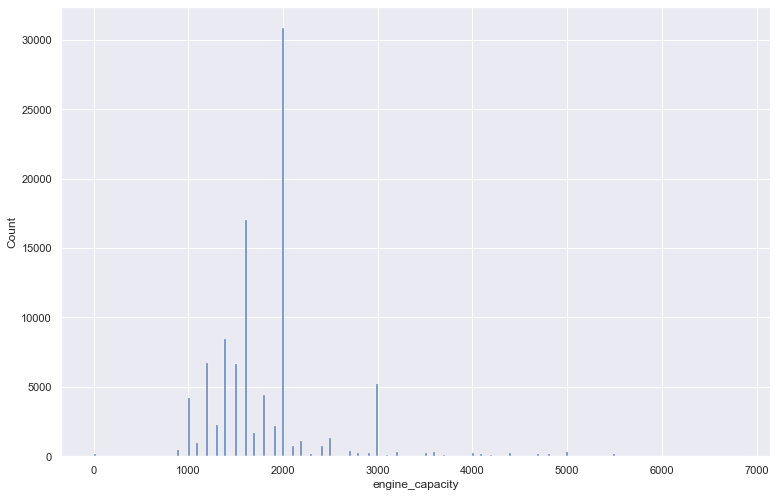

In [117]:
sns.histplot(otomoto_df["engine_capacity"])

In [118]:
otomoto_df["engine_capacity"].describe()

count    99099.000000
mean      1838.477684
std        632.218158
min          0.000000
25%       1500.000000
50%       1800.000000
75%       2000.000000
max       6800.000000
Name: engine_capacity, dtype: float64

In [119]:
otomoto_df['engine_capacity'].value_counts()

2000.0    30837
1600.0    17029
1400.0     8434
1200.0     6704
1500.0     6611
3000.0     5222
1800.0     4435
1000.0     4225
1300.0     2238
1900.0     2208
1700.0     1699
2500.0     1312
2200.0     1114
1100.0      926
2100.0      721
2400.0      708
900.0       482
2700.0      389
3200.0      321
3600.0      289
5000.0      283
2900.0      266
2800.0      261
3500.0      260
4000.0      251
4400.0      239
0.0         190
4100.0      150
2300.0      147
5500.0      144
4800.0      141
4700.0      135
4200.0      126
3700.0      100
3100.0       59
5700.0       52
2600.0       47
6000.0       39
6200.0       35
4500.0       35
3300.0       30
6400.0       27
3800.0       26
5400.0       25
5200.0       24
4600.0       19
3900.0       15
4900.0       12
3400.0        9
500.0         8
4300.0        8
6600.0        6
5900.0        6
5600.0        4
5800.0        4
400.0         3
6800.0        3
6100.0        2
6300.0        2
600.0         2
Name: engine_capacity, dtype: int64

- engine capacity orignaly is continous variable
- electric car does not have engine_capacity, so for all those cars, engine capacity is set to 0
- empty values for engine_capaty were replace with the same patter as in engine_power
- engine_capacity is transformed to psudo-continous variable. Right now data is grouped by rounding raw feature values to hundreds: e.g. engine_capacity: 1995, 1996 etc. are right now stored as 2000

### EDA: Condition

In [120]:
otomoto_df["condition"].describe()

count           99099
unique              3
top       Not Crashed
freq            60367
Name: condition, dtype: object

In [121]:
otomoto_df["condition"].value_counts(normalize=True)

Not Crashed       0.609159
No Information    0.343354
Crashed           0.047488
Name: condition, dtype: float64

<AxesSubplot:xlabel='condition', ylabel='Count'>

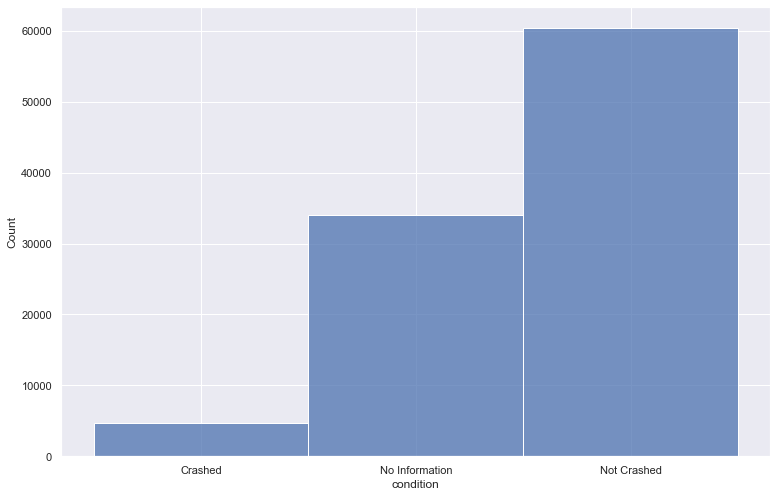

In [122]:
sns.histplot(otomoto_df["condition"])

<AxesSubplot:xlabel='price', ylabel='condition'>

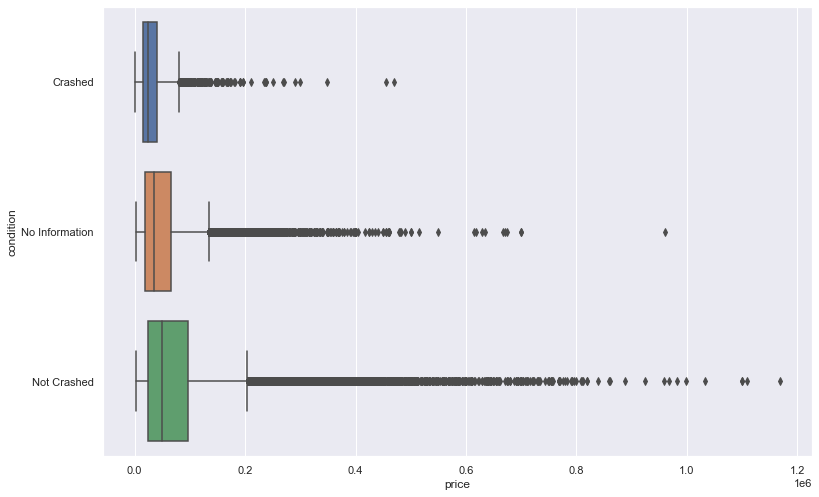

In [123]:
sns.boxplot(x="price", y="condition", data=otomoto_df)

In [124]:
otomoto_df["condition"].isna().any()

False

- condition is category variable
- it has no missing values
- the majority of cars are classified as not crashed
- there are a lot of cars with no information about crash
- dummy variables were created on unordered categorical variable (0 and 1 representation for possible options from condition feature) - DONE LETER, AFTER FEATURES EDA

### EDA: fuel_type

In [125]:
otomoto_df["fuel_type"].value_counts(normalize=True)

petrol        0.506564
diesel        0.430206
petrol-lpg    0.037457
hybrid        0.023371
electric      0.001917
petrol-cng    0.000484
Name: fuel_type, dtype: float64

In [126]:
otomoto_df["fuel_type"].isna().any()

False

<AxesSubplot:xlabel='fuel_type', ylabel='Count'>

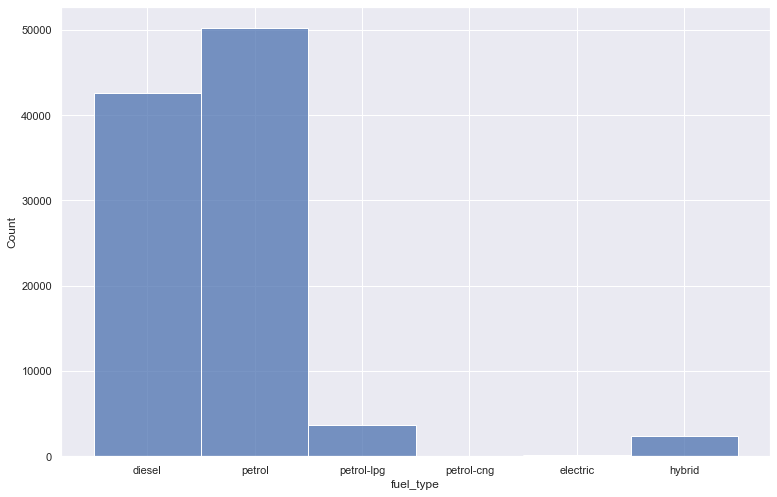

In [127]:
sns.histplot(otomoto_df["fuel_type"])

<AxesSubplot:xlabel='price', ylabel='fuel_type'>

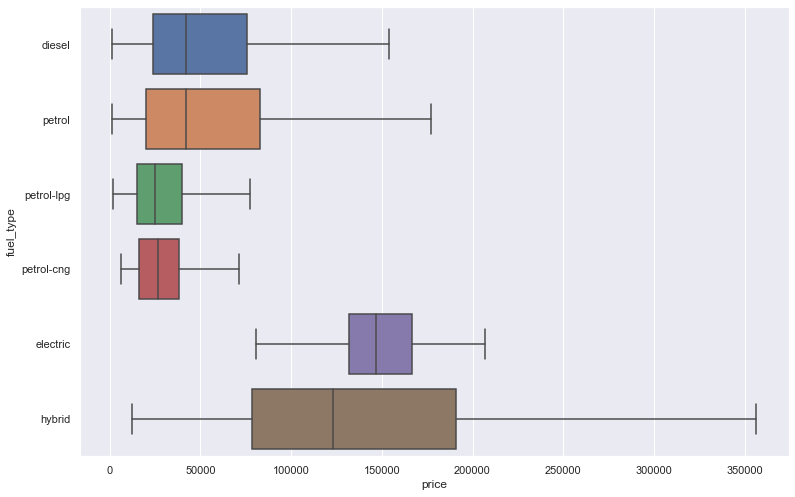

In [128]:
sns.boxplot(x="price", y="fuel_type", data=otomoto_df, showfliers=False)

<AxesSubplot:xlabel='fuel_type', ylabel='engine_power'>

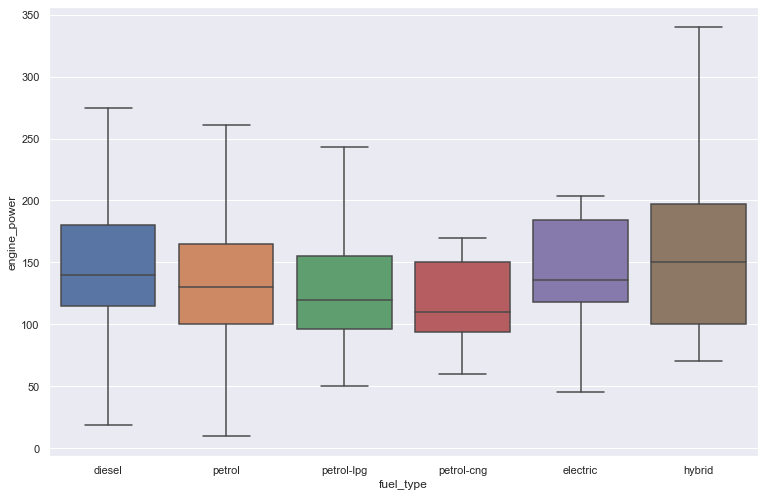

In [129]:
sns.boxplot(x="fuel_type", y="engine_power", data=otomoto_df, showfliers=False)

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='count'>

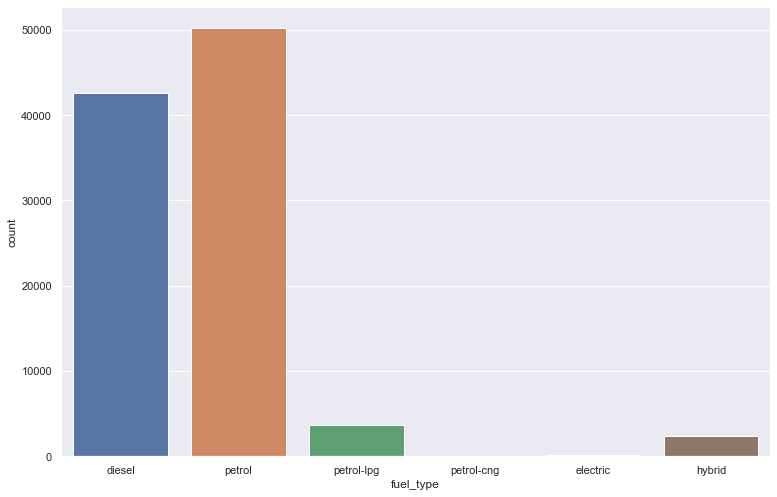

In [130]:
sns.countplot(otomoto_df["fuel_type"])

In [131]:
# otomoto_df = pd.get_dummies(otomoto_df, columns=['fuel_type'])

- fuel_type is category variable with 7 unique categories
- it has no missing values
- the majority of cars are fueled with patrol or disel
- dummy variables were created on unordered categorical variable (0 and 1 representation for possible options from condition feature) - DONE LATER, AFTER FEATURES EDA

### EDA: State

In [132]:
otomoto_df["state"].nunique()

2

In [133]:
otomoto_df["state"].unique()

array(['Używane', 'Nowe'], dtype=object)

In [134]:
otomoto_df["state"].value_counts(normalize=True)

Używane    0.923117
Nowe       0.076883
Name: state, dtype: float64

In [135]:
otomoto_df["state"].isna().any()

False

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

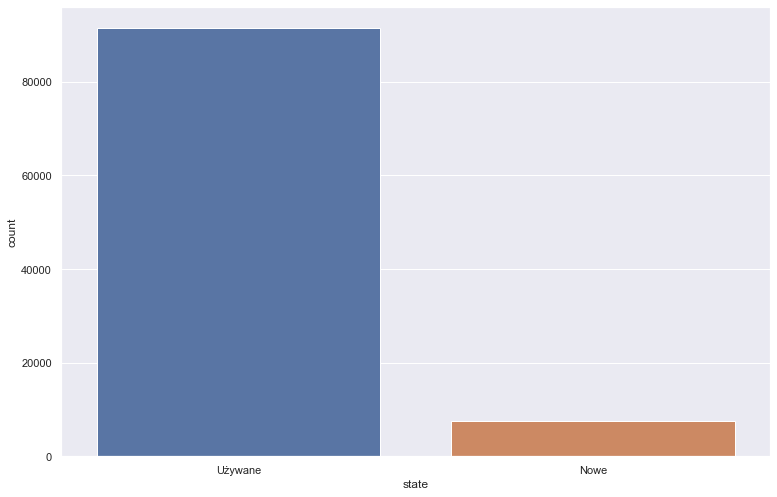

In [136]:
sns.countplot(otomoto_df["state"])

<AxesSubplot:xlabel='price', ylabel='state'>

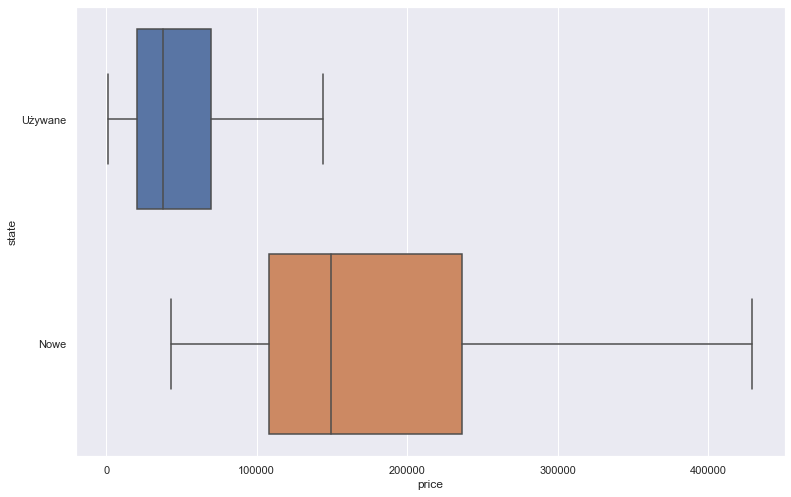

In [137]:
sns.boxplot(x="price", y="state", data=otomoto_df, showfliers=False)

In [138]:
# otomoto_df = pd.get_dummies(otomoto_df, columns=['state'])

- categorical variable nominal, 2 unique classess (Uzywane, Nowe)
- no missing values
- majority > 91% of offered cars are used
- dummy variable done for that categorical feature - DONE LATER, AFTER FEATURES EDA

### EDA: city

In [139]:
otomoto_df["city"].nunique()

4789

In [140]:
otomoto_df["city"].value_counts().head(30)

warszawa               5584
lodz                   2568
wroclaw                2256
poznan                 2133
krakow                 2068
gdansk                 1946
katowice               1693
miasto_lublin          1534
radom                  1316
szczecin               1225
bydgoszcz              1090
bialystok              1066
warszawa_145813        1012
plock                   913
chorzow                 895
kielce                  834
czestochowa             832
gdynia                  803
rzeszow                 764
piaseczno               724
rybnik                  683
olsztyn                 675
gniezno                 661
ostrow-wielkopolski     637
torun                   630
bielsko-biala           598
kalisz                  589
zielonagora             583
elblag                  580
nowy-sacz               573
Name: city, dtype: int64

In [141]:
otomoto_df["city"].isna().any()

False

There are many seperate cities that should be the same like warszawa and warszawa 145813. Looks like a lot has to be done here to make this feature usefull. At first sight, all strings containing '_' are incorrect

In [142]:
otomoto_df["city"] = otomoto_df["city"].str.split("_").str[0]
otomoto_df["city"].value_counts()

warszawa      6596
lodz          2569
krakow        2405
wroclaw       2256
poznan        2133
              ... 
poniecice        1
baczyn           1
klobuczyno       1
gniezdzewo       1
bielawki         1
Name: city, Length: 4353, dtype: int64

In [143]:
sum(otomoto_df["city"].str.contains("\d", regex=True))

0

In [144]:
otomoto_df["city"].nunique()

4353

There are to many unique values in this feature. I am going to drop this column

- City is a categorical feature
- scraping values contains strange characters after _ sign, so some cities could be treated as seperate categories e.g. warszawa and warszawa_145813
- to solve mentioned issue, everyting after _ is removed (including _)
- REMOVE THIS COLUMN

In [145]:
otomoto_df.drop('city', axis=1, inplace=True)

In [146]:
otomoto_df.shape

(99099, 21)

### EDA: region

In [147]:
otomoto_df["region"].nunique()

23

In [148]:
otomoto_df["region"].value_counts()

mazowieckie                 18335
slaskie                     13179
wielkopolskie               13171
malopolskie                  8563
dolnoslaskie                 7046
lodzkie                      6419
pomorskie                    6206
kujawsko-pomorskie           4535
lubelskie                    4033
zachodniopomorskie           3255
podkarpackie                 3061
swietokrzyskie               2857
lubuskie                     2442
warminsko-mazurskie          2345
podlaskie                    1917
opolskie                     1681
moravian-silesian-region       35
trencin                         7
presov                          5
nordrhein-westfalen             3
hessen                          2
belgium                         1
vilnius                         1
Name: region, dtype: int64

For some of the regions (outside of PL), prices are set in EUR and there is no curracny feature. I am going to manualy change EUR to PLN using today rate: 1EUR = 4.7PLN

In [149]:
otomoto_df["price"] = np.where(
    otomoto_df["region"] == "vilnius", otomoto_df["price"] * 4.7, otomoto_df["price"]
)

otomoto_df["price"] = np.where(
    otomoto_df["region"] == "nordrhein-westfalen",
    otomoto_df["price"] * 4.7,
    otomoto_df["price"],
)

otomoto_df["price"] = np.where(
    otomoto_df["region"] == "trencin", otomoto_df["price"] * 4.7, otomoto_df["price"]
)

In [150]:
otomoto_df["region"].isna().any()

False

In [151]:
otomoto_df.drop("region", axis=1, inplace=True)

- categorical variable with 23 unique values
- majority of regions are in Poland
- some ads from abroad are in EUR - mapping based on cunnrent rate was used
- no missing values
- REMOVE THIS COLUMN

### EDA: make

In [152]:
otomoto_df["make"].nunique()

56

In [153]:
otomoto_df["make"].value_counts()

opel              9373
audi              9059
volkswagen        8816
bmw               8394
ford              6335
mercedes-benz     5753
renault           5714
skoda             5236
toyota            5064
peugeot           4600
hyundai           3183
kia               3132
citroen           2572
nissan            2496
seat              2459
mazda             2240
honda             2180
volvo             1928
fiat              1660
jeep              1402
suzuki            1279
dacia             1209
mitsubishi         899
mini               858
land-rover         703
alfa-romeo         700
porsche            516
lexus              380
jaguar             300
subaru             286
saab               185
cupra              129
abarth               9
other                8
isuzu                6
lincoln              4
aixam                4
maybach              4
microcar             3
maserati             3
ds-automobiles       2
chevrolet            2
mg                   1
nsu        

In [154]:
otomoto_df["make"].isna().any()

False

In [155]:
make_count = dict(zip(otomoto_df['make'].value_counts().index, otomoto_df['make'].value_counts().values))
make_to_model = []
for key, value in make_count.items():
    if value >= 100:
        make_to_model.append(key)

In [156]:
otomoto_df.shape

(99099, 20)

In [157]:
otomoto_df = otomoto_df[otomoto_df['make'].isin(make_to_model)]

In [158]:
otomoto_df.shape

(99040, 20)

- categorical variable with 56 unique values
- no missing values
- Remove observations if count of make is lower than 100

### EDA: model

In [159]:
otomoto_df["model"].nunique()

245

In [160]:
otomoto_df["model"].value_counts().head(20)

astra       3132
a4          2419
seria-3     2188
golf        2163
seria-5     2112
a6          2028
octavia     1975
passat      1918
insignia    1681
focus       1556
a3          1410
corsa       1397
megane      1395
mondeo      1298
fabia       1255
qashqai     1232
klasa-e     1171
klasa-c     1129
sportage    1077
clio        1062
Name: model, dtype: int64

In [161]:
otomoto_df["model"].isna().any()

False

Check if there are no duplicated models for some randomly chosen makes

In [162]:
otomoto_df[otomoto_df["make"] == "audi"]["model"].value_counts()

a4            2419
a6            2028
a3            1410
q5             721
a5             674
q7             358
a8             352
q3             311
a7             208
a6-allroad     126
a4-allroad     121
tt             120
s3             105
a1             105
other            1
Name: model, dtype: int64

In [163]:
otomoto_df[otomoto_df["make"] == "bmw"]["model"].value_counts()

seria-3    2188
seria-5    2112
seria-1     819
x3          788
x5          584
seria-7     433
x1          403
seria-4     285
seria-2     236
x6          167
3gt         129
x4          121
seria-6     109
other        20
Name: model, dtype: int64

- categorical variable 
- no missing values

### EDA: version

In [164]:
otomoto_df["version"].nunique()

529

In [165]:
otomoto_df["version"].value_counts(dropna=False, normalize=True)

NaN                      0.218740
gen-a-2008-2017          0.011844
gen-iii-2013             0.011672
gen-j-2009-2015          0.010824
gen-b8-2014              0.010359
                           ...   
gen-i-1997-2003-rx       0.000010
gen-iv-1987-1991         0.000010
gen-i-1997-2003-prius    0.000010
gen-ii-2000-2003         0.000010
gen-e89-2009-2016-x4     0.000010
Name: version, Length: 530, dtype: float64

30% of all available records have missing value. Hence I am going to completely delete this feature from dataset

In [166]:
otomoto_df.drop("version", axis=1, inplace=True)

### EDA: category

In [167]:
otomoto_df["category"].nunique()

9

In [168]:
otomoto_df["category"].value_counts()

suv         23519
combi       20289
compact     15552
sedan       14394
city-car    11385
minivan      8866
coupe        2501
mini         1822
cabrio        712
Name: category, dtype: int64

In [169]:
otomoto_df["category"].isna().any()

False

- categorical variable 
- no missing values

### EDA: color

In [170]:
otomoto_df["color"].nunique()

14

In [171]:
otomoto_df["color"].value_counts(dropna=False, normalize=True)

black          0.254705
grey           0.160380
white          0.149889
silver         0.141832
blue           0.099384
other          0.060046
red            0.045386
brown          0.028201
dark-red       0.015398
green          0.014842
yellow-gold    0.011490
brown-beige    0.011420
violet         0.003625
yellow         0.003403
Name: color, dtype: float64

In [172]:
otomoto_df["color"].isna().any()

False

In [173]:
otomoto_df.drop("color", axis=1, inplace=True)

- categorical variable 
- no missing values
- dropping this column

### EDA: origin

In [174]:
otomoto_df["origin"].nunique()

32

In [175]:
otomoto_df["origin"].value_counts(normalize=True, dropna=False)

NaN       0.324909
pl        0.297880
d         0.231613
f         0.040034
b         0.024515
usa       0.018467
ch        0.013722
nl        0.011521
i         0.009410
a         0.007845
s         0.005271
dk        0.004321
cdn       0.002888
cz        0.001575
l         0.001222
others    0.001202
gb        0.001000
e         0.000868
fi        0.000545
sk        0.000363
n         0.000273
si        0.000111
is        0.000101
ru        0.000050
ua        0.000050
lt        0.000050
ro        0.000040
hu        0.000040
irl       0.000040
by        0.000020
est       0.000020
hr        0.000020
lv        0.000010
Name: origin, dtype: float64

In [176]:
otomoto_df["origin"].fillna("Unknown", inplace=True)

In [177]:
otomoto_df["origin"].isna().any()

False

<AxesSubplot:xlabel='origin', ylabel='price'>

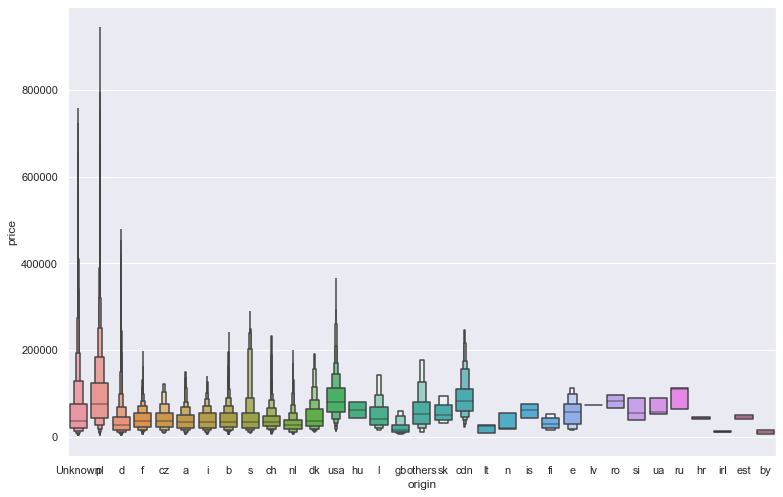

In [178]:
sns.boxenplot(x="origin", y="price", data=otomoto_df, showfliers=False)

- categorical variable 
- majority class is NaN. I am not going to use any impute strategy. Instead I am filling all missing values with a new class: Unknown
- from boxplot, I can see that in general cars originally from Poland and USA are more expensive

### EDA gearbox

In [179]:
otomoto_df["gearbox"].nunique()

2

In [180]:
otomoto_df["gearbox"].value_counts(dropna=False, normalize=True)

manual       0.638580
automatic    0.361278
NaN          0.000141
Name: gearbox, dtype: float64

In [181]:
otomoto_df[otomoto_df["gearbox"].isna()]

,link,condition,features,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,make,model,category,origin,gearbox,transmission,private_business,is_outlier
229,https://www.otomoto.pl/oferta/dacia-spring-com...,Not Crashed,"[bluetooth, cd, automatic-lights, rear-parking...",Nowe,2022,10.0,45.0,0.0,electric,95900.0,dacia,other,compact,pl,NaN,front-wheel,business,False
236,https://www.otomoto.pl/oferta/dacia-spring-com...,Not Crashed,"[bluetooth, cd, automatic-lights, rear-parking...",Nowe,2022,5.0,45.0,0.0,electric,93400.0,dacia,other,compact,pl,NaN,front-wheel,business,False
754,https://www.otomoto.pl/oferta/dacia-spring-com...,Not Crashed,"[abs, bluetooth, cd, central-lock, automatic-l...",Nowe,2022,5.0,45.0,0.0,electric,95900.0,dacia,other,compact,Unknown,NaN,front-wheel,business,False
1225,https://www.otomoto.pl/oferta/dacia-spring-com...,Not Crashed,"[abs, bluetooth, cd, central-lock, automatic-l...",Nowe,2022,5.0,45.0,0.0,electric,95900.0,dacia,other,compact,Unknown,NaN,front-wheel,business,False
1226,https://www.otomoto.pl/oferta/dacia-spring-com...,Not Crashed,"[abs, bluetooth, cd, central-lock, automatic-l...",Nowe,2022,5.0,45.0,0.0,electric,84900.0,dacia,other,compact,Unknown,NaN,front-wheel,business,False
37945,https://www.otomoto.pl/oferta/audi-a6-quattro-...,Not Crashed,"[alloy-wheels, lane-assist, alarm, bluetooth, ...",Używane,2019,35663.0,286.0,3000.0,diesel,289000.0,audi,a6,combi,pl,NaN,all-wheel-permanent,business,False
40844,https://www.otomoto.pl/oferta/audi-a6-3-0tdi-v...,Not Crashed,"[alloy-wheels, lane-assist, alarm, bluetooth, ...",Nowe,2022,0.0,286.0,3000.0,diesel,388352.0,audi,a6,combi,pl,NaN,all-wheel-permanent,business,False
50703,https://www.otomoto.pl/oferta/volkswagen-passa...,No Information,"[abs, asr, esp, alloy-wheels, alarm, central-l...",Używane,2019,74900.0,272.0,2000.0,petrol,194900.0,volkswagen,passat,combi,pl,NaN,all-wheel-auto,business,False
56777,https://www.otomoto.pl/oferta/volkswagen-passa...,Not Crashed,"[abs, alloy-wheels, bluetooth, central-lock, a...",Używane,2016,33526.0,238.0,2000.0,petrol,104900.0,volkswagen,passat,sedan,pl,NaN,all-wheel-auto,business,False
57721,https://www.otomoto.pl/oferta/volkswagen-caddy...,No Information,"[abs, cd, central-lock, front-electric-windows...",Używane,2016,198000.0,108.5,2000.0,diesel,33850.0,volkswagen,caddy,combi,Unknown,NaN,NaN,business,False


In [182]:
otomoto_df["gearbox"].fillna(otomoto_df["gearbox"].mode()[0], inplace=True)

In [183]:
otomoto_df["gearbox"].value_counts(dropna=False, normalize=True)

manual       0.638722
automatic    0.361278
Name: gearbox, dtype: float64

<AxesSubplot:xlabel='gearbox', ylabel='price'>

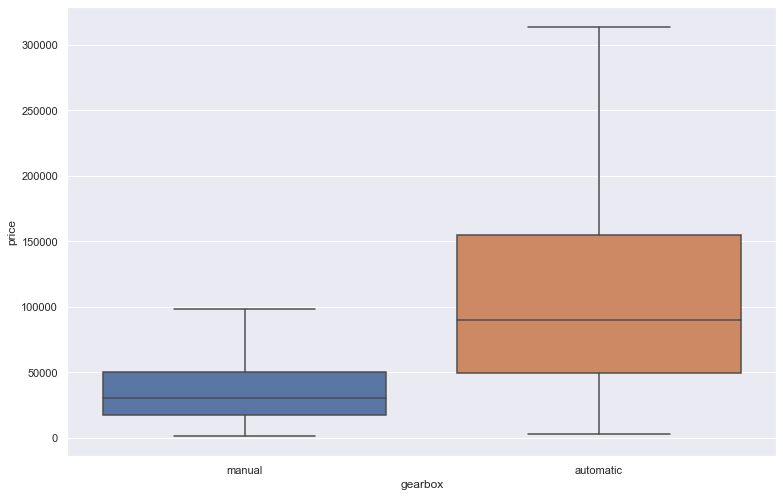

In [184]:
sns.boxplot(x="gearbox", y="price", data=otomoto_df, showfliers=False)

- categorical variable
- majority of cars have manual gearbox
- only 20 missing values: used simple mode function to replace NaN
- at first sight, cars with automatic gearbox are more expensive

### EDA: transmission

In [185]:
otomoto_df["transmission"].nunique()

5

In [186]:
otomoto_df["transmission"].value_counts(dropna=False, normalize=True)

front-wheel            0.662894
all-wheel-auto         0.093992
all-wheel-permanent    0.084733
rear-wheel             0.073506
NaN                    0.072728
all-wheel-lock         0.012147
Name: transmission, dtype: float64

In [187]:
otomoto_df["transmission"].fillna("Unknown", inplace=True)
otomoto_df["transmission"].value_counts(dropna=False, normalize=True)

front-wheel            0.662894
all-wheel-auto         0.093992
all-wheel-permanent    0.084733
rear-wheel             0.073506
Unknown                0.072728
all-wheel-lock         0.012147
Name: transmission, dtype: float64

for my analysis I am going treat the all-wheel-auto, all-wheel-permanent and all-wheel-lock as all-wheel

In [188]:
otomoto_df["transmission"].replace(
    to_replace=["all-wheel-auto", "all-wheel-permanent", "all-wheel-lock"],
    value="all-wheel",
    inplace=True,
)

<AxesSubplot:xlabel='transmission', ylabel='price'>

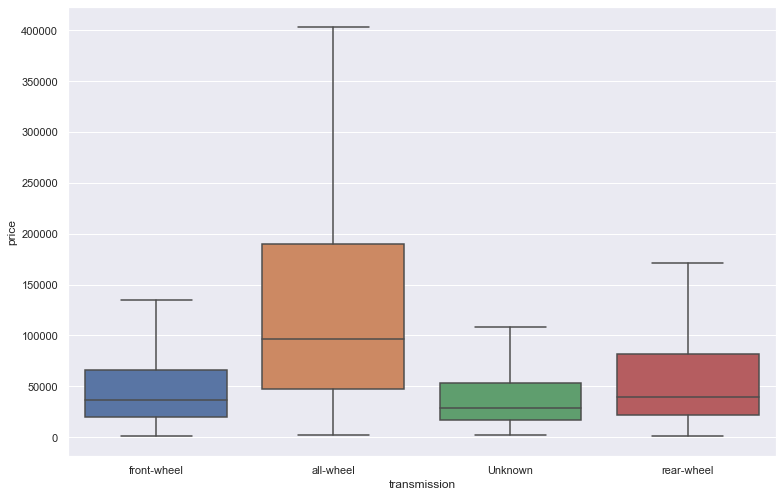

In [189]:
sns.boxplot(x="transmission", y="price", data=otomoto_df, showfliers=False)

- categorical variable
- majority of cars are front-wheel
- 7% of all observations are missing for transmission: created subcategory for that group
- all categories with all-wheel-drive option were merged to one: all-wheel
- at first sight, all-wheel cars are most expensive

### EDA: private_business

In [190]:
otomoto_df["private_business"].value_counts(dropna=False)

business    55278
private     43762
Name: private_business, dtype: int64

<AxesSubplot:xlabel='private_business', ylabel='price'>

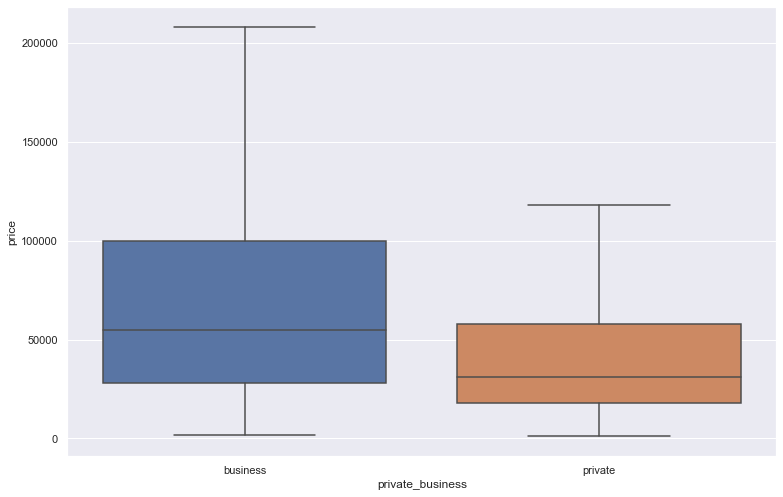

In [191]:
sns.boxplot(x="private_business", y="price", data=otomoto_df, showfliers=False)

- categorical variable (2 unique values)
- no missing observations
- slightly more business ads
- cars sold by business owners are in general more expensive

### EDA: features

In [192]:
otomoto_df["features"]

0         [abs, velour-interior, electronic-immobiliser,...
1         [abs, central-lock, front-electric-windows, el...
2         [abs, alarm, central-lock, front-electric-wind...
3         [abs, alloy-wheels, cd, central-lock, front-el...
4         [abs, cd, central-lock, front-electric-windows...
                                ...                        
115143    [abs, cd, central-lock, front-electric-windows...
115144    [abs, asr, central-lock, bluetooth, lane-assis...
115145    [abs, cd, central-lock, front-electric-windows...
115146    [abs, cd, central-lock, front-electric-windows...
115147    [abs, alarm, asr, cd, central-lock, front-elec...
Name: features, Length: 99040, dtype: object

In [193]:
otomoto_df["features"][0]

['abs', 'velour-interior', 'electronic-immobiliser', 'assisted-steering']

In [194]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])


to_1D(otomoto_df["features"]).value_counts(dropna=False)

abs                            95992
central-lock                   93828
front-electric-windows         90465
assisted-steering              90111
front-passenger-airbags        87617
front-airbags                  87519
electronic-rearview-mirrors    83411
electronic-immobiliser         83167
original-radio                 82886
onboard-computer               82544
esp                            78998
alloy-wheels                   76866
steering-whell-comands         75824
isofix                         74864
asr                            74716
front-side-airbags             72979
rear-electric-windows          70176
automatic-air-conditioning     69284
fog-lights                     67017
cruise-control                 66808
bluetooth                      65871
cd                             65251
rear-parking-sensors           64352
heated-rearview-mirrors        64092
side-window-airbags            63967
automatic-wipers               59756
daytime-lights                 58829
a

Text(0.5, 1.0, 'Car equipment features ')

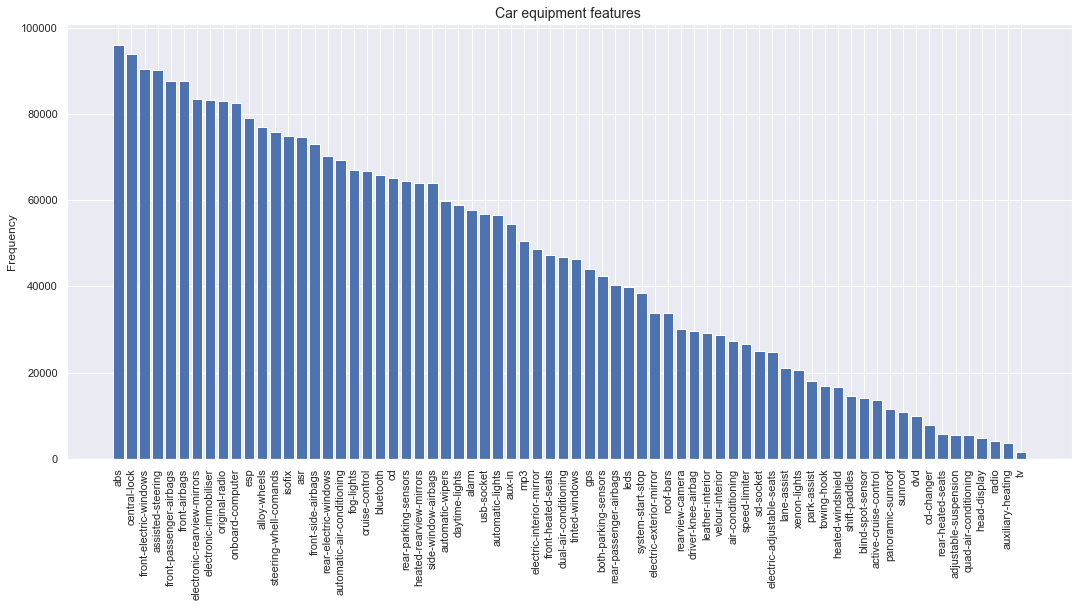

In [195]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.bar(
    to_1D(otomoto_df["features"]).value_counts().index,
    to_1D(otomoto_df["features"]).value_counts().values,
)
ax.set_ylabel("Frequency", size=12)
plt.xticks(rotation=90)
ax.set_title("Car equipment features ", size=14)

In [196]:
def filter_list(full_list):
    features_to_delete = [
        "abs",
        "central-lock",
        "front-electric-windows",
        "assisted-steering",
        "front-airbags",
        "front-passenger-airbags",
        "electronic-rearview-mirrors",
        "electronic-immobiliser",
        "original-radio",
        "onboard-computer",
        "esp",
    ]
    set_features_to_delete = set(features_to_delete)
    return [x for x in full_list if x not in set_features_to_delete]


otomoto_df["features"] = otomoto_df["features"].apply(filter_list)

Text(0.5, 1.0, 'Car equipment features ')

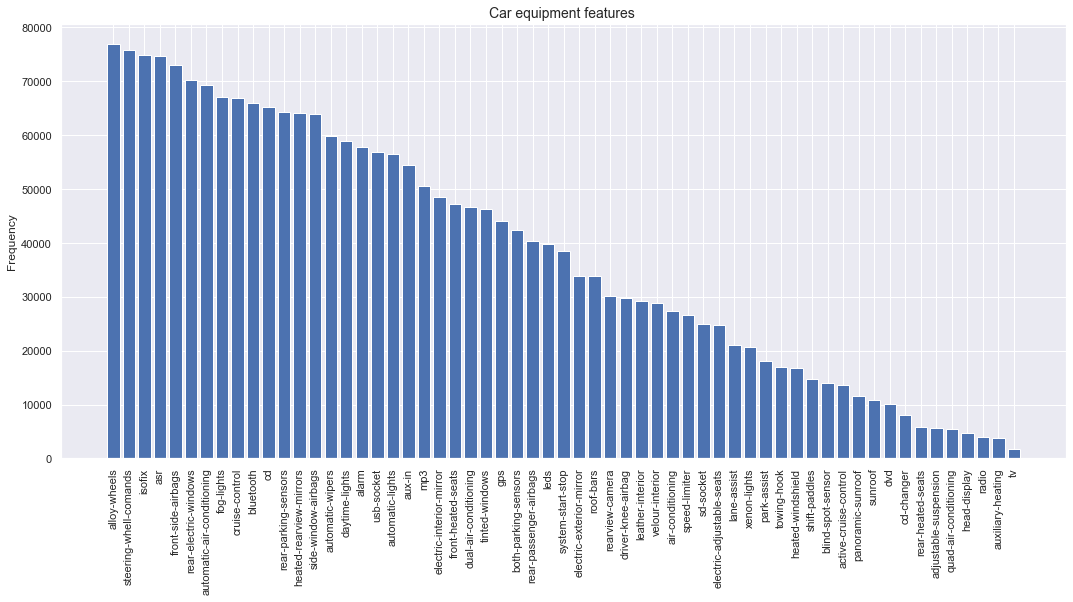

In [197]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.bar(
    to_1D(otomoto_df["features"]).value_counts().index,
    to_1D(otomoto_df["features"]).value_counts().values,
)
ax.set_ylabel("Frequency", size=12)
plt.xticks(rotation=90)
ax.set_title("Car equipment features ", size=14)

In [198]:
otomoto_tree_original_df = otomoto_df.copy()

In [199]:
otomoto_df.reset_index(inplace=True, drop=True)
mlb = MultiLabelBinarizer()
otomoto_df = pd.concat(
    [
        otomoto_df,
        pd.DataFrame(mlb.fit_transform(otomoto_df["features"]), columns=mlb.classes_),
    ],
    axis=1,
)
otomoto_df.shape

(99040, 77)

In [200]:
otomoto_df.head()

,link,condition,features,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,make,model,category,origin,gearbox,transmission,private_business,is_outlier,active-cruise-control,adjustable-suspension,air-conditioning,alarm,alloy-wheels,asr,automatic-air-conditioning,automatic-lights,automatic-wipers,aux-in,auxiliary-heating,blind-spot-sensor,bluetooth,both-parking-sensors,cd,cd-changer,cruise-control,daytime-lights,driver-knee-airbag,dual-air-conditioning,dvd,electric-adjustable-seats,electric-exterior-mirror,electric-interior-mirror,fog-lights,front-heated-seats,front-side-airbags,gps,head-display,heated-rearview-mirrors,heated-windshield,isofix,lane-assist,leather-interior,leds,mp3,panoramic-sunroof,park-assist,quad-air-conditioning,radio,rear-electric-windows,rear-heated-seats,rear-parking-sensors,rear-passenger-airbags,rearview-camera,roof-bars,sd-socket,shift-paddles,side-window-airbags,speed-limiter,steering-whell-comands,sunroof,system-start-stop,tinted-windows,towing-hook,tv,usb-socket,velour-interior,xenon-lights
0,https://www.otomoto.pl/oferta/dacia-logan-1-5-...,Crashed,[velour-interior],Używane,2013,103000.0,75.0,1500.0,diesel,7000.0,dacia,logan,sedan,Unknown,manual,front-wheel,business,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,https://www.otomoto.pl/oferta/dacia-dokker-sal...,No Information,"[asr, bluetooth, aux-in, usb-socket, air-condi...",Używane,2018,136672.0,90.0,1500.0,diesel,34000.0,dacia,dokker,combi,pl,manual,front-wheel,business,False,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,https://www.otomoto.pl/oferta/dacia-sandero-se...,Not Crashed,"[alarm, roof-bars, cd, mp3, air-conditioning]",Używane,2012,138000.0,75.0,1100.0,petrol,15900.0,dacia,sandero,city-car,d,manual,front-wheel,business,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,https://www.otomoto.pl/oferta/dacia-sandero-st...,Not Crashed,"[alloy-wheels, cd, aux-in, air-conditioning, f...",Używane,2010,244000.0,87.0,1600.0,petrol,14900.0,dacia,sandero-stepway,city-car,Unknown,manual,front-wheel,private,False,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,https://www.otomoto.pl/oferta/dacia-dokker-1-6...,Crashed,"[cd, alarm, bluetooth, usb-socket, isofix, air...",Używane,2013,120100.0,84.0,1600.0,petrol-lpg,19300.0,dacia,dokker,minivan,pl,manual,front-wheel,business,False,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


## Categorical features encoding

### Dropping features

In [201]:
def drop_columns(df):
    cols_to_drop = ["link", "features"]
    df.drop(cols_to_drop, axis=1, inplace=True)


drop_columns(otomoto_df)
otomoto_df.shape

(99040, 75)

### One hot encoder for categorical variables

In [202]:
numerics = ["uint8", "int16", "int32", "int64", "float16", "float32", "float64"]

categorical_featurs = otomoto_df.select_dtypes(include="object").columns
numerical_features = otomoto_df.select_dtypes(include=numerics).columns

print(f"Lenght of categorical features: {len(categorical_featurs)}")
print(f"Lenght of numerical features: {len(numerical_features)}")

Lenght of categorical features: 11
Lenght of numerical features: 63


In [203]:
dummies = pd.get_dummies(otomoto_df[categorical_featurs], drop_first=True)
print(dummies.shape)

(99040, 351)


In [204]:
dummies.head()

,condition_No Information,condition_Not Crashed,state_Używane,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,year_1999,fuel_type_electric,fuel_type_hybrid,fuel_type_petrol,fuel_type_petrol-cng,fuel_type_petrol-lpg,make_audi,make_bmw,make_citroen,make_cupra,make_dacia,make_fiat,make_ford,make_honda,make_hyundai,make_jaguar,make_jeep,make_kia,make_land-rover,make_lexus,make_mazda,make_mercedes-benz,make_mini,make_mitsubishi,make_nissan,make_opel,make_peugeot,make_porsche,make_renault,make_saab,make_seat,make_skoda,make_subaru,make_suzuki,make_toyota,make_volkswagen,make_volvo,model_2,model_2008,model_206,model_207,model_208,model_3,model_3008,model_307,model_308,model_3gt,model_407,model_5,model_500,model_5008,model_508,model_6,model_9-3,model_a1,model_a3,model_a4,model_a4-allroad,model_a5,model_a6,model_a6-allroad,model_a7,model_a8,model_accord,model_alhambra,model_altea,model_altea-xl,model_antara,model_arkana,model_arona,model_arteon,model_astra,model_asx,model_ateca,model_auris,model_avensis,model_aygo,model_berlingo,model_bravo,model_c-hr,model_c-max,model_c3,model_c3-picasso,model_c4,model_c4-cactus,model_c4-grand-picasso,model_c4-picasso,model_c5,model_caddy,model_captur,model_carens,model_cayenne,model_ceed,model_cherokee,model_citigo,model_civic,model_cla,model_clio,model_clk,model_cls,model_clubman,model_colt,model_combo,model_compass,model_cooper,model_cooper-s,model_corolla,model_corolla-verso,model_corsa,model_countryman,model_cr-v,model_crossland-x,model_cupra-formentor,model_cx-3,model_cx-5,model_discovery,model_discovery-sport,model_dokker,model_ds3,model_duster,model_ecosport,model_edge,model_espace,model_exeo,model_f-pace,model_fabia,model_fiesta,model_focus,model_forester,model_freemont,model_fusion,model_galaxy,model_giulia,model_giulietta,model_gla,model_glc,model_gle,model_golf,model_golf-plus,model_grand-c-max,model_grand-cherokee,model_grand-scenic,model_grand-vitara,model_grande-punto,model_grandland-x,model_hr-v,model_i10,model_i20,model_i30,model_i40,model_ibiza,model_insignia,model_is,model_ix20,model_ix35,model_jazz,model_jetta,model_jimny,model_juke,model_kadjar,model_kamiq,model_kangoo,model_klasa-a,model_klasa-b,model_klasa-c,model_klasa-e,model_klasa-s,model_klasa-v,model_kodiaq,model_koleos,model_kona,model_kuga,model_laguna,model_lancer,model_land-cruiser,model_legacy,model_leon,model_logan,model_macan,model_megane,model_meriva,model_micra,model_ml,model_modus,model_mokka,model_mondeo,model_multivan,model_mustang,model_note,model_nx,model_octavia,model_one,model_optima,model_other,model_outlander,model_panamera,model_panda,model_partner,model_passat,model_picanto,model_polo,model_prius,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_qashqai-2,model_range-rover-evoque,model_range-rover-sport,model_range-rover-velar,model_rapid,model_rav4,model_renegade,model_rio,model_roomster,model_rx,model_s-max,model_s3,model_s60,model_sandero,model_sandero-stepway,model_santa-fe,model_scenic,model_scirocco,model_seria-1,model_seria-2,model_seria-3,model_seria-4,model_seria-5,model_seria-6,model_seria-7,model_sharan,model_sl,model_sorento,model_soul,model_space-star,model_sportage,model_stelvio,model_superb,model_swift,model_sx4,model_sx4-s-cross,model_t-cross,model_t-roc,model_talisman,model_tiguan,model_tipo,model_touareg,model_touran,model_trafic,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v90,model_vectra,model_venga,model_verso,model_vitara,model_vito,model_vivaro,model_w124-1984-1993,model_wrangler,model_x-trail,model_x1,model_x3,model_x4,model_x5,model_x6,model_xc-60,model_xc-90,model_xceed,model_xf,model_yaris,model_zafira,category_city-car,category_combi,category_compact,category_coupe,category_mini,category_minivan,category_sedan,category_suv,origin_a,orig

In [205]:
otomoto_df = pd.concat([otomoto_df, dummies], axis=1)
otomoto_df.shape

(99040, 426)

In [206]:
otomoto_df.drop(categorical_featurs, axis=1, inplace=True)

In [207]:
otomoto_df.shape

(99040, 415)

## Train Test split

In [208]:
otomoto_df.columns.tolist()

['mileage_km',
 'engine_power',
 'engine_capacity',
 'price',
 'is_outlier',
 'active-cruise-control',
 'adjustable-suspension',
 'air-conditioning',
 'alarm',
 'alloy-wheels',
 'asr',
 'automatic-air-conditioning',
 'automatic-lights',
 'automatic-wipers',
 'aux-in',
 'auxiliary-heating',
 'blind-spot-sensor',
 'bluetooth',
 'both-parking-sensors',
 'cd',
 'cd-changer',
 'cruise-control',
 'daytime-lights',
 'driver-knee-airbag',
 'dual-air-conditioning',
 'dvd',
 'electric-adjustable-seats',
 'electric-exterior-mirror',
 'electric-interior-mirror',
 'fog-lights',
 'front-heated-seats',
 'front-side-airbags',
 'gps',
 'head-display',
 'heated-rearview-mirrors',
 'heated-windshield',
 'isofix',
 'lane-assist',
 'leather-interior',
 'leds',
 'mp3',
 'panoramic-sunroof',
 'park-assist',
 'quad-air-conditioning',
 'radio',
 'rear-electric-windows',
 'rear-heated-seats',
 'rear-parking-sensors',
 'rear-passenger-airbags',
 'rearview-camera',
 'roof-bars',
 'sd-socket',
 'shift-paddles',
 '

In [209]:
Y = otomoto_df["price"]
X = otomoto_df.drop('price', axis=1)
#X = otomoto_df[['year', 'mileage_km', 'engine_power', 'state_Nowe', 'state_Używane']]
#Y.reset_index(inplace=True, drop=True)
#X.reset_index(inplace=True, drop=True)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [211]:
print(f"Shape of training dataset: {X_train.shape}")
print(f"Shape of testing dataset: {X_test.shape}")

Shape of training dataset: (79232, 414)
Shape of testing dataset: (19808, 414)


/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


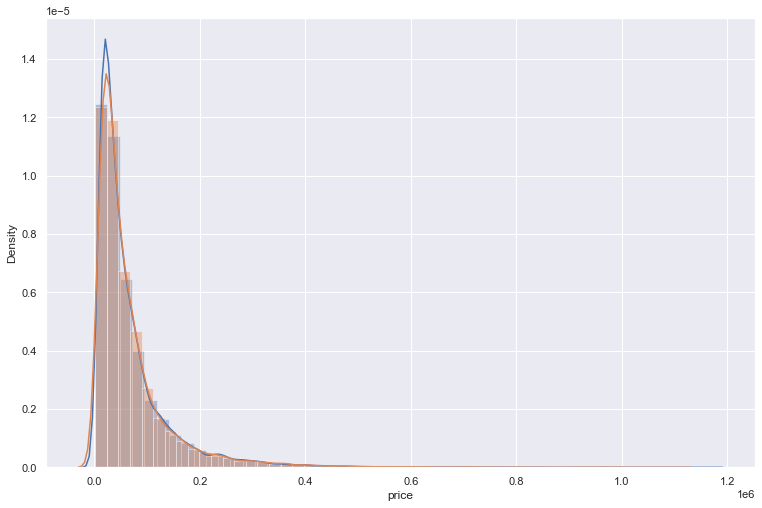

In [212]:
sns.distplot(y_train)
sns.distplot(y_test)
plt.show()

In [213]:
X_train['state_Używane'].value_counts(normalize=True)

1    0.922165
0    0.077835
Name: state_Używane, dtype: float64

In [214]:
X_test['state_Używane'].value_counts(normalize=True)

1    0.926848
0    0.073152
Name: state_Używane, dtype: float64

In [215]:
stats.kstest(y_train, y_test)

KstestResult(statistic=0.00455623990306947, pvalue=0.8957187811764061)

## Baseline linear regression model
* it is a baseline model built on all features

In [216]:
X_train.drop('is_outlier', axis=1, inplace=True)

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [217]:
X_train = sm.add_constant(X_train)
lr_mod_baseline = sm.OLS(y_train, X_train).fit()

In [218]:
print(lr_mod_baseline.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1048.
Date:                Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:24:47   Log-Likelihood:            -9.2760e+05
No. Observations:               79232   AIC:                         1.856e+06
Df Residuals:                   78828   BIC:                         1.860e+06
Df Model:                         403                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [219]:
lr_log_mod_baseline = sm.OLS(np.log(y_train), X_train).fit()

In [220]:
print(lr_log_mod_baseline.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     3425.
Date:                Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:24:55   Log-Likelihood:                 8141.5
No. Observations:               79232   AIC:                        -1.547e+04
Df Residuals:                   78828   BIC:                        -1.173e+04
Df Model:                         403                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Baseline summary
* The adjusted R^2 is very high, it means the volatility of dependent (price) variable is explained by changes in independent variables very well. 
* Model with log(price) is giving better adj. R squared and higher F statistics

In [221]:
dict_p_value_log_baseline = {}
for i in X_train.columns.tolist():
    dict_p_value_log_baseline[f"{i}"] = lr_log_mod_baseline.pvalues[i]

df_pvalue = (
    pd.DataFrame(dict_p_value_log_baseline.items(), columns=["Var_name", "p-Value"])
    .sort_values(by="p-Value")
    .reset_index(drop=True)
)

In [222]:
len(df_pvalue.loc[df_pvalue["p-Value"] >= 0.05]["Var_name"].values)

137

* There are 137 features that have higher p value that 0.05. It means that for those features there is more then 5% chance that feature has not affect on dependent variable. Let's create a model without those.

In [223]:
X_train_const = X_train['const']
X_train.drop('const', axis=1, inplace=True)
columns_sign = list(
    set(X_train.columns)
    - set(df_pvalue.loc[df_pvalue["p-Value"] >= 0.05]["Var_name"].values)
)
X_train_sign = X_train[columns_sign]
X_test_sign = X_test[columns_sign]

X_train_sign.reset_index(inplace=True, drop=True)
X_test_sign.reset_index(inplace=True, drop=True)

print(X_train_sign.shape)
print(X_test_sign.shape)

(79232, 276)
(19808, 276)


In [224]:
X_train_sign

,rear-parking-sensors,private_business_private,make_ford,make_mercedes-benz,model_gla,model_klasa-e,year_2017,origin_nl,model_jimny,year_2018,make_fiat,model_is,condition_Not Crashed,cruise-control,model_x5,year_2020,mp3,model_fusion,year_2013,model_corolla,model_scenic,model_picanto,model_touareg,model_tipo,category_city-car,model_rav4,model_giulia,model_grandland-x,model_multivan,model_macan,make_porsche,lane-assist,origin_cz,make_jaguar,model_qashqai,fog-lights,model_golf-plus,model_passat,model_tiguan,model_500,model_seria-6,model_santa-fe,leds,model_cooper-s,year_2019,make_nissan,model_ibiza,velour-interior,condition_No Information,model_sorento,model_klasa-a,model_panda,category_minivan,model_q3,model_a8,cd-changer,year_2014,gearbox_manual,rear-electric-windows,model_klasa-c,model_roomster,model_freemont,model_other,origin_sk,model_sharan,model_ceed,model_arkana,leather-interior,model_ml,model_tucson,model_auris,model_x4,model_sportage,model_seria-5,year_2016,model_sl,model_optima,year_2009,active-cruise-control,rear-passenger-airbags,model_aygo,model_cayenne,model_t-roc,make_seat,make_toyota,model_3008,model_carens,model_transporter,model_a6-allroad,model_prius,make_skoda,model_discovery-sport,engine_capacity,isofix,year_2012,origin_i,make_volvo,model_clio,front-side-airbags,fuel_type_hybrid,model_sx4,model_duster,model_x6,model_stelvio,head-display,model_kadjar,park-assist,model_9-3,model_q7,mileage_km,model_antara,model_grand-vitara,year_2008,year_2005,model_fabia,automatic-air-conditioning,bluetooth,year_2004,model_trafic,model_juke,auxiliary-heating,model_forester,model_cla,model_qashqai-2,origin_est,model_captur,origin_gb,model_f-pace,model_avensis,model_dokker,year_2011,model_yaris,origin_cdn,category_suv,model_tt,model_clk,category_sedan,model_talisman,quad-air-conditioning,heated-windshield,aux-in,model_seria-2,model_nx,model_jazz,gps,year_2007,model_vito,model_ateca,model_x-trail,model_modus,model_bravo,model_twingo,both-parking-sensors,model_vivaro,panoramic-sunroof,sd-socket,model_octavia,front-heated-seats,heated-rearview-mirrors,towing-hook,speed-limiter,steering-whell-comands,origin_dk,origin_d,driver-knee-airbag,model_land-cruiser,radio,model_sandero-stepway,model_q5,make_dacia,cd,model_megane,rearview-camera,model_swift,make_kia,origin_usa,model_scirocco,model_range-rover-sport,model_sx4-s-cross,category_mini,origin_irl,year_2003,origin_by,year_2006,make_honda,model_range-rover-velar,model_rio,model_corolla-verso,model_cooper,model_one,model_klasa-b,model_rx,model_cls,model_v40,electric-exterior-mirror,year_2002,model_kodiaq,model_civic,transmission_rear-wheel,alarm,model_cupra-formentor,model_punto,model_alhambra,year_2022,asr,alloy-wheels,rear-heated-seats,model_accord,fuel_type_electric,model_espace,dual-air-conditioning,model_ix35,origin_s,tinted-windows,fuel_type_petrol-cng,year_1999,model_rapid,model_countryman,model_seria-3,model_5008,model_glc,model_panamera,model_vitara,model_superb,category_combi,category_coupe,year_2010,shift-paddles,usb-socket,origin_pl,state_Używane,model_range-rover-evoque,model_seria-7,model_cr-v,xenon-lights,model_grande-punto,make_mini,make_lexus,model_arteon,model_koleos,make_suzuki,model_caddy,model_citigo,model_giulietta,model_laguna,fuel_type_petrol-lpg,model_xf,model_a7,model_c-hr,engine_power,transmission_all-wheel,sunroof,model_a6,model_focus,model_micra,model_verso,electric-adjustable-seats,model_seria-4,model_mokka,model_discovery,model_x3,model_note,year_2001,year_2015,model_x1,category_compact,model_v50,year_2021,make_saab,model_3gt,origin_ch,origin_ua,model_touran,model_hr-v,model_clubman,model_fiesta
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2400.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20400.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0

## Linear Regression

### Feature Selection

In [225]:
numerical_features = ["mileage_km", "engine_power", "engine_capacity"]
categorical_featurs = list(set(X_train_sign.columns) - set(numerical_features))

### Variance Threshold narrow down

In [226]:
from sklearn.feature_selection import VarianceThreshold

vth = VarianceThreshold(threshold=0.005)  # as deafult threshold=0
vth.fit(X_train_sign)
X_train_vth = X_train_sign.iloc[:, vth.get_support()]
X_train_sign.reset_index(inplace=True, drop=True)
X_train_vth.shape

(79232, 146)

In [227]:
X_test_vth = vth.transform(X_test_sign)

In [228]:
pd.DataFrame(
    {
        "Feature": X_train_sign.columns,
        "Variance": vth.variances_,
    }
).sort_values("Variance", ascending=True).head(40)

,Feature,Variance
182,origin_by,0.000000
124,origin_est,0.000000
180,origin_irl,0.000038
271,origin_ua,0.000063
63,origin_sk,0.000353
214,fuel_type_petrol-cng,0.000517
129,model_dokker,0.000983
86,model_carens,0.000996
40,model_seria-6,0.001009
41,model_santa-fe,0.001009


### ANOVA - selecting the most important k features

In [229]:
fs = SelectKBest(score_func=f_regression, k=30)
fs.fit(X_train_vth, y_train)
cols = fs.get_support(indices=True)
anova_feature_selection_dict = {}
for i in range(len(fs.scores_)):
    anova_feature_selection_dict[X_train_vth.columns[i]] = round(fs.scores_[i], 3)

anova_feature_selection_dict = dict(
    sorted(anova_feature_selection_dict.items(), key=lambda item: item[1], reverse=True)
)
anova_feature_selection_dict

{'engine_power': 46989.688,
 'mileage_km': 33605.918,
 'rearview-camera': 29471.095,
 'gearbox_manual': 29107.694,
 'lane-assist': 24058.569,
 'shift-paddles': 22600.285,
 'state_Używane': 22454.672,
 'leds': 21747.899,
 'transmission_all-wheel': 19947.26,
 'both-parking-sensors': 17189.84,
 'active-cruise-control': 16330.757,
 'year_2022': 13379.786,
 'park-assist': 12780.759,
 'year_2021': 12007.633,
 'bluetooth': 11011.316,
 'electric-adjustable-seats': 10973.661,
 'gps': 9936.013,
 'front-heated-seats': 9146.756,
 'usb-socket': 9096.327,
 'rear-parking-sensors': 8178.262,
 'cd': 8164.358,
 'engine_capacity': 7657.192,
 'leather-interior': 7388.629,
 'origin_pl': 7205.027,
 'quad-air-conditioning': 6726.365,
 'category_suv': 6585.661,
 'speed-limiter': 5864.506,
 'head-display': 5729.946,
 'automatic-air-conditioning': 5682.377,
 'tinted-windows': 5137.18,
 'rear-heated-seats': 4785.678,
 'private_business_private': 4688.6,
 'panoramic-sunroof': 4167.853,
 'rear-electric-windows': 3

In [230]:
# transform training set
X_train_reg = fs.transform(X_train_vth)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_sign.shape: {}".format(X_train_sign.shape))
print("X_train_vth.shape: {}".format(X_train_vth.shape))
print("X_train_selected.shape: {}".format(X_train_reg.shape))
# transform test data
X_test_reg = fs.transform(X_test_vth)

X_train.shape: (79232, 413)
X_train_sign.shape: (79232, 276)
X_train_vth.shape: (79232, 146)
X_train_selected.shape: (79232, 30)


### Coliniarity

#### Featres vs target

In [231]:
trainset_df = pd.concat(
    [pd.DataFrame(X_train_reg, columns=X_train_vth.iloc[:, cols].columns), y_train],
    axis=1,
)
trainset_df.reset_index(inplace=True, drop=True)

<AxesSubplot:>

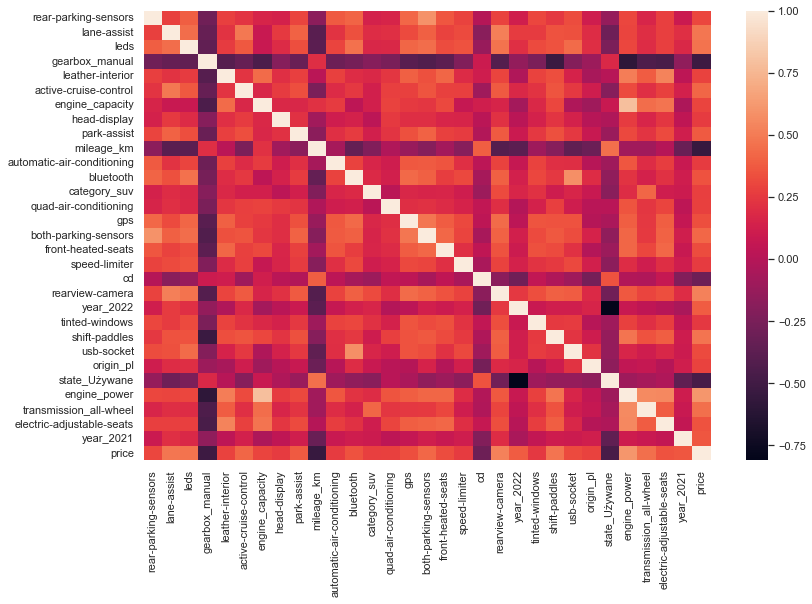

In [232]:
sns.heatmap(trainset_df.corr())

In [233]:
trainset_df.corr()["price"].sort_values(ascending=False)

price                         1.000000
engine_power                  0.610152
rearview-camera               0.520692
lane-assist                   0.482624
shift-paddles                 0.471106
leds                          0.464083
transmission_all-wheel        0.448472
both-parking-sensors          0.422234
active-cruise-control         0.413393
year_2022                     0.380098
park-assist                   0.372700
year_2021                     0.362779
bluetooth                     0.349315
electric-adjustable-seats     0.348790
gps                           0.333815
front-heated-seats            0.321710
usb-socket                    0.320913
rear-parking-sensors          0.305882
engine_capacity               0.296864
leather-interior              0.292063
origin_pl                     0.288717
quad-air-conditioning         0.279738
category_suv                  0.277023
speed-limiter                 0.262522
head-display                  0.259698
automatic-air-conditionin

<AxesSubplot:>

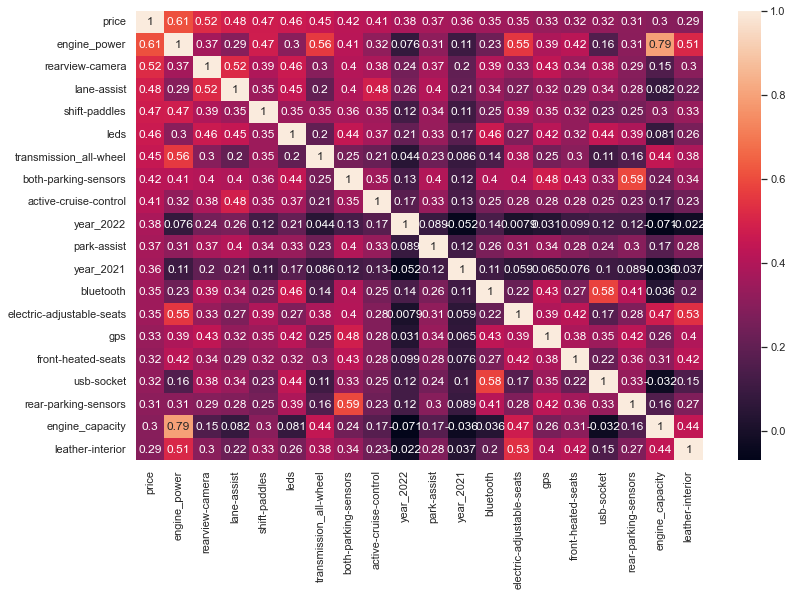

In [234]:
sns.heatmap(
    trainset_df[
        trainset_df.corr()["price"].sort_values(ascending=False)[:20].index
    ].corr(),
    annot=True,
)

#### Multilinearity (feature vs feature)

<AxesSubplot:>

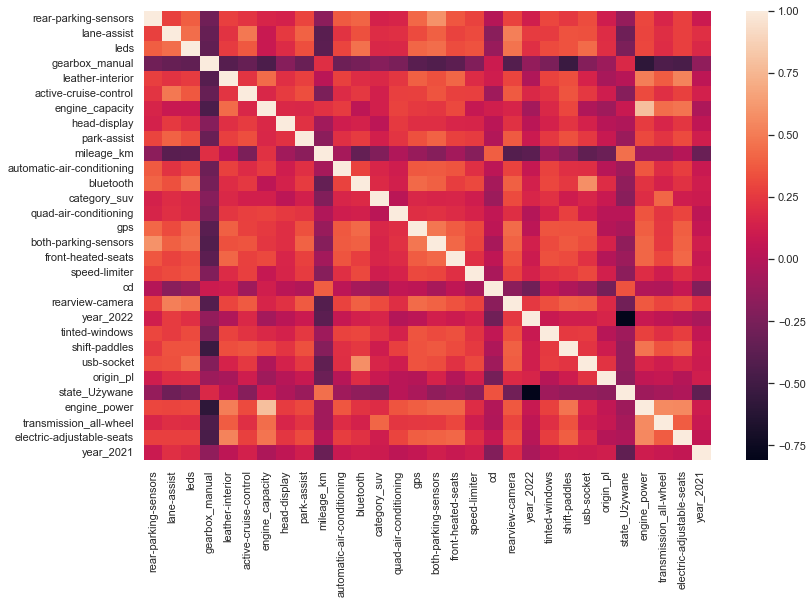

In [235]:
sns.heatmap(pd.DataFrame(X_train_reg, columns=X_train_vth.iloc[:, cols].columns).corr())

In [236]:
# Create correlation matrix
corr_matrix = (
    pd.DataFrame(X_train_reg, columns=X_train_vth.iloc[:, cols].columns).corr().abs()
)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop_upper = [column for column in upper.columns if any(upper[column] > 0.5)]
to_drop_lower = [column for column in upper.columns if any(upper[column] < -0.5)]

In [237]:
to_drop_upper

['both-parking-sensors',
 'rearview-camera',
 'shift-paddles',
 'usb-socket',
 'state_Używane',
 'engine_power',
 'transmission_all-wheel',
 'electric-adjustable-seats']

In [238]:
to_drop_lower

[]

In [239]:
to_drop = list(set(to_drop_upper).union(set(to_drop_lower)))

This column can be dropped

In [240]:
X_train_reg = pd.DataFrame(X_train_reg, columns=X_train_vth.iloc[:, cols].columns)
X_train_reg.drop(to_drop, axis=1, inplace=True)

In [241]:
X_test_reg = pd.DataFrame(X_test_reg, columns=X_train_vth.iloc[:, cols].columns)
X_test_reg.drop(to_drop, axis=1, inplace=True)

In [242]:
X_test_reg.shape

(19808, 22)

In [243]:
X_train_reg.shape

(79232, 22)

### Linear Regression after feature selection

In [244]:
X_train_reg = sm.add_constant(X_train_reg)
lr_mod_20_fs = sm.OLS(y_train, X_train_reg).fit()

In [245]:
print(lr_mod_20_fs.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     7199.
Date:                Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:24:58   Log-Likelihood:            -9.5737e+05
No. Observations:               79232   AIC:                         1.915e+06
Df Residuals:                   79209   BIC:                         1.915e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Linear Regression log(price) after feature selection

In [246]:
lr_log_mod_20_fs = sm.OLS(np.log(y_train), X_train_reg).fit()
print(lr_log_mod_20_fs.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:24:58   Log-Likelihood:                -48170.
No. Observations:               79232   AIC:                         9.639e+04
Df Residuals:                   79209   BIC:                         9.660e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### VIF

In [247]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_reg.columns

vif_data["VIF"] = [
    variance_inflation_factor(X_train_reg.values, i)
    for i in range(len(X_train_reg.columns))
]

In [248]:
vif_data.sort_values(by="VIF", ascending=False)

,feature,VIF
0,const,30.870863
10,mileage_km,1.890608
2,lane-assist,1.757714
3,leds,1.735713
4,gearbox_manual,1.717891
15,gps,1.711191
7,engine_capacity,1.685685
12,bluetooth,1.591294
5,leather-interior,1.573729
16,front-heated-seats,1.506157


### Feature extraction on original X_train, y_train

### PCA on numerical features

In [249]:
X_train.shape

(79232, 413)

In [250]:
categorical_featurs = list(set(X_train.columns) - set(numerical_features))

In [251]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the features

scaler = StandardScaler()
X_train_rescaled = scaler.fit_transform(X_train[numerical_features])

X_train_rescaled = pd.concat(
    [
        pd.DataFrame(X_train_rescaled, columns=X_train[numerical_features].columns),
        X_train.loc[:, ~X_train.columns.isin(numerical_features)],
    ],
    axis=1,
)

pca = PCA(n_components=0.99, random_state=42)
pca.fit(X_train_rescaled[numerical_features])
X_train_pca_reduced = pca.transform(X_train_rescaled[numerical_features])

np.cumsum(pca.explained_variance_ratio_)

array([0.60152222, 0.94971847, 1.        ])

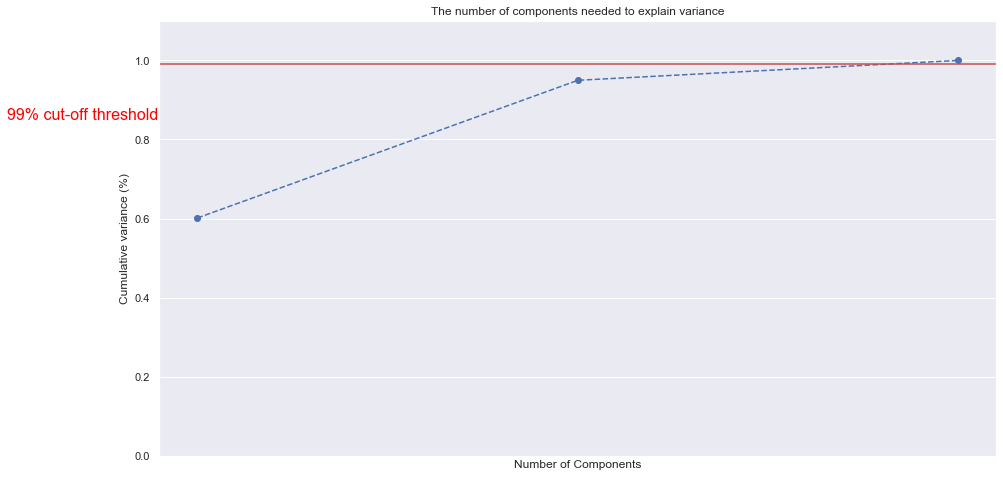

In [252]:
fig, ax = plt.subplots(figsize=(15, 8))

xi = np.arange(1, X_train_pca_reduced.shape[1] + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker="o", linestyle="--", color="b")

plt.xlabel("Number of Components")
plt.xticks(
    np.arange(0, X_train_pca_reduced.shape[1] + 1, step=200)
)  # change from 0-based array index to 1-based human-readable label
plt.ylabel("Cumulative variance (%)")
plt.title("The number of components needed to explain variance")

plt.axhline(y=0.99, color="r", linestyle="-")
plt.text(0.5, 0.85, "99% cut-off threshold", color="red", fontsize=16)
ax.grid(axis="x")
plt.show()

In [253]:
print(sum(np.cumsum(pca.explained_variance_ratio_) <= 0.99))
print(sum(np.cumsum(pca.explained_variance_ratio_) <= 0.95))
print(sum(np.cumsum(pca.explained_variance_ratio_) <= 0.9))

2
2
1


from plow above and summary I can conclude that:
* 2 principal components based on numerical features explain 99% information from all 3 features
* 2 principal components based on numerical features explain 95% information from all 3 features
* 1 principal components based on numerical features  explain 90% information from all 3 features


No action - will try to do feature extraction technique on categorical (one-hot-encoded features)

In [254]:
# # standardize X_test
# scaler = StandardScaler()
# X_test_rescaled = scaler.fit_transform(X_test[numerical_features])

# X_test_rescaled = pd.concat(
#     [
#         pd.DataFrame(X_test_rescaled, columns=X_test[numerical_features].columns),
#         X_test.loc[:, ~X_test.columns.isin(numerical_features)],
#     ],
#     axis=1,
# )
# X_test_rescaled = pca.transform(X_test_rescaled)
# X_test_rescaled.shape

In [255]:
# X_train_pca_reduced.shape

### PREDICTION Linear Regression

In [309]:
import math
from sklearn import metrics


def model_prediction(model, X_features, y_target):
    error_dict = {}
    y_hat = model.predict(X_features)
    mse = metrics.mean_squared_error(y_target, y_hat)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_target, y_hat)
    r2 = metrics.r2_score(y_target, y_hat)
    error_dict["Errors"] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}
    return error_dict


def log_model_prediction(model, X_features, y_target):
    error_dict = {}
    y_target = np.log(y_target)
    y_hat = np.exp(model.predict(X_features))
    mse = metrics.mean_squared_error(y_target, y_hat)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_target, y_hat)
    r2 = metrics.r2_score(y_target, y_hat)
    error_dict["Errors"] = {
       "MSE": math.exp(mse),
       "RMSE": math.exp(rmse),
       "MAE": math.exp(mae),
       'R2': r2
    }
    return error_dict
    return y_target

In [260]:
X_train['const'] = X_train_const

In [310]:
print(model_prediction(lr_mod_baseline, X_train, y_train))
#regression_results(y_train, y_train_pred)

{'Errors': {'MSE': 6.379711374719788e+17, 'RMSE': 798730954.3719829, 'MAE': 673275717.5602632, 'R2': -116135876.5578625}}


In [311]:
print(model_prediction(lr_mod_baseline, X_test, y_test))
#regression_results(y_train, y_train_pred)

{'Errors': {'MSE': 6.340343245296419e+17, 'RMSE': 796262723.3078551, 'MAE': 673957476.9544585, 'R2': -108780150.22690384}}


In [312]:
#X_train_reg['const'] = X_train_reg_const
print(model_prediction(lr_mod_20_fs, X_train_reg, y_train))

{'Errors': {'MSE': 1831432294.8384855, 'RMSE': 42795.23682418974, 'MAE': 25416.816936395237, 'R2': 0.6666071797672515}}


In [313]:
print(model_prediction(lr_log_mod_20_fs, X_train_reg, y_train))

{'Errors': {'MSE': 9895763431.544916, 'RMSE': 99477.45187500992, 'MAE': 66351.64946134356, 'R2': -0.8014187519226943}}


In [316]:
print(model_prediction(lr_log_mod_20_fs, X_test_reg, y_test))

{'Errors': {'MSE': 9570060427.071102, 'RMSE': 97826.68565923667, 'MAE': 58018.62984362537, 'R2': -0.6419183950012359}}


## Lasso Regression

In [266]:
X_train_reg.shape

(79232, 23)

In [273]:
X_train_reg.drop('const', axis=1, inplace=True)

In [277]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(
    lasso_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1
)
scores = np.abs(scores)
print("Mean RMSE: %.3f (%.3f)" % (np.mean(scores), np.std(scores)))

Mean RMSE: 29690.244 (887.810)


In [275]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# load the dataset

# define model
lasso_tunned_model = Lasso()
# define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
# define grid
grid = {'alpha': np.arange(0, 1, 0.1)}

# define search
search = GridSearchCV(lasso_tunned_model, grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

KeyboardInterrupt: 

In [276]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

# define model
lasso_tunned_model_reg = LassoCV(alphas=np.arange(0, 1, 0.01), cv=10, n_jobs=-1, max_iter=1000000)
# fit model
lasso_tunned_model_reg.fit(X_train_reg, y_train)
# summarize chosen configuration
print('alpha: %f' % lasso_tunned_model_reg.alpha_)

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.en

alpha: 0.990000


In [277]:
print('alpha: %f' % lasso_tunned_model_reg.alpha_)

alpha: 0.990000


In [278]:
lasso_tunned_model_reg.coef_

array([ 5.83709410e+03,  1.59478030e+03,  5.60044759e+03, -1.73312503e+04,
        1.51674008e+04,  1.69693370e+03,  3.16851176e+03,  8.18572639e+03,
       -1.57351732e+02,  4.85051757e+03, -2.34626388e-01,  2.32173976e+04,
        2.89238591e+01,  1.36781995e+04, -4.22275255e+03,  4.55433088e+02,
        2.69759723e+04,  7.10305907e+04,  6.24745775e+04, -1.12224625e+04,
        8.86990738e+03,  1.14331030e+04])

In [286]:
y_pred_train_lasso_tunned = lasso_tunned_model_reg.predict(X_train_reg)
y_pred_test_lasso_tunned = lasso_tunned_model_reg.predict(X_test_reg)

In [285]:
#error_train_lasso_tunned_dict = {}
mse = metrics.mean_squared_error(y_train, y_pred_train_lasso_tunned)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_train, y_pred_train_lasso_tunned)
r2 = metrics.r2_score(y_train, y_pred_train_lasso_tunned)
error_train_lasso_tunned_dict["Errors"] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}
error_train_lasso_tunned_dict

{'Errors': {'MSE': 1822491827.33801,
  'RMSE': 42690.652692808646,
  'MAE': 25299.158762345094,
  'R2': 0.6682346970293327}}

In [287]:
#error_train_lasso_tunned_dict = {}
mse = metrics.mean_squared_error(y_test, y_pred_test_lasso_tunned)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred_test_lasso_tunned)
r2 = metrics.r2_score(y_test, y_pred_test_lasso_tunned)
error_train_lasso_tunned_dict["Errors"] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}
error_train_lasso_tunned_dict

{'Errors': {'MSE': 1963650494.799185,
  'RMSE': 44313.096199647174,
  'MAE': 25592.144271224894,
  'R2': 0.6630999466164492}}

## Random Forest

In [202]:
otomoto_tree_original_df.shape

(99040, 18)

In [206]:
otomoto_tree_original_df.drop(['link', 'is_outlier'],axis=1,inplace=True)

KeyError: "['link'] not found in axis"

In [204]:
otomoto_df.shape

(99040, 75)

In [201]:
otomoto_tree_original_df.shape

(99040, 17)

In [208]:
otomoto_df.drop('is_outlier', axis=1, inplace=True)

### Categorical features - label encoder

In [ ]:
--------------------------------

In [202]:
otomoto_tree_original_df = otomoto_tree_original_df.explode('features')
otomoto_tree_original_df.shape

(2258475, 17)

In [203]:
cat_features_ls = otomoto_tree_original_df.select_dtypes('object').columns.to_list()

In [ ]:
-------------------------------

In [212]:
cat_features_ls = otomoto_df.select_dtypes('object').columns.to_list()

In [213]:
from sklearn.preprocessing import LabelEncoder

# Encode Categorical Columns
le = LabelEncoder()

df_encoded = otomoto_df[cat_features_ls].apply(
    lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')



In [216]:
otomoto_tree_original_df = pd.concat([otomoto_df.drop(cat_features_ls, axis=1),
                                      df_encoded], axis=1)
#otomoto_tree_original_df.drop('is_outlier', axis=1, inplace=True)

In [217]:
otomoto_tree_original_df

,mileage_km,engine_power,engine_capacity,price,active-cruise-control,adjustable-suspension,air-conditioning,alarm,alloy-wheels,asr,automatic-air-conditioning,automatic-lights,automatic-wipers,aux-in,auxiliary-heating,blind-spot-sensor,bluetooth,both-parking-sensors,cd,cd-changer,cruise-control,daytime-lights,driver-knee-airbag,dual-air-conditioning,dvd,electric-adjustable-seats,electric-exterior-mirror,electric-interior-mirror,fog-lights,front-heated-seats,front-side-airbags,gps,head-display,heated-rearview-mirrors,heated-windshield,isofix,lane-assist,leather-interior,leds,mp3,panoramic-sunroof,park-assist,quad-air-conditioning,radio,rear-electric-windows,rear-heated-seats,rear-parking-sensors,rear-passenger-airbags,rearview-camera,roof-bars,sd-socket,shift-paddles,side-window-airbags,speed-limiter,steering-whell-comands,sunroof,system-start-stop,tinted-windows,towing-hook,tv,usb-socket,velour-interior,xenon-lights,condition,state,year,fuel_type,make,model,category,origin,gearbox,transmission,private_business
0,103000.0,75.0,1500.0,7000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,14,0,5,141,7,0,1,2,0
1,136672.0,90.0,1500.0,34000.0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,19,0,5,81,2,25,1,2,0
2,138000.0,75.0,1100.0,15900.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,13,3,5,184,1,7,1,2,0
3,244000.0,87.0,1600.0,14900.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,11,3,5,185,1,0,1,2,1
4,120100.0,84.0,1600.0,19300.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,14,5,5,81,6,25,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99035,148000.0,120.0,1600.0,25500.0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,11,3,21,7,8,7,1,2,0
99036,2.0,75.0,1200.0,64800.0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,2,0,23,3,21,5,1,0,1,2,0
99037,181171.0,68.0,1400.0,7900.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,8,0,21,4,1,0,1,2,1
99038,154000.0,110.0,1600.0,5999.0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,2,1,8,3,21,8,2,7,1,2,0


### Train test split

In [218]:
X = otomoto_tree_original_df.drop('price', axis=1)
Y = otomoto_tree_original_df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [219]:
X_train.shape

(79232, 73)

In [220]:
X_test.shape

(19808, 73)

In [231]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


sel = SelectFromModel(RandomForestRegressor(n_estimators = 1000, oob_score=True, n_jobs=-1))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                                oob_score=True))

In [232]:
sel.get_support()


array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False])

In [233]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

6

In [234]:
selected_feat

Index(['mileage_km', 'engine_power', 'engine_capacity', 'condition', 'year', 'make'], dtype='object')

In [239]:
# transform training set
X_train_mbf = sel.transform(X_train)
print(f'X_train.shape: {X_train.shape}')

print(f'X_train_selected.shape: {X_train_mbf.shape}')

# transform test data
X_test_mbf = sel.transform(X_test)
print(f'X_test.shape: {X_test.shape}')
print(f'X_train_selected.shape: {X_test_mbf.shape}')

X_train.shape: (79232, 73)
X_train_selected.shape: (79232, 6)
X_test.shape: (19808, 73)
X_train_selected.shape: (19808, 6)


In [246]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]

# Number of features to consider at every split
#max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [20, 50, 100]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [20, 50, 100, 500]

# Minimum number of samples required at each leaf node

# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split
              }
print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_depth': [20, 50, 100, None], 'min_samples_split': [20, 50, 100, 500]}


In [247]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=5,
                               random_state=42,
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_mbf, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 3/3] END max_depth=20, min_samples_split=20, n_estimators=200;, score=0.925 total time=  23.7s
[CV 3/3] END max_depth=20, min_samples_split=20, n_estimators=1100;, score=0.925 total time= 2.4min
[CV 1/3] END max_depth=20, min_samples_split=20, n_estimators=200;, score=0.931 total time=  23.9s
[CV 1/3] END max_depth=20, min_samples_split=20, n_estimators=1550;, score=0.931 total time= 6.3min
[CV 2/3] END max_depth=20, min_samples_split=20, n_estimators=200;, score=0.922 total time=  24.0s
[CV 2/3] END max_depth=20, min_samples_split=20, n_estimators=1550;, score=0.923 total time= 6.3min
[CV 3/3] END max_depth=20, min_samples_split=20, n_estimators=650;, score=0.925 total time= 1.3min
[CV 3/3] END max_depth=20, min_samples_split=20, n_estimators=1550;, score=0.925 total time= 6.2min
[CV 1/3] END max_depth=20, min_samples_split=20, n_estimators=650;, score=0.931 total time= 1.4min
[CV 1/3] END max_depth=20, min_samples_split=20, n_estimators=2000;, score=0.931 total time= 7.2min
[CV 2

[CV 1/3] END max_depth=50, min_samples_split=50, n_estimators=1100;, score=0.922 total time= 2.3min
[CV 1/3] END max_depth=50, min_samples_split=100, n_estimators=200;, score=0.913 total time=  22.1s
[CV 3/3] END max_depth=50, min_samples_split=100, n_estimators=200;, score=0.905 total time=  22.1s
[CV 2/3] END max_depth=50, min_samples_split=100, n_estimators=650;, score=0.904 total time= 1.2min
[CV 2/3] END max_depth=50, min_samples_split=100, n_estimators=1100;, score=0.904 total time= 2.1min
[CV 1/3] END max_depth=50, min_samples_split=500, n_estimators=200;, score=0.864 total time=  17.2s
[CV 3/3] END max_depth=50, min_samples_split=500, n_estimators=200;, score=0.850 total time=  17.0s
[CV 2/3] END max_depth=50, min_samples_split=500, n_estimators=650;, score=0.849 total time=  55.8s
[CV 3/3] END max_depth=50, min_samples_split=500, n_estimators=1100;, score=0.849 total time= 1.6min
[CV 2/3] END max_depth=50, min_samples_split=500, n_estimators=2000;, score=0.849 total time= 3.5m

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [20, 50, 100, None],
                                        'min_samples_split': [20, 50, 100, 500],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=42, verbose=5)

In [248]:
rf_random.best_score_

0.9262950414887804

In [250]:
rf_random.best_params_

{'n_estimators': 200, 'min_samples_split': 20, 'max_depth': 50}

In [282]:
rf_random.best_estimator_.score(X_train_mbf, y_train)

0.9561445741533684

In [283]:
rf_random.best_estimator_.score(X_test_mbf, y_test)

0.9318574909864324

In [249]:
y_pred_train_rf = rf_random.predict(X_train_mbf)
y_pred_test_rf = rf_random.predict(X_test_mbf)

In [292]:
import sklearn.metrics as metrics

mse_train = metrics.mean_squared_error(y_train, y_pred_train_rf)
mae_train = metrics.mean_absolute_error(y_train, y_pred_train_rf)
rmse_train = np.sqrt(mse_train)

print(f"Training prediction results: \n MSE: {mse_train} \n MAE: {mae_train} \n RMSE: {rmse_train}")

Training prediction results: 
 MSE: 240911736.32156736 
 MAE: 7850.594814666306 
 RMSE: 15521.331654261092


In [293]:
import sklearn.metrics as metrics

mse_test = metrics.mean_squared_error(y_test, y_pred_test_rf)
mae_test = metrics.mean_absolute_error(y_test, y_pred_test_rf)
rmse_test = np.sqrt(mse_test)

print(f"testing prediction results: \n MSE: {mse_test} \n MAE: {mae_test} \n RMSE: {rmse_test}")

testing prediction results: 
 MSE: 397174385.095788 
 MAE: 9846.285628450087 
 RMSE: 19929.234433258796


mileage_km : 0.023
engine_power : 0.361
engine_capacity : 0.065
condition : 0.031
year : 0.493
make : 0.027



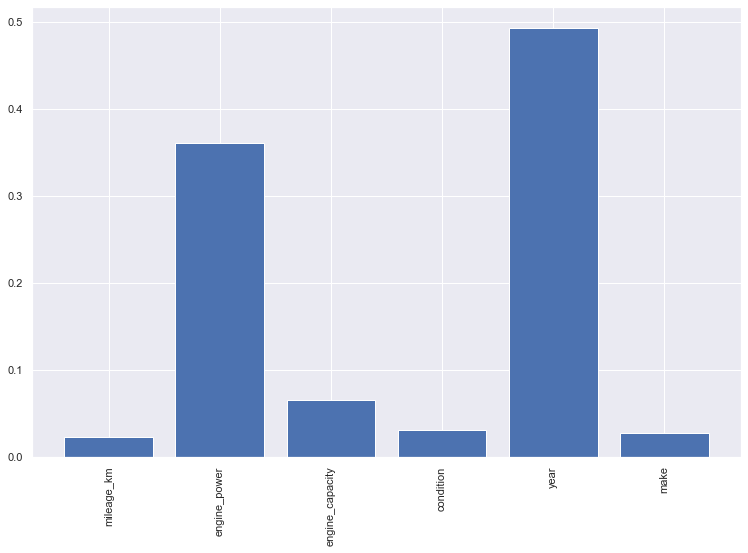

In [277]:
importances = rf_random.best_estimator_.feature_importances_
feature_names = [f'feature {i}' for i in range(X_test_mbf.shape[1])]

# what are scores for the features
for i in range(len(rf_random.best_estimator_.feature_importances_)):
    if rf_random.best_estimator_.feature_importances_[i] >0.001:
        print(f'{selected_feat[i]} : {round(rf_random.best_estimator_.feature_importances_[i],3)}')

print()

plt.bar([selected_feat[i] for i in range(len(rf_random.best_estimator_.feature_importances_))],
        rf_random.best_estimator_.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.show()

In [262]:
import joblib
# save
#joblib.dump(rf_random, "random_forest_model.joblib")

# load
#loaded_rf = joblib.load("my_random_forest.joblib")


['random_forest_model.joblib']

In [263]:
#loaded_rf = joblib.load("random_forest_model.joblib")


In [279]:
rf_random.best_params_

{'n_estimators': 200, 'min_samples_split': 20, 'max_depth': 50}

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

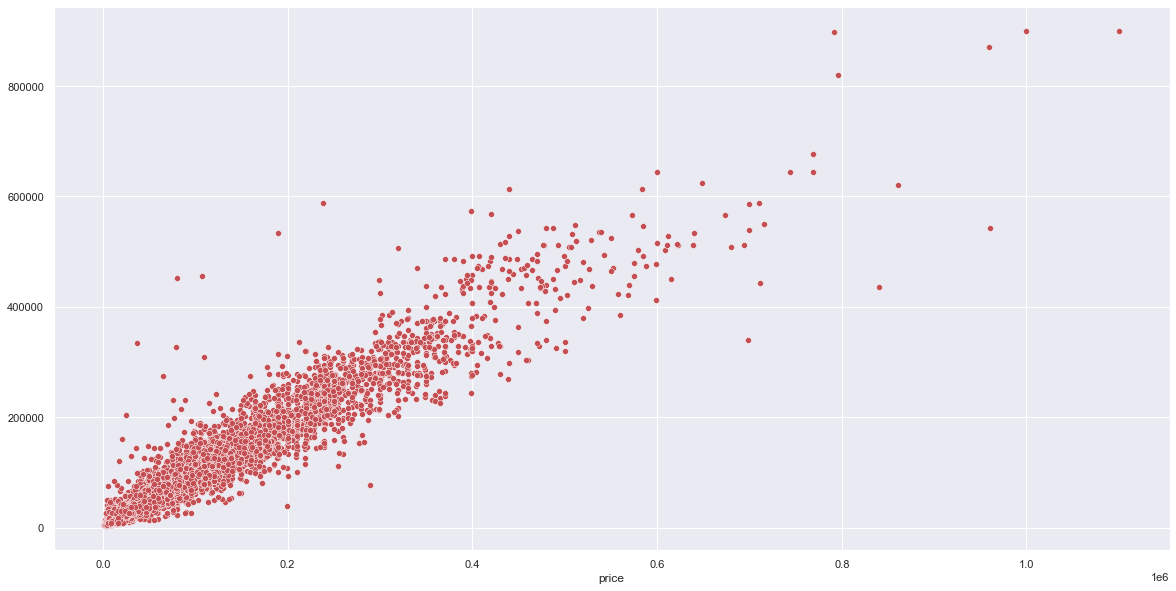

In [304]:
# Check for Linearity
f = plt.figure(figsize=(20, 10))
sns.scatterplot(y_test, y_pred_test_rf, color="r")
#sns.regplot(y_test, y_pred_test_rf, color='r')
ax.set_title("Actual Vs Predicted value")

In [281]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# Fit the random search model
#rf_random.fit(X_train_mbf, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [284]:
rf.score(X_train,y_train)

0.9932537363034162

In [285]:
rf.score(X_test,y_test)

0.9487629360456505

mileage_km : 0.018
engine_power : 0.339
engine_capacity : 0.051
adjustable-suspension : 0.001
both-parking-sensors : 0.001
head-display : 0.002
panoramic-sunroof : 0.001
quad-air-conditioning : 0.001
rear-heated-seats : 0.001
shift-paddles : 0.001
condition : 0.027
year : 0.465
fuel_type : 0.007
make : 0.016
model : 0.011
category : 0.008
origin : 0.003
gearbox : 0.01
transmission : 0.006
private_business : 0.001



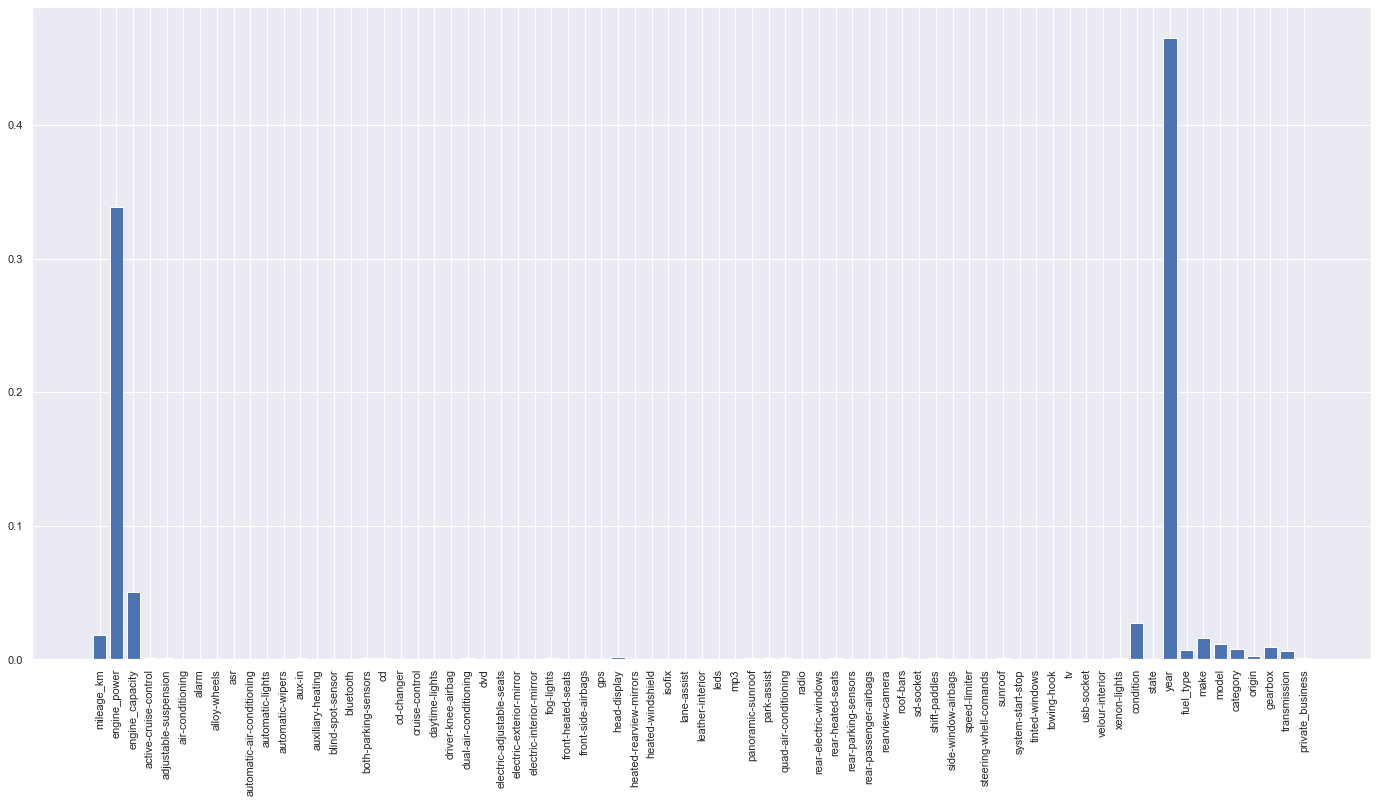

In [287]:
importances = rf.feature_importances_
feature_names = [f'feature {i}' for i in range(X_test_mbf.shape[1])]

# what are scores for the features
for i in range(len(rf.feature_importances_)):
    if rf.feature_importances_[i] >0.001:
        print(f'{X_train.columns[i]} : {round(rf.feature_importances_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(rf.feature_importances_))],
        rf.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.show()

In [289]:
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

In [290]:
import sklearn.metrics as metrics

mse_train = metrics.mean_squared_error(y_train, y_pred_rf_train)
mae_train = metrics.mean_absolute_error(y_train, y_pred_rf_train)
rmse_train = np.sqrt(mse_train)

print(f"Training prediction results: \n MSE: {mse_train} \n MAE: {mae_train} \n RMSE: {rmse_train}")

Training prediction results: 
 MSE: 37059361.97064641 
 MAE: 2872.725715326884 
 RMSE: 6087.640098646307


In [291]:
import sklearn.metrics as metrics

mse_test = metrics.mean_squared_error(y_test, y_pred_rf_test)
mae_test = metrics.mean_absolute_error(y_test, y_pred_rf_test)
rmse_test = np.sqrt(mse_test)

print(f"testing prediction results: \n MSE: {mse_test} \n MAE: {mae_test} \n RMSE: {rmse_test}")

testing prediction results: 
 MSE: 298639566.7663264 
 MAE: 7888.844089064405 
 RMSE: 17281.19112695437


model rf is overtfitted!

## Boosting models

In [316]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet

rmse_test =[]
r2_test =[]
model_names =[]

#numerical2= df2.drop(['price'], axis=1).select_dtypes('number').columns

#X= df2.drop('price', axis=1)
#y= df2['price']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#s = StandardScaler()
#p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]

for model in models:
    #ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')  
    #pipe = make_pipeline(ct, model)
    #pipe.fit(X_train, y_train)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(metrics.r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(metrics.r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : Ridge() and  rmse score is : 36802.48, r2 score is 0.77
model : Lasso() and  rmse score is : 36802.52, r2 score is 0.77
model : ElasticNet() and  rmse score is : 39839.83, r2 score is 0.73
model : KNeighborsRegressor() and  rmse score is : 38753.63, r2 score is 0.74


,RMSE,R2_Test
Ridge,36802.48,0.77
Lasso,36802.52,0.77
ElasticNet,39839.83,0.73
KNeighbors,38753.63,0.74


In [321]:
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor 

rmse_test =[]
r2_test =[]
model_names =[]

rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [rf,gb,et,xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(metrics.r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(metrics.r2_score(y_test, y_pred),4)}')

model_names = ['RandomForest','GradientBoost','ExtraTree','XGB']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : RandomForestRegressor(random_state=42) and  rmse score is : 17541.49, r2 score is 0.9472
model : GradientBoostingRegressor(random_state=42) and  rmse score is : 21269.66, r2 score is 0.9224
model : ExtraTreesRegressor(random_state=42) and  rmse score is : 18087.59, r2 score is 0.9439
model : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...) and  rmse

,RMSE,R2_Test
RandomForest,17541.49,0.95
GradientBoost,21269.66,0.92
ExtraTree,18087.59,0.94
XGB,16772.73,0.95


In [356]:
# XGBoost - sklearn method
from sklearn.model_selection import RandomizedSearchCV

train_X, val_X, train_y, val_y = train_test_split(X_train,
                                                  y_train,
                                                  random_state = 0,
                                                  test_size=0.1)

xgb_params = { 'max_depth': [3, 5, 10],
              'learning_rate': [0.01, 0.1, 0.2],
              'colsample_bytree': np.arange(0.4, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
              'n_estimators': [100, 500, 1000]}

fit_params={'early_stopping_rounds':20,
            'eval_set':[(train_X,train_y), (val_X, val_y)],
           }#'verbose':True}

xgb_model=XGBRegressor()
xbg_grid = RandomizedSearchCV(xgb_model,
                              xgb_params,
                              cv=2,
                              verbose=1)

xbg_grid.fit(X_train, y_train, **fit_params)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[0]	validation_0-rmse:90701.38263	validation_1-rmse:90001.49235
[1]	validation_0-rmse:82426.76460	validation_1-rmse:81697.65633


/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:74917.22615	validation_1-rmse:74100.84834
[3]	validation_0-rmse:68372.57323	validation_1-rmse:67441.59434
[4]	validation_0-rmse:62265.31768	validation_1-rmse:61278.95374
[5]	validation_0-rmse:56821.91555	validation_1-rmse:55774.92120
[6]	validation_0-rmse:51947.63711	validation_1-rmse:50870.83929
[7]	validation_0-rmse:47581.89011	validation_1-rmse:46419.11293
[8]	validation_0-rmse:43673.27294	validation_1-rmse:42511.27427
[9]	validation_0-rmse:40171.06433	validation_1-rmse:38997.70623
[10]	validation_0-rmse:37126.00906	validation_1-rmse:35911.39171
[11]	validation_0-rmse:34434.31488	validation_1-rmse:33242.80272
[12]	validation_0-rmse:31943.61144	validation_1-rmse:30754.97611
[13]	validation_0-rmse:29701.04770	validation_1-rmse:28515.06588
[14]	validation_0-rmse:27730.43156	validation_1-rmse:26490.61320
[15]	validation_0-rmse:26007.65161	validation_1-rmse:24788.89697
[16]	validation_0-rmse:24531.72304	validation_1-rmse:23298.98494
[17]	validation_0-rmse:23154.9232

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:75095.58232	validation_1-rmse:74172.04266
[3]	validation_0-rmse:68573.57692	validation_1-rmse:67531.40367
[4]	validation_0-rmse:62505.73779	validation_1-rmse:61432.66509
[5]	validation_0-rmse:57129.17816	validation_1-rmse:56020.61155
[6]	validation_0-rmse:52261.06918	validation_1-rmse:51097.01883
[7]	validation_0-rmse:47937.76742	validation_1-rmse:46775.28632
[8]	validation_0-rmse:44045.72817	validation_1-rmse:42851.14265
[9]	validation_0-rmse:40546.33403	validation_1-rmse:39318.12027
[10]	validation_0-rmse:37507.42645	validation_1-rmse:36288.47980
[11]	validation_0-rmse:34837.43782	validation_1-rmse:33584.09857
[12]	validation_0-rmse:32350.69497	validation_1-rmse:30993.58733
[13]	validation_0-rmse:30142.33373	validation_1-rmse:28804.85061
[14]	validation_0-rmse:28164.10127	validation_1-rmse:26825.89880
[15]	validation_0-rmse:26405.41582	validation_1-rmse:25066.43075
[16]	validation_0-rmse:24936.06158	validation_1-rmse:23609.96820
[17]	validation_0-rmse:23553.6883

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:93917.18713	validation_1-rmse:93225.01045
[7]	validation_0-rmse:93125.99165	validation_1-rmse:92432.63500
[8]	validation_0-rmse:92348.75014	validation_1-rmse:91652.53423
[9]	validation_0-rmse:91578.74481	validation_1-rmse:90881.93371
[10]	validation_0-rmse:90846.58700	validation_1-rmse:90143.43787
[11]	validation_0-rmse:90119.32173	validation_1-rmse:89416.94863
[12]	validation_0-rmse:89400.78301	validation_1-rmse:88682.39253
[13]	validation_0-rmse:88654.65825	validation_1-rmse:87927.01281
[14]	validation_0-rmse:87928.29167	validation_1-rmse:87188.37601
[15]	validation_0-rmse:87204.19327	validation_1-rmse:86467.07873
[16]	validation_0-rmse:86523.69858	validation_1-rmse:85782.38568
[17]	validation_0-rmse:85850.11852	validation_1-rmse:85091.36465
[18]	validation_0-rmse:85148.31598	validation_1-rmse:84379.81130
[19]	validation_0-rmse:84459.30112	validation_1-rmse:83695.95434
[20]	validation_0-rmse:83776.07792	validation_1-rmse:83002.06590
[21]	validation_0-rmse:83158.

[132]	validation_0-rmse:40733.58898	validation_1-rmse:39250.09317
[133]	validation_0-rmse:40539.96288	validation_1-rmse:39048.84862
[134]	validation_0-rmse:40351.29934	validation_1-rmse:38857.21574
[135]	validation_0-rmse:40168.41667	validation_1-rmse:38669.42299
[136]	validation_0-rmse:39980.45074	validation_1-rmse:38470.85397
[137]	validation_0-rmse:39807.06075	validation_1-rmse:38295.83753
[138]	validation_0-rmse:39626.87818	validation_1-rmse:38110.59033
[139]	validation_0-rmse:39452.91371	validation_1-rmse:37931.45925
[140]	validation_0-rmse:39290.49438	validation_1-rmse:37765.11978
[141]	validation_0-rmse:39123.47327	validation_1-rmse:37592.56291
[142]	validation_0-rmse:38945.47593	validation_1-rmse:37409.12515
[143]	validation_0-rmse:38770.09497	validation_1-rmse:37235.21986
[144]	validation_0-rmse:38599.21785	validation_1-rmse:37062.25128
[145]	validation_0-rmse:38437.74115	validation_1-rmse:36896.93582
[146]	validation_0-rmse:38280.95349	validation_1-rmse:36738.11202
[147]	vali

[257]	validation_0-rmse:28046.45340	validation_1-rmse:26424.55756
[258]	validation_0-rmse:28000.37762	validation_1-rmse:26378.36760
[259]	validation_0-rmse:27958.37893	validation_1-rmse:26335.42353
[260]	validation_0-rmse:27911.30600	validation_1-rmse:26291.03519
[261]	validation_0-rmse:27867.94162	validation_1-rmse:26250.38900
[262]	validation_0-rmse:27826.92125	validation_1-rmse:26206.49294
[263]	validation_0-rmse:27778.61880	validation_1-rmse:26163.29385
[264]	validation_0-rmse:27732.99242	validation_1-rmse:26119.72445
[265]	validation_0-rmse:27690.16317	validation_1-rmse:26076.16573
[266]	validation_0-rmse:27643.41525	validation_1-rmse:26034.02164
[267]	validation_0-rmse:27601.45459	validation_1-rmse:25993.80084
[268]	validation_0-rmse:27563.71770	validation_1-rmse:25955.64780
[269]	validation_0-rmse:27520.15908	validation_1-rmse:25914.25134
[270]	validation_0-rmse:27474.68489	validation_1-rmse:25870.46915
[271]	validation_0-rmse:27430.32562	validation_1-rmse:25827.92295
[272]	vali

[382]	validation_0-rmse:24504.74763	validation_1-rmse:23005.26015
[383]	validation_0-rmse:24489.83369	validation_1-rmse:22989.06043
[384]	validation_0-rmse:24467.06044	validation_1-rmse:22967.98927
[385]	validation_0-rmse:24451.79374	validation_1-rmse:22953.77247
[386]	validation_0-rmse:24432.93509	validation_1-rmse:22937.33013
[387]	validation_0-rmse:24418.03574	validation_1-rmse:22924.04421
[388]	validation_0-rmse:24398.46860	validation_1-rmse:22905.76670
[389]	validation_0-rmse:24384.40291	validation_1-rmse:22890.00375
[390]	validation_0-rmse:24367.40552	validation_1-rmse:22874.60502
[391]	validation_0-rmse:24353.49414	validation_1-rmse:22860.51942
[392]	validation_0-rmse:24338.84421	validation_1-rmse:22846.35043
[393]	validation_0-rmse:24318.76660	validation_1-rmse:22829.31011
[394]	validation_0-rmse:24306.12385	validation_1-rmse:22816.67825
[395]	validation_0-rmse:24291.67266	validation_1-rmse:22803.81766
[396]	validation_0-rmse:24278.03354	validation_1-rmse:22792.17905
[397]	vali

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:93955.10664	validation_1-rmse:93298.26256
[7]	validation_0-rmse:93171.68776	validation_1-rmse:92513.23684
[8]	validation_0-rmse:92402.06744	validation_1-rmse:91739.90535
[9]	validation_0-rmse:91636.27609	validation_1-rmse:90972.42775
[10]	validation_0-rmse:90904.26409	validation_1-rmse:90243.42696
[11]	validation_0-rmse:90177.74555	validation_1-rmse:89518.76844
[12]	validation_0-rmse:89461.95778	validation_1-rmse:88806.39234
[13]	validation_0-rmse:88729.10865	validation_1-rmse:88077.97803
[14]	validation_0-rmse:88018.31285	validation_1-rmse:87358.56352
[15]	validation_0-rmse:87299.86741	validation_1-rmse:86638.81198
[16]	validation_0-rmse:86621.54226	validation_1-rmse:85952.73298
[17]	validation_0-rmse:85953.09992	validation_1-rmse:85272.24035
[18]	validation_0-rmse:85260.29311	validation_1-rmse:84571.97247
[19]	validation_0-rmse:84584.41549	validation_1-rmse:83907.58789
[20]	validation_0-rmse:83904.84341	validation_1-rmse:83234.92013
[21]	validation_0-rmse:83291.

[132]	validation_0-rmse:41068.66327	validation_1-rmse:39805.73811
[133]	validation_0-rmse:40867.14012	validation_1-rmse:39596.30379
[134]	validation_0-rmse:40678.85631	validation_1-rmse:39401.91981
[135]	validation_0-rmse:40493.85248	validation_1-rmse:39213.25262
[136]	validation_0-rmse:40305.62212	validation_1-rmse:39020.84290
[137]	validation_0-rmse:40133.05536	validation_1-rmse:38843.89556
[138]	validation_0-rmse:39947.81469	validation_1-rmse:38657.17305
[139]	validation_0-rmse:39778.67242	validation_1-rmse:38488.77795
[140]	validation_0-rmse:39600.22517	validation_1-rmse:38306.62629
[141]	validation_0-rmse:39436.00127	validation_1-rmse:38143.37171
[142]	validation_0-rmse:39260.88882	validation_1-rmse:37964.84555
[143]	validation_0-rmse:39090.27298	validation_1-rmse:37793.28564
[144]	validation_0-rmse:38923.02105	validation_1-rmse:37620.41725
[145]	validation_0-rmse:38757.15713	validation_1-rmse:37449.90523
[146]	validation_0-rmse:38600.84314	validation_1-rmse:37291.45156
[147]	vali

[257]	validation_0-rmse:28155.66144	validation_1-rmse:26662.23788
[258]	validation_0-rmse:28109.35204	validation_1-rmse:26616.49594
[259]	validation_0-rmse:28059.15897	validation_1-rmse:26566.68133
[260]	validation_0-rmse:28010.94395	validation_1-rmse:26523.12231
[261]	validation_0-rmse:27966.25001	validation_1-rmse:26478.54910
[262]	validation_0-rmse:27921.69102	validation_1-rmse:26433.86907
[263]	validation_0-rmse:27881.74598	validation_1-rmse:26394.79071
[264]	validation_0-rmse:27835.93637	validation_1-rmse:26353.60280
[265]	validation_0-rmse:27790.62811	validation_1-rmse:26307.69925
[266]	validation_0-rmse:27744.93417	validation_1-rmse:26267.47274
[267]	validation_0-rmse:27702.53623	validation_1-rmse:26220.51730
[268]	validation_0-rmse:27658.72182	validation_1-rmse:26179.39121
[269]	validation_0-rmse:27615.46723	validation_1-rmse:26133.41485
[270]	validation_0-rmse:27575.18351	validation_1-rmse:26093.72735
[271]	validation_0-rmse:27537.86459	validation_1-rmse:26055.42887
[272]	vali

[382]	validation_0-rmse:24510.61234	validation_1-rmse:23161.97007
[383]	validation_0-rmse:24494.94013	validation_1-rmse:23146.82502
[384]	validation_0-rmse:24471.78977	validation_1-rmse:23130.04961
[385]	validation_0-rmse:24451.76419	validation_1-rmse:23112.52060
[386]	validation_0-rmse:24436.75324	validation_1-rmse:23096.64020
[387]	validation_0-rmse:24423.63465	validation_1-rmse:23086.46596
[388]	validation_0-rmse:24406.50919	validation_1-rmse:23068.28460
[389]	validation_0-rmse:24391.90063	validation_1-rmse:23054.43355
[390]	validation_0-rmse:24371.80586	validation_1-rmse:23038.96228
[391]	validation_0-rmse:24351.78423	validation_1-rmse:23020.60418
[392]	validation_0-rmse:24338.23635	validation_1-rmse:23009.87866
[393]	validation_0-rmse:24320.68029	validation_1-rmse:22993.79182
[394]	validation_0-rmse:24301.69129	validation_1-rmse:22978.44997
[395]	validation_0-rmse:24285.29406	validation_1-rmse:22962.70267
[396]	validation_0-rmse:24265.04285	validation_1-rmse:22943.30712
[397]	vali

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:96105.96369	validation_1-rmse:95421.66825
[4]	validation_0-rmse:95215.75867	validation_1-rmse:94525.61972
[5]	validation_0-rmse:94341.33110	validation_1-rmse:93640.23645
[6]	validation_0-rmse:93515.23639	validation_1-rmse:92815.19990
[7]	validation_0-rmse:92649.75657	validation_1-rmse:91941.35711
[8]	validation_0-rmse:91836.61832	validation_1-rmse:91122.42738
[9]	validation_0-rmse:90983.08490	validation_1-rmse:90260.86613
[10]	validation_0-rmse:90206.63200	validation_1-rmse:89485.16086
[11]	validation_0-rmse:89450.65829	validation_1-rmse:88722.12125
[12]	validation_0-rmse:88628.12671	validation_1-rmse:87902.60713
[13]	validation_0-rmse:87820.15006	validation_1-rmse:87086.04930
[14]	validation_0-rmse:87064.44837	validation_1-rmse:86319.26181
[15]	validation_0-rmse:86266.66104	validation_1-rmse:85515.67470
[16]	validation_0-rmse:85489.01134	validation_1-rmse:84730.52073
[17]	validation_0-rmse:84703.33641	validation_1-rmse:83933.38322
[18]	validation_0-rmse:83929.982

[129]	validation_0-rmse:33762.55472	validation_1-rmse:32621.95521
[130]	validation_0-rmse:33515.17399	validation_1-rmse:32376.88231
[131]	validation_0-rmse:33288.60267	validation_1-rmse:32154.72912
[132]	validation_0-rmse:33057.47012	validation_1-rmse:31920.05720
[133]	validation_0-rmse:32841.21296	validation_1-rmse:31700.43849
[134]	validation_0-rmse:32617.58215	validation_1-rmse:31473.77919
[135]	validation_0-rmse:32381.52677	validation_1-rmse:31236.41034
[136]	validation_0-rmse:32166.61777	validation_1-rmse:31020.25239
[137]	validation_0-rmse:31953.17180	validation_1-rmse:30810.80852
[138]	validation_0-rmse:31745.44645	validation_1-rmse:30596.63936
[139]	validation_0-rmse:31543.85699	validation_1-rmse:30397.28410
[140]	validation_0-rmse:31319.86047	validation_1-rmse:30167.70356
[141]	validation_0-rmse:31104.28035	validation_1-rmse:29952.47934
[142]	validation_0-rmse:30886.41095	validation_1-rmse:29732.39177
[143]	validation_0-rmse:30673.23250	validation_1-rmse:29519.80495
[144]	vali

[254]	validation_0-rmse:17725.92827	validation_1-rmse:16673.84506
[255]	validation_0-rmse:17675.37578	validation_1-rmse:16632.69419
[256]	validation_0-rmse:17623.83238	validation_1-rmse:16581.17475
[257]	validation_0-rmse:17581.36763	validation_1-rmse:16539.11280
[258]	validation_0-rmse:17526.99117	validation_1-rmse:16486.68943
[259]	validation_0-rmse:17472.19675	validation_1-rmse:16437.06990
[260]	validation_0-rmse:17423.20960	validation_1-rmse:16388.29701
[261]	validation_0-rmse:17369.79204	validation_1-rmse:16337.71343
[262]	validation_0-rmse:17318.58005	validation_1-rmse:16285.14633
[263]	validation_0-rmse:17269.96445	validation_1-rmse:16236.47068
[264]	validation_0-rmse:17217.73754	validation_1-rmse:16187.68822
[265]	validation_0-rmse:17174.54522	validation_1-rmse:16147.27492
[266]	validation_0-rmse:17122.17632	validation_1-rmse:16095.19291
[267]	validation_0-rmse:17070.87474	validation_1-rmse:16044.03688
[268]	validation_0-rmse:17023.15582	validation_1-rmse:15996.11770
[269]	vali

[379]	validation_0-rmse:14090.05631	validation_1-rmse:13242.93591
[380]	validation_0-rmse:14077.41767	validation_1-rmse:13229.95603
[381]	validation_0-rmse:14063.29764	validation_1-rmse:13215.43570
[382]	validation_0-rmse:14051.32778	validation_1-rmse:13208.07736
[383]	validation_0-rmse:14037.86373	validation_1-rmse:13196.63719
[384]	validation_0-rmse:14024.37660	validation_1-rmse:13185.94665
[385]	validation_0-rmse:14010.99945	validation_1-rmse:13173.38275
[386]	validation_0-rmse:14000.43249	validation_1-rmse:13165.41640
[387]	validation_0-rmse:13988.36776	validation_1-rmse:13152.75905
[388]	validation_0-rmse:13972.82753	validation_1-rmse:13138.92218
[389]	validation_0-rmse:13956.65405	validation_1-rmse:13126.88063
[390]	validation_0-rmse:13942.18703	validation_1-rmse:13109.86617
[391]	validation_0-rmse:13927.58348	validation_1-rmse:13095.58330
[392]	validation_0-rmse:13916.89597	validation_1-rmse:13088.18621
[393]	validation_0-rmse:13907.15060	validation_1-rmse:13078.20886
[394]	vali

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:96133.01582	validation_1-rmse:95439.55680
[4]	validation_0-rmse:95251.00629	validation_1-rmse:94552.73552
[5]	validation_0-rmse:94381.37242	validation_1-rmse:93678.65392
[6]	validation_0-rmse:93555.06743	validation_1-rmse:92862.04819
[7]	validation_0-rmse:92699.97303	validation_1-rmse:92005.86576
[8]	validation_0-rmse:91891.07999	validation_1-rmse:91192.64460
[9]	validation_0-rmse:91043.40103	validation_1-rmse:90339.95677
[10]	validation_0-rmse:90267.83757	validation_1-rmse:89556.96338
[11]	validation_0-rmse:89515.01295	validation_1-rmse:88795.61231
[12]	validation_0-rmse:88697.05037	validation_1-rmse:87988.05350
[13]	validation_0-rmse:87889.22047	validation_1-rmse:87174.58924
[14]	validation_0-rmse:87142.37467	validation_1-rmse:86414.67208
[15]	validation_0-rmse:86347.47946	validation_1-rmse:85625.18592
[16]	validation_0-rmse:85571.46294	validation_1-rmse:84841.48868
[17]	validation_0-rmse:84789.45905	validation_1-rmse:84051.91876
[18]	validation_0-rmse:84018.065

[129]	validation_0-rmse:34062.43809	validation_1-rmse:32895.13350
[130]	validation_0-rmse:33817.38269	validation_1-rmse:32644.37183
[131]	validation_0-rmse:33590.18401	validation_1-rmse:32413.31428
[132]	validation_0-rmse:33355.61701	validation_1-rmse:32182.61732
[133]	validation_0-rmse:33138.67389	validation_1-rmse:31964.78190
[134]	validation_0-rmse:32913.98591	validation_1-rmse:31741.85283
[135]	validation_0-rmse:32680.83296	validation_1-rmse:31504.53620
[136]	validation_0-rmse:32463.92263	validation_1-rmse:31286.75320
[137]	validation_0-rmse:32251.52793	validation_1-rmse:31071.53160
[138]	validation_0-rmse:32043.77600	validation_1-rmse:30862.71802
[139]	validation_0-rmse:31844.12849	validation_1-rmse:30657.97435
[140]	validation_0-rmse:31619.47205	validation_1-rmse:30433.10552
[141]	validation_0-rmse:31407.00572	validation_1-rmse:30220.32416
[142]	validation_0-rmse:31190.93086	validation_1-rmse:29999.75866
[143]	validation_0-rmse:30978.36629	validation_1-rmse:29786.18388
[144]	vali

[254]	validation_0-rmse:17964.99800	validation_1-rmse:16945.93277
[255]	validation_0-rmse:17913.08578	validation_1-rmse:16896.98008
[256]	validation_0-rmse:17860.57177	validation_1-rmse:16844.94951
[257]	validation_0-rmse:17816.84002	validation_1-rmse:16801.65808
[258]	validation_0-rmse:17762.20952	validation_1-rmse:16750.78258
[259]	validation_0-rmse:17705.42563	validation_1-rmse:16697.47250
[260]	validation_0-rmse:17653.48590	validation_1-rmse:16653.86127
[261]	validation_0-rmse:17599.06691	validation_1-rmse:16603.20043
[262]	validation_0-rmse:17548.37046	validation_1-rmse:16553.41492
[263]	validation_0-rmse:17497.78364	validation_1-rmse:16508.22655
[264]	validation_0-rmse:17446.81153	validation_1-rmse:16455.22778
[265]	validation_0-rmse:17403.53372	validation_1-rmse:16415.96395
[266]	validation_0-rmse:17349.72833	validation_1-rmse:16369.73926
[267]	validation_0-rmse:17296.02235	validation_1-rmse:16320.49762
[268]	validation_0-rmse:17245.66503	validation_1-rmse:16277.66376
[269]	vali

[379]	validation_0-rmse:14193.12096	validation_1-rmse:13622.12785
[380]	validation_0-rmse:14179.75426	validation_1-rmse:13612.39547
[381]	validation_0-rmse:14163.17229	validation_1-rmse:13599.82094
[382]	validation_0-rmse:14151.25836	validation_1-rmse:13590.90141
[383]	validation_0-rmse:14139.06839	validation_1-rmse:13582.22572
[384]	validation_0-rmse:14124.12663	validation_1-rmse:13573.64446
[385]	validation_0-rmse:14109.65741	validation_1-rmse:13562.78317
[386]	validation_0-rmse:14098.12883	validation_1-rmse:13555.47317
[387]	validation_0-rmse:14084.86676	validation_1-rmse:13543.79934
[388]	validation_0-rmse:14067.48933	validation_1-rmse:13526.66617
[389]	validation_0-rmse:14052.95223	validation_1-rmse:13512.96146
[390]	validation_0-rmse:14037.79006	validation_1-rmse:13501.39527
[391]	validation_0-rmse:14024.96935	validation_1-rmse:13490.82217
[392]	validation_0-rmse:14013.40997	validation_1-rmse:13481.66157
[393]	validation_0-rmse:14003.17602	validation_1-rmse:13476.61594
[394]	vali

[4]	validation_0-rmse:46757.31067	validation_1-rmse:45242.13881
[5]	validation_0-rmse:42359.60428	validation_1-rmse:40761.94017
[6]	validation_0-rmse:38922.04266	validation_1-rmse:37275.88278


/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:35533.79829	validation_1-rmse:33811.91120
[8]	validation_0-rmse:33282.25776	validation_1-rmse:31555.55215
[9]	validation_0-rmse:31461.48521	validation_1-rmse:29795.06013
[10]	validation_0-rmse:29924.31781	validation_1-rmse:28316.96658
[11]	validation_0-rmse:28980.87509	validation_1-rmse:27315.20904
[12]	validation_0-rmse:28209.46877	validation_1-rmse:26474.80085
[13]	validation_0-rmse:27553.72305	validation_1-rmse:25818.26245
[14]	validation_0-rmse:26932.00710	validation_1-rmse:25235.76006
[15]	validation_0-rmse:26390.54068	validation_1-rmse:24660.39066
[16]	validation_0-rmse:25963.79952	validation_1-rmse:24289.15402
[17]	validation_0-rmse:25698.53626	validation_1-rmse:24007.21623
[18]	validation_0-rmse:25316.78135	validation_1-rmse:23678.56951
[19]	validation_0-rmse:25028.96113	validation_1-rmse:23382.53056
[20]	validation_0-rmse:24773.74550	validation_1-rmse:23203.71999
[21]	validation_0-rmse:24575.39241	validation_1-rmse:22997.72253
[22]	validation_0-rmse:24387

[133]	validation_0-rmse:19269.42443	validation_1-rmse:18169.82835
[134]	validation_0-rmse:19258.42783	validation_1-rmse:18159.32377
[135]	validation_0-rmse:19228.82193	validation_1-rmse:18117.23663
[136]	validation_0-rmse:19211.53555	validation_1-rmse:18104.26657
[137]	validation_0-rmse:19182.83505	validation_1-rmse:18086.76805
[138]	validation_0-rmse:19168.98147	validation_1-rmse:18076.95680
[139]	validation_0-rmse:19149.46511	validation_1-rmse:18065.78020
[140]	validation_0-rmse:19135.07223	validation_1-rmse:18061.69956
[141]	validation_0-rmse:19123.17567	validation_1-rmse:18050.34671
[142]	validation_0-rmse:19113.45771	validation_1-rmse:18036.84220
[143]	validation_0-rmse:19072.82981	validation_1-rmse:17993.58189
[144]	validation_0-rmse:19060.85596	validation_1-rmse:17987.50259
[145]	validation_0-rmse:19057.11440	validation_1-rmse:17981.26398
[146]	validation_0-rmse:19041.76356	validation_1-rmse:17969.63798
[147]	validation_0-rmse:19014.37392	validation_1-rmse:17934.15362
[148]	vali

[258]	validation_0-rmse:17508.91009	validation_1-rmse:16453.98708
[259]	validation_0-rmse:17498.97531	validation_1-rmse:16436.74525
[260]	validation_0-rmse:17495.09357	validation_1-rmse:16433.49478
[261]	validation_0-rmse:17483.32048	validation_1-rmse:16428.87302
[262]	validation_0-rmse:17475.16124	validation_1-rmse:16425.21363
[263]	validation_0-rmse:17461.74792	validation_1-rmse:16406.16104
[264]	validation_0-rmse:17449.72989	validation_1-rmse:16396.23514
[265]	validation_0-rmse:17441.56122	validation_1-rmse:16378.77261
[266]	validation_0-rmse:17439.56830	validation_1-rmse:16377.11209
[267]	validation_0-rmse:17438.75646	validation_1-rmse:16380.62386
[268]	validation_0-rmse:17436.37051	validation_1-rmse:16374.33151
[269]	validation_0-rmse:17429.10930	validation_1-rmse:16369.75635
[270]	validation_0-rmse:17427.21221	validation_1-rmse:16367.28485
[271]	validation_0-rmse:17418.77200	validation_1-rmse:16354.47476
[272]	validation_0-rmse:17403.01230	validation_1-rmse:16336.09211
[273]	vali

[383]	validation_0-rmse:16531.52257	validation_1-rmse:15438.77789
[384]	validation_0-rmse:16527.47156	validation_1-rmse:15439.55820
[385]	validation_0-rmse:16522.12741	validation_1-rmse:15437.86635
[386]	validation_0-rmse:16511.81850	validation_1-rmse:15424.06516
[387]	validation_0-rmse:16509.49497	validation_1-rmse:15425.11708
[388]	validation_0-rmse:16504.07782	validation_1-rmse:15420.70750
[389]	validation_0-rmse:16493.91845	validation_1-rmse:15412.03493
[390]	validation_0-rmse:16490.44748	validation_1-rmse:15405.47308
[391]	validation_0-rmse:16484.32808	validation_1-rmse:15395.28784
[392]	validation_0-rmse:16482.89911	validation_1-rmse:15395.14535
[393]	validation_0-rmse:16480.15170	validation_1-rmse:15390.31037
[394]	validation_0-rmse:16474.58415	validation_1-rmse:15388.13640
[395]	validation_0-rmse:16468.67840	validation_1-rmse:15375.86382
[396]	validation_0-rmse:16461.52419	validation_1-rmse:15374.77842
[397]	validation_0-rmse:16457.71831	validation_1-rmse:15375.56037
[398]	vali

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:35691.14381	validation_1-rmse:34191.11800
[8]	validation_0-rmse:33473.22023	validation_1-rmse:31930.86468
[9]	validation_0-rmse:31569.02676	validation_1-rmse:30074.96821
[10]	validation_0-rmse:30051.17296	validation_1-rmse:28566.22608
[11]	validation_0-rmse:29006.52453	validation_1-rmse:27385.97733
[12]	validation_0-rmse:28086.30756	validation_1-rmse:26505.15617
[13]	validation_0-rmse:27285.50571	validation_1-rmse:25742.67671
[14]	validation_0-rmse:26673.77625	validation_1-rmse:25104.62415
[15]	validation_0-rmse:26180.73568	validation_1-rmse:24581.61960
[16]	validation_0-rmse:25676.58616	validation_1-rmse:24129.34695
[17]	validation_0-rmse:25399.76711	validation_1-rmse:23930.57105
[18]	validation_0-rmse:25010.41740	validation_1-rmse:23704.39176
[19]	validation_0-rmse:24615.36169	validation_1-rmse:23321.40978
[20]	validation_0-rmse:24359.82775	validation_1-rmse:23072.66757
[21]	validation_0-rmse:24178.48486	validation_1-rmse:22908.48675
[22]	validation_0-rmse:23897

[133]	validation_0-rmse:18850.81150	validation_1-rmse:19424.86630
[134]	validation_0-rmse:18824.02059	validation_1-rmse:19391.44471
[135]	validation_0-rmse:18818.40421	validation_1-rmse:19390.18068
[136]	validation_0-rmse:18798.09504	validation_1-rmse:19377.50849
[137]	validation_0-rmse:18783.95779	validation_1-rmse:19368.12942
[138]	validation_0-rmse:18765.29138	validation_1-rmse:19358.96202
[139]	validation_0-rmse:18746.87044	validation_1-rmse:19329.74647
[140]	validation_0-rmse:18675.96084	validation_1-rmse:19283.84871
[141]	validation_0-rmse:18656.49594	validation_1-rmse:19273.88712
[142]	validation_0-rmse:18650.16978	validation_1-rmse:19267.54914
[143]	validation_0-rmse:18644.97745	validation_1-rmse:19262.53680
[144]	validation_0-rmse:18628.34496	validation_1-rmse:19256.28527
[145]	validation_0-rmse:18620.77325	validation_1-rmse:19257.39100
[146]	validation_0-rmse:18597.86492	validation_1-rmse:19285.45154
[147]	validation_0-rmse:18574.72892	validation_1-rmse:19267.13918
[148]	vali

[258]	validation_0-rmse:17167.06262	validation_1-rmse:17990.86562
[259]	validation_0-rmse:17163.37189	validation_1-rmse:17987.40195
[260]	validation_0-rmse:17160.11594	validation_1-rmse:17984.83215
[261]	validation_0-rmse:17152.14552	validation_1-rmse:17981.64762
[262]	validation_0-rmse:17140.27036	validation_1-rmse:17973.61700
[263]	validation_0-rmse:17127.05595	validation_1-rmse:17961.93222
[264]	validation_0-rmse:17124.57633	validation_1-rmse:17959.16910
[265]	validation_0-rmse:17119.44876	validation_1-rmse:17954.25880
[266]	validation_0-rmse:17117.65280	validation_1-rmse:17952.93722
[267]	validation_0-rmse:17115.85654	validation_1-rmse:17944.14185
[268]	validation_0-rmse:17113.39016	validation_1-rmse:17944.16642
[269]	validation_0-rmse:17108.81414	validation_1-rmse:17940.50103
[270]	validation_0-rmse:17099.59628	validation_1-rmse:17945.90793
[271]	validation_0-rmse:17094.72499	validation_1-rmse:17941.83177
[272]	validation_0-rmse:17090.42405	validation_1-rmse:17937.77369
[273]	vali

[383]	validation_0-rmse:16279.07038	validation_1-rmse:17348.81644
[384]	validation_0-rmse:16277.95807	validation_1-rmse:17347.99141
[385]	validation_0-rmse:16275.30455	validation_1-rmse:17347.89211
[386]	validation_0-rmse:16267.87543	validation_1-rmse:17339.87963
[387]	validation_0-rmse:16267.54115	validation_1-rmse:17334.43478
[388]	validation_0-rmse:16264.93635	validation_1-rmse:17338.97536
[389]	validation_0-rmse:16237.11119	validation_1-rmse:17311.21953
[390]	validation_0-rmse:16232.52957	validation_1-rmse:17313.16074
[391]	validation_0-rmse:16227.75004	validation_1-rmse:17308.81038
[392]	validation_0-rmse:16227.78801	validation_1-rmse:17302.61711
[393]	validation_0-rmse:16221.35408	validation_1-rmse:17293.66082
[394]	validation_0-rmse:16219.39026	validation_1-rmse:17291.28444
[395]	validation_0-rmse:16211.58095	validation_1-rmse:17286.77338
[396]	validation_0-rmse:16209.18163	validation_1-rmse:17273.95025
[397]	validation_0-rmse:16204.81846	validation_1-rmse:17265.74108
[398]	vali

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:95972.35387	validation_1-rmse:95290.86124
[4]	validation_0-rmse:95108.37224	validation_1-rmse:94419.98947
[5]	validation_0-rmse:94243.94415	validation_1-rmse:93535.98921
[6]	validation_0-rmse:93372.67825	validation_1-rmse:92654.57235
[7]	validation_0-rmse:92504.51201	validation_1-rmse:91781.96316
[8]	validation_0-rmse:91646.84127	validation_1-rmse:90916.85581
[9]	validation_0-rmse:90802.03028	validation_1-rmse:90061.35887
[10]	validation_0-rmse:89979.98136	validation_1-rmse:89235.42163
[11]	validation_0-rmse:89170.20882	validation_1-rmse:88415.85487
[12]	validation_0-rmse:88357.26996	validation_1-rmse:87598.18502
[13]	validation_0-rmse:87542.93644	validation_1-rmse:86774.19446
[14]	validation_0-rmse:86737.57247	validation_1-rmse:85961.41191
[15]	validation_0-rmse:85941.60903	validation_1-rmse:85152.99790
[16]	validation_0-rmse:85172.28281	validation_1-rmse:84374.73817
[17]	validation_0-rmse:84395.13551	validation_1-rmse:83592.65725
[18]	validation_0-rmse:83619.627

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:95989.79170	validation_1-rmse:95324.00054
[4]	validation_0-rmse:95127.20354	validation_1-rmse:94452.06118
[5]	validation_0-rmse:94270.18029	validation_1-rmse:93581.88182
[6]	validation_0-rmse:93408.07374	validation_1-rmse:92712.10581
[7]	validation_0-rmse:92545.56932	validation_1-rmse:91846.72962
[8]	validation_0-rmse:91693.55603	validation_1-rmse:91000.45801
[9]	validation_0-rmse:90855.13538	validation_1-rmse:90151.22114
[10]	validation_0-rmse:90039.35874	validation_1-rmse:89329.62330
[11]	validation_0-rmse:89232.38315	validation_1-rmse:88515.83691
[12]	validation_0-rmse:88422.77229	validation_1-rmse:87704.69164
[13]	validation_0-rmse:87616.92107	validation_1-rmse:86890.64038
[14]	validation_0-rmse:86820.82572	validation_1-rmse:86083.95727
[15]	validation_0-rmse:86031.45821	validation_1-rmse:85297.19854
[16]	validation_0-rmse:85271.32269	validation_1-rmse:84520.13240
[17]	validation_0-rmse:84497.96208	validation_1-rmse:83738.91827
[18]	validation_0-rmse:83729.455

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:93722.79544	validation_1-rmse:92982.68891
[7]	validation_0-rmse:92888.35628	validation_1-rmse:92139.90289
[8]	validation_0-rmse:92140.09438	validation_1-rmse:91383.45594
[9]	validation_0-rmse:91330.09390	validation_1-rmse:90572.98988
[10]	validation_0-rmse:90542.68948	validation_1-rmse:89787.97691
[11]	validation_0-rmse:89864.85557	validation_1-rmse:89097.38646
[12]	validation_0-rmse:89095.55537	validation_1-rmse:88320.98239
[13]	validation_0-rmse:88382.00846	validation_1-rmse:87599.62200
[14]	validation_0-rmse:87656.46752	validation_1-rmse:86863.46231
[15]	validation_0-rmse:86901.61821	validation_1-rmse:86095.11975
[16]	validation_0-rmse:86181.97890	validation_1-rmse:85353.06908
[17]	validation_0-rmse:85449.35842	validation_1-rmse:84617.79571
[18]	validation_0-rmse:84693.00435	validation_1-rmse:83851.47032
[19]	validation_0-rmse:83977.93637	validation_1-rmse:83132.07261
[20]	validation_0-rmse:83264.71707	validation_1-rmse:82416.28532
[21]	validation_0-rmse:82566.

[132]	validation_0-rmse:37460.17056	validation_1-rmse:35895.18693
[133]	validation_0-rmse:37254.35598	validation_1-rmse:35685.59501
[134]	validation_0-rmse:37053.01739	validation_1-rmse:35480.26941
[135]	validation_0-rmse:36855.62497	validation_1-rmse:35279.98627
[136]	validation_0-rmse:36666.71417	validation_1-rmse:35084.26242
[137]	validation_0-rmse:36478.96852	validation_1-rmse:34896.38401
[138]	validation_0-rmse:36266.10901	validation_1-rmse:34671.72102
[139]	validation_0-rmse:36085.63334	validation_1-rmse:34491.97108
[140]	validation_0-rmse:35883.18545	validation_1-rmse:34287.27622
[141]	validation_0-rmse:35703.26940	validation_1-rmse:34103.02106
[142]	validation_0-rmse:35503.32191	validation_1-rmse:33902.49578
[143]	validation_0-rmse:35306.79894	validation_1-rmse:33700.25350
[144]	validation_0-rmse:35113.53940	validation_1-rmse:33510.20274
[145]	validation_0-rmse:34937.06873	validation_1-rmse:33327.16493
[146]	validation_0-rmse:34757.63713	validation_1-rmse:33143.94695
[147]	vali

[257]	validation_0-rmse:23827.41746	validation_1-rmse:22258.15672
[258]	validation_0-rmse:23778.53581	validation_1-rmse:22211.15794
[259]	validation_0-rmse:23732.21069	validation_1-rmse:22167.13939
[260]	validation_0-rmse:23682.73535	validation_1-rmse:22120.07995
[261]	validation_0-rmse:23628.60472	validation_1-rmse:22071.84760
[262]	validation_0-rmse:23587.24583	validation_1-rmse:22032.84309
[263]	validation_0-rmse:23550.77948	validation_1-rmse:21997.00469
[264]	validation_0-rmse:23512.97309	validation_1-rmse:21962.09678
[265]	validation_0-rmse:23469.89460	validation_1-rmse:21923.06421
[266]	validation_0-rmse:23426.61188	validation_1-rmse:21881.12199
[267]	validation_0-rmse:23379.75404	validation_1-rmse:21836.70877
[268]	validation_0-rmse:23335.13724	validation_1-rmse:21795.92784
[269]	validation_0-rmse:23289.77735	validation_1-rmse:21754.70110
[270]	validation_0-rmse:23250.61043	validation_1-rmse:21718.50405
[271]	validation_0-rmse:23218.46860	validation_1-rmse:21684.34780
[272]	vali

[382]	validation_0-rmse:20501.24289	validation_1-rmse:19274.50968
[383]	validation_0-rmse:20488.90978	validation_1-rmse:19264.82533
[384]	validation_0-rmse:20474.13476	validation_1-rmse:19252.62227
[385]	validation_0-rmse:20458.91723	validation_1-rmse:19242.76181
[386]	validation_0-rmse:20445.19835	validation_1-rmse:19232.88725
[387]	validation_0-rmse:20431.78696	validation_1-rmse:19220.91811
[388]	validation_0-rmse:20418.44964	validation_1-rmse:19208.86083
[389]	validation_0-rmse:20404.55018	validation_1-rmse:19197.84944
[390]	validation_0-rmse:20390.61933	validation_1-rmse:19184.21511
[391]	validation_0-rmse:20374.33918	validation_1-rmse:19171.99140
[392]	validation_0-rmse:20360.93323	validation_1-rmse:19159.19160
[393]	validation_0-rmse:20348.12555	validation_1-rmse:19151.72531
[394]	validation_0-rmse:20334.23485	validation_1-rmse:19137.96507
[395]	validation_0-rmse:20317.32994	validation_1-rmse:19122.25460
[396]	validation_0-rmse:20306.85659	validation_1-rmse:19113.41552
[397]	vali

[507]	validation_0-rmse:19304.02679	validation_1-rmse:18294.04253
[508]	validation_0-rmse:19294.68526	validation_1-rmse:18286.59140
[509]	validation_0-rmse:19289.44610	validation_1-rmse:18281.03951
[510]	validation_0-rmse:19283.20319	validation_1-rmse:18275.64619
[511]	validation_0-rmse:19278.14163	validation_1-rmse:18271.85120
[512]	validation_0-rmse:19273.26255	validation_1-rmse:18268.32605
[513]	validation_0-rmse:19269.38481	validation_1-rmse:18264.32568
[514]	validation_0-rmse:19262.35354	validation_1-rmse:18258.00617
[515]	validation_0-rmse:19255.79208	validation_1-rmse:18254.91374
[516]	validation_0-rmse:19249.54061	validation_1-rmse:18249.85455
[517]	validation_0-rmse:19244.16626	validation_1-rmse:18247.11988
[518]	validation_0-rmse:19240.16438	validation_1-rmse:18242.40700
[519]	validation_0-rmse:19234.21595	validation_1-rmse:18237.05115
[520]	validation_0-rmse:19227.46659	validation_1-rmse:18230.34052
[521]	validation_0-rmse:19222.02939	validation_1-rmse:18225.64480
[522]	vali

[632]	validation_0-rmse:18623.91200	validation_1-rmse:17723.59004
[633]	validation_0-rmse:18622.07857	validation_1-rmse:17721.72561
[634]	validation_0-rmse:18619.50666	validation_1-rmse:17719.08863
[635]	validation_0-rmse:18617.30607	validation_1-rmse:17715.64642
[636]	validation_0-rmse:18614.32573	validation_1-rmse:17713.30290
[637]	validation_0-rmse:18612.08081	validation_1-rmse:17711.25572
[638]	validation_0-rmse:18608.13438	validation_1-rmse:17706.96789
[639]	validation_0-rmse:18604.60657	validation_1-rmse:17705.52609
[640]	validation_0-rmse:18599.01803	validation_1-rmse:17699.88184
[641]	validation_0-rmse:18594.18401	validation_1-rmse:17695.85370
[642]	validation_0-rmse:18592.41531	validation_1-rmse:17693.72244
[643]	validation_0-rmse:18588.71139	validation_1-rmse:17689.94588
[644]	validation_0-rmse:18585.23288	validation_1-rmse:17687.60994
[645]	validation_0-rmse:18582.23085	validation_1-rmse:17684.17111
[646]	validation_0-rmse:18574.88373	validation_1-rmse:17678.03333
[647]	vali

[757]	validation_0-rmse:18226.22293	validation_1-rmse:17356.34732
[758]	validation_0-rmse:18223.58675	validation_1-rmse:17354.11444
[759]	validation_0-rmse:18220.18060	validation_1-rmse:17350.50797
[760]	validation_0-rmse:18219.10018	validation_1-rmse:17349.19708
[761]	validation_0-rmse:18218.29042	validation_1-rmse:17348.12886
[762]	validation_0-rmse:18214.26948	validation_1-rmse:17345.44218
[763]	validation_0-rmse:18211.73044	validation_1-rmse:17343.60029
[764]	validation_0-rmse:18210.03436	validation_1-rmse:17341.48249
[765]	validation_0-rmse:18202.44862	validation_1-rmse:17334.34574
[766]	validation_0-rmse:18201.05524	validation_1-rmse:17333.01065
[767]	validation_0-rmse:18198.94075	validation_1-rmse:17331.52426
[768]	validation_0-rmse:18197.32457	validation_1-rmse:17329.78673
[769]	validation_0-rmse:18189.35554	validation_1-rmse:17322.52913
[770]	validation_0-rmse:18188.58881	validation_1-rmse:17321.47928
[771]	validation_0-rmse:18183.43728	validation_1-rmse:17315.91833
[772]	vali

[882]	validation_0-rmse:17858.84039	validation_1-rmse:17022.81594
[883]	validation_0-rmse:17851.90807	validation_1-rmse:17015.40926
[884]	validation_0-rmse:17848.67600	validation_1-rmse:17012.64044
[885]	validation_0-rmse:17846.98561	validation_1-rmse:17010.54365
[886]	validation_0-rmse:17845.43716	validation_1-rmse:17009.53563
[887]	validation_0-rmse:17843.09438	validation_1-rmse:17007.30414
[888]	validation_0-rmse:17841.23763	validation_1-rmse:17005.52241
[889]	validation_0-rmse:17838.88109	validation_1-rmse:17003.33626
[890]	validation_0-rmse:17835.28897	validation_1-rmse:17000.05280
[891]	validation_0-rmse:17833.61173	validation_1-rmse:16997.00946
[892]	validation_0-rmse:17831.92978	validation_1-rmse:16995.30520
[893]	validation_0-rmse:17831.14421	validation_1-rmse:16993.92429
[894]	validation_0-rmse:17826.20993	validation_1-rmse:16989.22213
[895]	validation_0-rmse:17824.73204	validation_1-rmse:16987.62879
[896]	validation_0-rmse:17822.50713	validation_1-rmse:16985.10021
[897]	vali

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:93759.81102	validation_1-rmse:93039.97363
[7]	validation_0-rmse:92929.88053	validation_1-rmse:92202.35031
[8]	validation_0-rmse:92184.60870	validation_1-rmse:91449.50995
[9]	validation_0-rmse:91374.39957	validation_1-rmse:90635.16646
[10]	validation_0-rmse:90596.72291	validation_1-rmse:89858.16668
[11]	validation_0-rmse:89921.71688	validation_1-rmse:89173.59712
[12]	validation_0-rmse:89149.74931	validation_1-rmse:88390.79838
[13]	validation_0-rmse:88442.16931	validation_1-rmse:87674.16660
[14]	validation_0-rmse:87722.48055	validation_1-rmse:86945.10787
[15]	validation_0-rmse:86964.18889	validation_1-rmse:86188.98770
[16]	validation_0-rmse:86247.28127	validation_1-rmse:85445.93297
[17]	validation_0-rmse:85516.04740	validation_1-rmse:84715.27944
[18]	validation_0-rmse:84766.75629	validation_1-rmse:83958.53957
[19]	validation_0-rmse:84063.20416	validation_1-rmse:83247.45160
[20]	validation_0-rmse:83351.90839	validation_1-rmse:82539.98169
[21]	validation_0-rmse:82652.

[132]	validation_0-rmse:37685.25779	validation_1-rmse:36182.63666
[133]	validation_0-rmse:37477.46527	validation_1-rmse:35969.99232
[134]	validation_0-rmse:37275.31564	validation_1-rmse:35762.89616
[135]	validation_0-rmse:37078.31351	validation_1-rmse:35560.58597
[136]	validation_0-rmse:36873.81583	validation_1-rmse:35360.90600
[137]	validation_0-rmse:36685.35283	validation_1-rmse:35168.58856
[138]	validation_0-rmse:36471.85819	validation_1-rmse:34950.32734
[139]	validation_0-rmse:36290.27980	validation_1-rmse:34766.62110
[140]	validation_0-rmse:36095.95144	validation_1-rmse:34570.38323
[141]	validation_0-rmse:35911.66972	validation_1-rmse:34381.03443
[142]	validation_0-rmse:35708.53827	validation_1-rmse:34178.59059
[143]	validation_0-rmse:35507.64710	validation_1-rmse:33969.59354
[144]	validation_0-rmse:35314.22612	validation_1-rmse:33779.22428
[145]	validation_0-rmse:35130.12919	validation_1-rmse:33589.97622
[146]	validation_0-rmse:34945.19640	validation_1-rmse:33406.78857
[147]	vali

[257]	validation_0-rmse:23841.32956	validation_1-rmse:22318.50894
[258]	validation_0-rmse:23788.74704	validation_1-rmse:22267.65989
[259]	validation_0-rmse:23741.12991	validation_1-rmse:22226.94223
[260]	validation_0-rmse:23690.23344	validation_1-rmse:22179.76367
[261]	validation_0-rmse:23636.97927	validation_1-rmse:22129.53527
[262]	validation_0-rmse:23593.46603	validation_1-rmse:22086.50684
[263]	validation_0-rmse:23554.17270	validation_1-rmse:22045.86048
[264]	validation_0-rmse:23514.98991	validation_1-rmse:22007.34894
[265]	validation_0-rmse:23471.14245	validation_1-rmse:21965.87524
[266]	validation_0-rmse:23422.65849	validation_1-rmse:21921.25946
[267]	validation_0-rmse:23372.52818	validation_1-rmse:21878.28955
[268]	validation_0-rmse:23325.65757	validation_1-rmse:21833.29951
[269]	validation_0-rmse:23281.27191	validation_1-rmse:21791.56244
[270]	validation_0-rmse:23242.36289	validation_1-rmse:21753.89008
[271]	validation_0-rmse:23207.94030	validation_1-rmse:21719.80861
[272]	vali

[382]	validation_0-rmse:20330.53347	validation_1-rmse:19355.49403
[383]	validation_0-rmse:20314.61397	validation_1-rmse:19341.15900
[384]	validation_0-rmse:20301.93996	validation_1-rmse:19334.57739
[385]	validation_0-rmse:20288.46154	validation_1-rmse:19324.70980
[386]	validation_0-rmse:20274.65338	validation_1-rmse:19315.06582
[387]	validation_0-rmse:20261.55128	validation_1-rmse:19308.46740
[388]	validation_0-rmse:20245.59078	validation_1-rmse:19296.26542
[389]	validation_0-rmse:20231.16840	validation_1-rmse:19285.35906
[390]	validation_0-rmse:20217.39192	validation_1-rmse:19273.22626
[391]	validation_0-rmse:20205.25589	validation_1-rmse:19265.19717
[392]	validation_0-rmse:20193.66707	validation_1-rmse:19259.46757
[393]	validation_0-rmse:20178.97590	validation_1-rmse:19252.84132
[394]	validation_0-rmse:20165.20023	validation_1-rmse:19240.10009
[395]	validation_0-rmse:20146.98176	validation_1-rmse:19228.99392
[396]	validation_0-rmse:20132.76672	validation_1-rmse:19219.28220
[397]	vali

[507]	validation_0-rmse:19094.82932	validation_1-rmse:18524.17468
[508]	validation_0-rmse:19084.26857	validation_1-rmse:18517.10416
[509]	validation_0-rmse:19077.80695	validation_1-rmse:18511.80169
[510]	validation_0-rmse:19073.12699	validation_1-rmse:18512.97294
[511]	validation_0-rmse:19067.25566	validation_1-rmse:18509.38148
[512]	validation_0-rmse:19061.44876	validation_1-rmse:18506.37276
[513]	validation_0-rmse:19054.74520	validation_1-rmse:18501.34442
[514]	validation_0-rmse:19048.81585	validation_1-rmse:18494.96940
[515]	validation_0-rmse:19044.40280	validation_1-rmse:18492.71838
[516]	validation_0-rmse:19037.42951	validation_1-rmse:18491.19364
[517]	validation_0-rmse:19031.58861	validation_1-rmse:18489.30189
[518]	validation_0-rmse:19027.95236	validation_1-rmse:18490.22220
[519]	validation_0-rmse:19023.45531	validation_1-rmse:18486.31068
[520]	validation_0-rmse:19018.31200	validation_1-rmse:18481.71241
[521]	validation_0-rmse:19010.48253	validation_1-rmse:18476.13389
[522]	vali

[632]	validation_0-rmse:18462.94205	validation_1-rmse:18141.47336
[633]	validation_0-rmse:18459.26940	validation_1-rmse:18137.60115
[634]	validation_0-rmse:18455.25090	validation_1-rmse:18134.74969
[635]	validation_0-rmse:18451.68426	validation_1-rmse:18133.76367
[636]	validation_0-rmse:18448.74168	validation_1-rmse:18133.35911
[637]	validation_0-rmse:18446.23024	validation_1-rmse:18132.62503
[638]	validation_0-rmse:18441.23460	validation_1-rmse:18129.96240
[639]	validation_0-rmse:18437.22833	validation_1-rmse:18126.95054
[640]	validation_0-rmse:18429.64777	validation_1-rmse:18122.82729
[641]	validation_0-rmse:18426.04441	validation_1-rmse:18120.24303
[642]	validation_0-rmse:18421.97962	validation_1-rmse:18118.78250
[643]	validation_0-rmse:18418.94716	validation_1-rmse:18118.20886
[644]	validation_0-rmse:18413.93980	validation_1-rmse:18115.34865
[645]	validation_0-rmse:18411.51566	validation_1-rmse:18113.40302
[646]	validation_0-rmse:18403.88115	validation_1-rmse:18106.93265
[647]	vali

[757]	validation_0-rmse:17955.17972	validation_1-rmse:17790.27684
[758]	validation_0-rmse:17953.59651	validation_1-rmse:17789.15615
[759]	validation_0-rmse:17950.30274	validation_1-rmse:17786.57134
[760]	validation_0-rmse:17947.33158	validation_1-rmse:17784.61672
[761]	validation_0-rmse:17944.59399	validation_1-rmse:17783.19365
[762]	validation_0-rmse:17941.19930	validation_1-rmse:17779.63639
[763]	validation_0-rmse:17933.57285	validation_1-rmse:17773.53048
[764]	validation_0-rmse:17929.36194	validation_1-rmse:17770.15828
[765]	validation_0-rmse:17921.67848	validation_1-rmse:17763.97025
[766]	validation_0-rmse:17920.02976	validation_1-rmse:17762.57179
[767]	validation_0-rmse:17918.57836	validation_1-rmse:17761.07807
[768]	validation_0-rmse:17911.78850	validation_1-rmse:17755.35424
[769]	validation_0-rmse:17909.02401	validation_1-rmse:17753.65579
[770]	validation_0-rmse:17905.94984	validation_1-rmse:17751.86042
[771]	validation_0-rmse:17897.06065	validation_1-rmse:17744.89983
[772]	vali

[882]	validation_0-rmse:17528.75531	validation_1-rmse:17467.05678
[883]	validation_0-rmse:17526.87972	validation_1-rmse:17466.20602
[884]	validation_0-rmse:17521.45328	validation_1-rmse:17461.50715
[885]	validation_0-rmse:17518.76277	validation_1-rmse:17458.87652
[886]	validation_0-rmse:17516.22783	validation_1-rmse:17456.67005
[887]	validation_0-rmse:17513.78232	validation_1-rmse:17454.26871
[888]	validation_0-rmse:17511.28005	validation_1-rmse:17452.38086
[889]	validation_0-rmse:17508.74597	validation_1-rmse:17449.87356
[890]	validation_0-rmse:17505.52978	validation_1-rmse:17447.22494
[891]	validation_0-rmse:17503.28561	validation_1-rmse:17446.12414
[892]	validation_0-rmse:17499.94579	validation_1-rmse:17444.36152
[893]	validation_0-rmse:17497.83965	validation_1-rmse:17442.68932
[894]	validation_0-rmse:17496.23924	validation_1-rmse:17441.11348
[895]	validation_0-rmse:17493.96064	validation_1-rmse:17438.75996
[896]	validation_0-rmse:17491.70782	validation_1-rmse:17435.40982
[897]	vali

[7]	validation_0-rmse:35381.46438	validation_1-rmse:33611.55782


/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:33600.85739	validation_1-rmse:31747.76310
[9]	validation_0-rmse:31620.10823	validation_1-rmse:29883.95052
[10]	validation_0-rmse:30152.81929	validation_1-rmse:28438.63728
[11]	validation_0-rmse:29358.99892	validation_1-rmse:27619.11934
[12]	validation_0-rmse:28312.50369	validation_1-rmse:26597.48578
[13]	validation_0-rmse:27639.14317	validation_1-rmse:25914.62927
[14]	validation_0-rmse:27089.12757	validation_1-rmse:25352.98110
[15]	validation_0-rmse:26595.17278	validation_1-rmse:24841.12200
[16]	validation_0-rmse:26124.46875	validation_1-rmse:24428.07421
[17]	validation_0-rmse:25742.99503	validation_1-rmse:24105.57543
[18]	validation_0-rmse:25364.81646	validation_1-rmse:23798.86778
[19]	validation_0-rmse:24913.16266	validation_1-rmse:23406.22652
[20]	validation_0-rmse:24683.19060	validation_1-rmse:23238.19952
[21]	validation_0-rmse:24483.04185	validation_1-rmse:23074.32751
[22]	validation_0-rmse:24285.86895	validation_1-rmse:22904.58408
[23]	validation_0-rmse:2406

[134]	validation_0-rmse:19191.22513	validation_1-rmse:18339.69092
[135]	validation_0-rmse:19179.07381	validation_1-rmse:18317.41531
[136]	validation_0-rmse:19169.97919	validation_1-rmse:18309.45063
[137]	validation_0-rmse:19159.40456	validation_1-rmse:18302.06596
[138]	validation_0-rmse:19123.08911	validation_1-rmse:18275.96107
[139]	validation_0-rmse:19106.37838	validation_1-rmse:18258.41676
[140]	validation_0-rmse:19079.69879	validation_1-rmse:18234.14838
[141]	validation_0-rmse:19077.82246	validation_1-rmse:18228.52574
[142]	validation_0-rmse:19069.63703	validation_1-rmse:18224.01434
[143]	validation_0-rmse:19043.69534	validation_1-rmse:18210.67738
[144]	validation_0-rmse:19039.59343	validation_1-rmse:18205.82840
[145]	validation_0-rmse:19031.62041	validation_1-rmse:18199.38946
[146]	validation_0-rmse:19018.53729	validation_1-rmse:18189.28599
[147]	validation_0-rmse:19003.17343	validation_1-rmse:18169.75828
[148]	validation_0-rmse:18955.93885	validation_1-rmse:18113.16362
[149]	vali

[259]	validation_0-rmse:17612.84187	validation_1-rmse:16767.68948
[260]	validation_0-rmse:17610.03595	validation_1-rmse:16784.42282
[261]	validation_0-rmse:17605.13937	validation_1-rmse:16776.02502
[262]	validation_0-rmse:17596.82055	validation_1-rmse:16765.40546
[263]	validation_0-rmse:17584.32538	validation_1-rmse:16752.09395
[264]	validation_0-rmse:17575.05057	validation_1-rmse:16748.29324
[265]	validation_0-rmse:17567.72854	validation_1-rmse:16735.78946
[266]	validation_0-rmse:17564.94652	validation_1-rmse:16736.71431
[267]	validation_0-rmse:17557.20198	validation_1-rmse:16737.25866
[268]	validation_0-rmse:17555.02426	validation_1-rmse:16735.80106
[269]	validation_0-rmse:17548.82950	validation_1-rmse:16735.13523
[270]	validation_0-rmse:17545.23741	validation_1-rmse:16729.42270
[271]	validation_0-rmse:17510.75951	validation_1-rmse:16692.46880
[272]	validation_0-rmse:17505.91878	validation_1-rmse:16684.28475
[273]	validation_0-rmse:17498.54914	validation_1-rmse:16677.23436
[274]	vali

[384]	validation_0-rmse:16665.03153	validation_1-rmse:15938.41090
[385]	validation_0-rmse:16659.79882	validation_1-rmse:15938.23717
[386]	validation_0-rmse:16653.88058	validation_1-rmse:15934.50130
[387]	validation_0-rmse:16644.21400	validation_1-rmse:15925.14208
[388]	validation_0-rmse:16638.32879	validation_1-rmse:15920.58591
[389]	validation_0-rmse:16632.46095	validation_1-rmse:15923.94150
[390]	validation_0-rmse:16625.44822	validation_1-rmse:15925.37871
[391]	validation_0-rmse:16620.55909	validation_1-rmse:15922.03032
[392]	validation_0-rmse:16618.48484	validation_1-rmse:15919.89757
[393]	validation_0-rmse:16612.79556	validation_1-rmse:15924.14916
[394]	validation_0-rmse:16606.79387	validation_1-rmse:15943.22242
[395]	validation_0-rmse:16605.23550	validation_1-rmse:15942.22802
[396]	validation_0-rmse:16594.74945	validation_1-rmse:15943.42694
[397]	validation_0-rmse:16588.22403	validation_1-rmse:15935.08475
[398]	validation_0-rmse:16585.33288	validation_1-rmse:15931.07094
[399]	vali

[509]	validation_0-rmse:16050.52379	validation_1-rmse:15354.35524
[510]	validation_0-rmse:16047.70878	validation_1-rmse:15349.88426
[511]	validation_0-rmse:16040.33107	validation_1-rmse:15345.19576
[512]	validation_0-rmse:16037.44562	validation_1-rmse:15339.37231
[513]	validation_0-rmse:16033.19209	validation_1-rmse:15329.46901
[514]	validation_0-rmse:16025.77701	validation_1-rmse:15322.39010
[515]	validation_0-rmse:16023.71176	validation_1-rmse:15320.38978
[516]	validation_0-rmse:16018.91717	validation_1-rmse:15317.88291
[517]	validation_0-rmse:16016.08170	validation_1-rmse:15315.74066
[518]	validation_0-rmse:16010.05162	validation_1-rmse:15317.86436
[519]	validation_0-rmse:16008.01479	validation_1-rmse:15315.26689
[520]	validation_0-rmse:16003.23917	validation_1-rmse:15319.02766
[521]	validation_0-rmse:16000.59203	validation_1-rmse:15316.24465
[522]	validation_0-rmse:15989.22718	validation_1-rmse:15313.92331
[523]	validation_0-rmse:15983.28776	validation_1-rmse:15308.11942
[524]	vali

[634]	validation_0-rmse:15608.62769	validation_1-rmse:14966.32051
[635]	validation_0-rmse:15606.82744	validation_1-rmse:14958.62314
[636]	validation_0-rmse:15604.42994	validation_1-rmse:14961.30960
[637]	validation_0-rmse:15601.86508	validation_1-rmse:14958.65928
[638]	validation_0-rmse:15600.50988	validation_1-rmse:14956.59539
[639]	validation_0-rmse:15598.79623	validation_1-rmse:14956.68826
[640]	validation_0-rmse:15599.12871	validation_1-rmse:14957.96686
[641]	validation_0-rmse:15598.04845	validation_1-rmse:14957.02882
[642]	validation_0-rmse:15598.95020	validation_1-rmse:14963.67885
[643]	validation_0-rmse:15596.43490	validation_1-rmse:14970.49479
[644]	validation_0-rmse:15593.56912	validation_1-rmse:14967.31599
[645]	validation_0-rmse:15594.74080	validation_1-rmse:14953.66187
[646]	validation_0-rmse:15593.27580	validation_1-rmse:14951.62818
[647]	validation_0-rmse:15585.96205	validation_1-rmse:14946.46774
[648]	validation_0-rmse:15575.70478	validation_1-rmse:14941.77451
[649]	vali

[759]	validation_0-rmse:15278.12702	validation_1-rmse:14609.23363
[760]	validation_0-rmse:15273.23580	validation_1-rmse:14603.58730
[761]	validation_0-rmse:15272.56692	validation_1-rmse:14606.43575
[762]	validation_0-rmse:15270.21462	validation_1-rmse:14605.74359
[763]	validation_0-rmse:15262.37774	validation_1-rmse:14589.49270
[764]	validation_0-rmse:15262.93610	validation_1-rmse:14597.80100
[765]	validation_0-rmse:15261.22490	validation_1-rmse:14595.04807
[766]	validation_0-rmse:15259.51271	validation_1-rmse:14583.46037
[767]	validation_0-rmse:15258.16169	validation_1-rmse:14581.95325
[768]	validation_0-rmse:15257.57753	validation_1-rmse:14580.17074
[769]	validation_0-rmse:15258.00612	validation_1-rmse:14579.59690
[770]	validation_0-rmse:15257.47027	validation_1-rmse:14575.88368
[771]	validation_0-rmse:15257.23496	validation_1-rmse:14575.21706
[772]	validation_0-rmse:15247.38440	validation_1-rmse:14569.19953
[773]	validation_0-rmse:15243.98260	validation_1-rmse:14566.40309
[774]	vali

[884]	validation_0-rmse:14934.65947	validation_1-rmse:14235.85785
[885]	validation_0-rmse:14931.72963	validation_1-rmse:14234.67440
[886]	validation_0-rmse:14930.69242	validation_1-rmse:14233.11978
[887]	validation_0-rmse:14928.77639	validation_1-rmse:14232.85721
[888]	validation_0-rmse:14924.54676	validation_1-rmse:14229.42575
[889]	validation_0-rmse:14922.16430	validation_1-rmse:14229.53736
[890]	validation_0-rmse:14920.05191	validation_1-rmse:14223.19536
[891]	validation_0-rmse:14916.20233	validation_1-rmse:14216.32503
[892]	validation_0-rmse:14915.79137	validation_1-rmse:14214.75074
[893]	validation_0-rmse:14913.25646	validation_1-rmse:14212.72505
[894]	validation_0-rmse:14911.30868	validation_1-rmse:14209.69817
[895]	validation_0-rmse:14910.07303	validation_1-rmse:14208.78360
[896]	validation_0-rmse:14909.50422	validation_1-rmse:14209.14998
[897]	validation_0-rmse:14907.09523	validation_1-rmse:14209.10912
[898]	validation_0-rmse:14905.48257	validation_1-rmse:14208.01581
[899]	vali

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:35783.84097	validation_1-rmse:34082.32091
[8]	validation_0-rmse:33887.15064	validation_1-rmse:32089.36546
[9]	validation_0-rmse:31993.42137	validation_1-rmse:30187.07581
[10]	validation_0-rmse:30505.26561	validation_1-rmse:28736.57868
[11]	validation_0-rmse:29628.55797	validation_1-rmse:27833.87803
[12]	validation_0-rmse:28667.46465	validation_1-rmse:26914.03223
[13]	validation_0-rmse:28012.68802	validation_1-rmse:26281.79397
[14]	validation_0-rmse:27453.24528	validation_1-rmse:25732.38483
[15]	validation_0-rmse:26775.09409	validation_1-rmse:25141.39257
[16]	validation_0-rmse:26445.77473	validation_1-rmse:24829.01672
[17]	validation_0-rmse:26070.33235	validation_1-rmse:24461.89627
[18]	validation_0-rmse:25623.44263	validation_1-rmse:24113.28534
[19]	validation_0-rmse:25039.04598	validation_1-rmse:23597.01892
[20]	validation_0-rmse:24723.05091	validation_1-rmse:23356.36174
[21]	validation_0-rmse:24548.97335	validation_1-rmse:23213.51923
[22]	validation_0-rmse:24341

[133]	validation_0-rmse:19299.61374	validation_1-rmse:19522.70581
[134]	validation_0-rmse:19252.95731	validation_1-rmse:19482.14722
[135]	validation_0-rmse:19228.69475	validation_1-rmse:19426.42801
[136]	validation_0-rmse:19204.43717	validation_1-rmse:19412.23641
[137]	validation_0-rmse:19199.40693	validation_1-rmse:19405.58138
[138]	validation_0-rmse:19191.27099	validation_1-rmse:19395.35873
[139]	validation_0-rmse:19181.42267	validation_1-rmse:19380.75546
[140]	validation_0-rmse:19157.97187	validation_1-rmse:19363.41833
[141]	validation_0-rmse:19142.65537	validation_1-rmse:19349.03364
[142]	validation_0-rmse:19134.55753	validation_1-rmse:19336.93740
[143]	validation_0-rmse:19118.94191	validation_1-rmse:19332.57644
[144]	validation_0-rmse:19103.43913	validation_1-rmse:19307.20816
[145]	validation_0-rmse:19087.28913	validation_1-rmse:19297.19039
[146]	validation_0-rmse:19071.00294	validation_1-rmse:19289.16360
[147]	validation_0-rmse:19013.06234	validation_1-rmse:19253.45628
[148]	vali

[258]	validation_0-rmse:17562.57815	validation_1-rmse:17862.30568
[259]	validation_0-rmse:17550.52432	validation_1-rmse:17848.66127
[260]	validation_0-rmse:17546.40365	validation_1-rmse:17840.89453
[261]	validation_0-rmse:17534.62992	validation_1-rmse:17837.36198
[262]	validation_0-rmse:17527.16802	validation_1-rmse:17828.43479
[263]	validation_0-rmse:17518.18368	validation_1-rmse:17821.90913
[264]	validation_0-rmse:17514.29100	validation_1-rmse:17815.67550
[265]	validation_0-rmse:17507.66846	validation_1-rmse:17802.85465
[266]	validation_0-rmse:17497.64406	validation_1-rmse:17786.87441
[267]	validation_0-rmse:17493.62470	validation_1-rmse:17784.31564
[268]	validation_0-rmse:17484.01217	validation_1-rmse:17776.69221
[269]	validation_0-rmse:17474.61526	validation_1-rmse:17759.86922
[270]	validation_0-rmse:17464.59048	validation_1-rmse:17758.80802
[271]	validation_0-rmse:17453.88746	validation_1-rmse:17741.89436
[272]	validation_0-rmse:17445.77737	validation_1-rmse:17738.13015
[273]	vali

[383]	validation_0-rmse:16565.52871	validation_1-rmse:16919.50667
[384]	validation_0-rmse:16559.95035	validation_1-rmse:16916.85907
[385]	validation_0-rmse:16554.36238	validation_1-rmse:16914.06138
[386]	validation_0-rmse:16555.09717	validation_1-rmse:16909.96834
[387]	validation_0-rmse:16551.50036	validation_1-rmse:16904.58128
[388]	validation_0-rmse:16545.54386	validation_1-rmse:16895.99485
[389]	validation_0-rmse:16542.68966	validation_1-rmse:16893.66012
[390]	validation_0-rmse:16538.36329	validation_1-rmse:16888.76765
[391]	validation_0-rmse:16531.65828	validation_1-rmse:16881.99774
[392]	validation_0-rmse:16533.54164	validation_1-rmse:16881.59793
[393]	validation_0-rmse:16530.57167	validation_1-rmse:16873.63028
[394]	validation_0-rmse:16523.16510	validation_1-rmse:16869.27680
[395]	validation_0-rmse:16515.21052	validation_1-rmse:16876.02884
[396]	validation_0-rmse:16510.55359	validation_1-rmse:16875.40308
[397]	validation_0-rmse:16505.66157	validation_1-rmse:16871.56870
[398]	vali

[508]	validation_0-rmse:15953.66635	validation_1-rmse:16323.73784
[509]	validation_0-rmse:15948.22351	validation_1-rmse:16319.92146
[510]	validation_0-rmse:15946.09712	validation_1-rmse:16319.40283
[511]	validation_0-rmse:15943.93405	validation_1-rmse:16316.75756
[512]	validation_0-rmse:15942.04497	validation_1-rmse:16317.65667
[513]	validation_0-rmse:15940.74793	validation_1-rmse:16314.00908
[514]	validation_0-rmse:15936.57052	validation_1-rmse:16312.48049
[515]	validation_0-rmse:15928.36215	validation_1-rmse:16303.49128
[516]	validation_0-rmse:15924.45539	validation_1-rmse:16295.67825
[517]	validation_0-rmse:15903.53899	validation_1-rmse:16267.96310
[518]	validation_0-rmse:15902.44161	validation_1-rmse:16254.71659
[519]	validation_0-rmse:15899.99712	validation_1-rmse:16242.19231
[520]	validation_0-rmse:15881.35730	validation_1-rmse:16228.52660
[521]	validation_0-rmse:15878.37824	validation_1-rmse:16224.51065
[522]	validation_0-rmse:15871.86279	validation_1-rmse:16216.02103
[523]	vali

[633]	validation_0-rmse:15516.08433	validation_1-rmse:15836.33969
[634]	validation_0-rmse:15513.94471	validation_1-rmse:15838.23162
[635]	validation_0-rmse:15512.93705	validation_1-rmse:15837.11615
[636]	validation_0-rmse:15509.58786	validation_1-rmse:15830.28435
[637]	validation_0-rmse:15507.44219	validation_1-rmse:15826.81229
[638]	validation_0-rmse:15505.69705	validation_1-rmse:15826.39389
[639]	validation_0-rmse:15494.26327	validation_1-rmse:15808.88441
[640]	validation_0-rmse:15489.73441	validation_1-rmse:15804.80015
[641]	validation_0-rmse:15487.60526	validation_1-rmse:15800.58454
[642]	validation_0-rmse:15480.88733	validation_1-rmse:15797.58588
[643]	validation_0-rmse:15480.30373	validation_1-rmse:15796.68921
[644]	validation_0-rmse:15477.82737	validation_1-rmse:15794.77151
[645]	validation_0-rmse:15473.72128	validation_1-rmse:15789.46677
[646]	validation_0-rmse:15470.47757	validation_1-rmse:15788.70893
[647]	validation_0-rmse:15466.04509	validation_1-rmse:15784.78548
[648]	vali

[758]	validation_0-rmse:15159.39603	validation_1-rmse:15392.02894
[759]	validation_0-rmse:15157.21212	validation_1-rmse:15391.63276
[760]	validation_0-rmse:15154.04211	validation_1-rmse:15393.58204
[761]	validation_0-rmse:15153.00887	validation_1-rmse:15393.68809
[762]	validation_0-rmse:15151.69360	validation_1-rmse:15393.06173
[763]	validation_0-rmse:15150.61460	validation_1-rmse:15390.54973
[764]	validation_0-rmse:15146.03044	validation_1-rmse:15392.68679
[765]	validation_0-rmse:15143.96364	validation_1-rmse:15391.18639
[766]	validation_0-rmse:15143.19577	validation_1-rmse:15390.06076
[767]	validation_0-rmse:15140.20228	validation_1-rmse:15389.26066
[768]	validation_0-rmse:15137.05138	validation_1-rmse:15386.71412
[769]	validation_0-rmse:15133.12231	validation_1-rmse:15388.58819
[770]	validation_0-rmse:15130.34273	validation_1-rmse:15387.86003
[771]	validation_0-rmse:15128.42951	validation_1-rmse:15386.00477
[772]	validation_0-rmse:15127.05837	validation_1-rmse:15385.06656
[773]	vali

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:92928.65410	validation_1-rmse:92217.76297
[9]	validation_0-rmse:92266.01816	validation_1-rmse:91544.92857
[10]	validation_0-rmse:91611.22145	validation_1-rmse:90883.37426
[11]	validation_0-rmse:91022.94249	validation_1-rmse:90280.41321
[12]	validation_0-rmse:90282.24605	validation_1-rmse:89529.58672
[13]	validation_0-rmse:89558.93688	validation_1-rmse:88790.55835
[14]	validation_0-rmse:88925.80611	validation_1-rmse:88147.17114
[15]	validation_0-rmse:88230.54090	validation_1-rmse:87446.62608
[16]	validation_0-rmse:87565.52288	validation_1-rmse:86763.14773
[17]	validation_0-rmse:86852.58804	validation_1-rmse:86038.24176
[18]	validation_0-rmse:86143.10803	validation_1-rmse:85330.00164
[19]	validation_0-rmse:85474.47251	validation_1-rmse:84653.56237
[20]	validation_0-rmse:84861.57307	validation_1-rmse:84026.84443
[21]	validation_0-rmse:84230.12846	validation_1-rmse:83385.87304
[22]	validation_0-rmse:83638.12351	validation_1-rmse:82778.30576
[23]	validation_0-rmse:8300

[134]	validation_0-rmse:43565.30301	validation_1-rmse:41974.03203
[135]	validation_0-rmse:43372.11644	validation_1-rmse:41780.99432
[136]	validation_0-rmse:43188.71189	validation_1-rmse:41591.80146
[137]	validation_0-rmse:43006.31591	validation_1-rmse:41407.14520
[138]	validation_0-rmse:42821.06559	validation_1-rmse:41215.55811
[139]	validation_0-rmse:42657.47511	validation_1-rmse:41048.81556
[140]	validation_0-rmse:42459.27567	validation_1-rmse:40843.73684
[141]	validation_0-rmse:42259.80233	validation_1-rmse:40640.03122
[142]	validation_0-rmse:42080.21660	validation_1-rmse:40456.10969
[143]	validation_0-rmse:41882.47572	validation_1-rmse:40253.94722
[144]	validation_0-rmse:41700.41824	validation_1-rmse:40063.92009
[145]	validation_0-rmse:41545.24590	validation_1-rmse:39904.66649
[146]	validation_0-rmse:41391.54300	validation_1-rmse:39746.45229
[147]	validation_0-rmse:41220.70198	validation_1-rmse:39570.66833
[148]	validation_0-rmse:41047.20694	validation_1-rmse:39394.44346
[149]	vali

[259]	validation_0-rmse:30297.34197	validation_1-rmse:28413.27297
[260]	validation_0-rmse:30259.08844	validation_1-rmse:28370.90646
[261]	validation_0-rmse:30209.72903	validation_1-rmse:28320.48894
[262]	validation_0-rmse:30167.47185	validation_1-rmse:28277.77080
[263]	validation_0-rmse:30115.35087	validation_1-rmse:28225.04720
[264]	validation_0-rmse:30061.51324	validation_1-rmse:28173.32302
[265]	validation_0-rmse:30009.60778	validation_1-rmse:28119.35589
[266]	validation_0-rmse:29948.96089	validation_1-rmse:28062.19660
[267]	validation_0-rmse:29879.21466	validation_1-rmse:27992.02036
[268]	validation_0-rmse:29825.78094	validation_1-rmse:27936.42379
[269]	validation_0-rmse:29776.15427	validation_1-rmse:27887.67134
[270]	validation_0-rmse:29730.74761	validation_1-rmse:27840.25184
[271]	validation_0-rmse:29698.09186	validation_1-rmse:27806.69956
[272]	validation_0-rmse:29651.42909	validation_1-rmse:27759.08376
[273]	validation_0-rmse:29616.21496	validation_1-rmse:27723.65894
[274]	vali

[384]	validation_0-rmse:26141.81343	validation_1-rmse:24364.19620
[385]	validation_0-rmse:26112.62469	validation_1-rmse:24340.61506
[386]	validation_0-rmse:26081.83698	validation_1-rmse:24313.03515
[387]	validation_0-rmse:26070.12488	validation_1-rmse:24300.87087
[388]	validation_0-rmse:26051.93372	validation_1-rmse:24282.94005
[389]	validation_0-rmse:26025.13640	validation_1-rmse:24258.52853
[390]	validation_0-rmse:26001.50666	validation_1-rmse:24240.17409
[391]	validation_0-rmse:25980.21038	validation_1-rmse:24218.39931
[392]	validation_0-rmse:25956.70567	validation_1-rmse:24195.72722
[393]	validation_0-rmse:25936.11991	validation_1-rmse:24177.13494
[394]	validation_0-rmse:25905.29897	validation_1-rmse:24147.90971
[395]	validation_0-rmse:25879.63420	validation_1-rmse:24127.71104
[396]	validation_0-rmse:25849.44600	validation_1-rmse:24099.09863
[397]	validation_0-rmse:25828.42681	validation_1-rmse:24083.54070
[398]	validation_0-rmse:25818.21216	validation_1-rmse:24073.25760
[399]	vali

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:92322.37421	validation_1-rmse:91634.97752
[10]	validation_0-rmse:91663.44877	validation_1-rmse:90980.81387
[11]	validation_0-rmse:91077.44428	validation_1-rmse:90382.05771
[12]	validation_0-rmse:90350.68250	validation_1-rmse:89648.64329
[13]	validation_0-rmse:89632.81957	validation_1-rmse:88914.94251
[14]	validation_0-rmse:89004.86927	validation_1-rmse:88277.10341
[15]	validation_0-rmse:88302.57449	validation_1-rmse:87567.75046
[16]	validation_0-rmse:87637.69874	validation_1-rmse:86884.59800
[17]	validation_0-rmse:86922.69516	validation_1-rmse:86170.96867
[18]	validation_0-rmse:86215.28152	validation_1-rmse:85465.62649
[19]	validation_0-rmse:85554.73509	validation_1-rmse:84795.36879
[20]	validation_0-rmse:84945.72282	validation_1-rmse:84172.83983
[21]	validation_0-rmse:84323.38491	validation_1-rmse:83544.99452
[22]	validation_0-rmse:83734.72214	validation_1-rmse:82936.37665
[23]	validation_0-rmse:83101.91653	validation_1-rmse:82297.14923
[24]	validation_0-rmse:825

[135]	validation_0-rmse:43715.13873	validation_1-rmse:42246.80351
[136]	validation_0-rmse:43531.64982	validation_1-rmse:42057.59380
[137]	validation_0-rmse:43345.16197	validation_1-rmse:41868.69288
[138]	validation_0-rmse:43156.46066	validation_1-rmse:41675.02837
[139]	validation_0-rmse:42991.49529	validation_1-rmse:41511.31037
[140]	validation_0-rmse:42791.06840	validation_1-rmse:41309.03864
[141]	validation_0-rmse:42588.56693	validation_1-rmse:41099.11159
[142]	validation_0-rmse:42405.06194	validation_1-rmse:40910.16177
[143]	validation_0-rmse:42208.73736	validation_1-rmse:40716.65206
[144]	validation_0-rmse:42024.40419	validation_1-rmse:40524.98250
[145]	validation_0-rmse:41866.98642	validation_1-rmse:40360.72525
[146]	validation_0-rmse:41713.49960	validation_1-rmse:40202.90758
[147]	validation_0-rmse:41543.44302	validation_1-rmse:40026.86341
[148]	validation_0-rmse:41368.32749	validation_1-rmse:39848.61837
[149]	validation_0-rmse:41223.56632	validation_1-rmse:39700.85126
[150]	vali

[260]	validation_0-rmse:30430.25374	validation_1-rmse:28633.82004
[261]	validation_0-rmse:30379.30386	validation_1-rmse:28581.73156
[262]	validation_0-rmse:30335.62745	validation_1-rmse:28537.86932
[263]	validation_0-rmse:30284.75917	validation_1-rmse:28485.65543
[264]	validation_0-rmse:30226.32949	validation_1-rmse:28424.38448
[265]	validation_0-rmse:30173.14659	validation_1-rmse:28368.25777
[266]	validation_0-rmse:30107.74201	validation_1-rmse:28302.90413
[267]	validation_0-rmse:30032.49779	validation_1-rmse:28223.83953
[268]	validation_0-rmse:29977.92512	validation_1-rmse:28166.55717
[269]	validation_0-rmse:29927.57490	validation_1-rmse:28116.15491
[270]	validation_0-rmse:29879.46096	validation_1-rmse:28066.00642
[271]	validation_0-rmse:29845.95054	validation_1-rmse:28031.02600
[272]	validation_0-rmse:29797.45971	validation_1-rmse:27982.55542
[273]	validation_0-rmse:29761.43227	validation_1-rmse:27946.36383
[274]	validation_0-rmse:29692.33137	validation_1-rmse:27874.66012
[275]	vali

[385]	validation_0-rmse:26084.28259	validation_1-rmse:24328.91570
[386]	validation_0-rmse:26057.78334	validation_1-rmse:24304.52651
[387]	validation_0-rmse:26043.58422	validation_1-rmse:24290.27740
[388]	validation_0-rmse:26022.67886	validation_1-rmse:24269.56722
[389]	validation_0-rmse:25996.36291	validation_1-rmse:24247.06708
[390]	validation_0-rmse:25971.02324	validation_1-rmse:24227.04287
[391]	validation_0-rmse:25947.90664	validation_1-rmse:24204.69522
[392]	validation_0-rmse:25923.35408	validation_1-rmse:24181.76977
[393]	validation_0-rmse:25902.27975	validation_1-rmse:24158.32687
[394]	validation_0-rmse:25877.64308	validation_1-rmse:24134.46174
[395]	validation_0-rmse:25850.58034	validation_1-rmse:24107.87554
[396]	validation_0-rmse:25819.12530	validation_1-rmse:24080.83442
[397]	validation_0-rmse:25797.75880	validation_1-rmse:24061.67533
[398]	validation_0-rmse:25785.62095	validation_1-rmse:24050.19393
[399]	validation_0-rmse:25770.81233	validation_1-rmse:24036.35522
[400]	vali

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:69647.23275	validation_1-rmse:68611.48386
[4]	validation_0-rmse:63490.99744	validation_1-rmse:62345.81384
[5]	validation_0-rmse:58073.49935	validation_1-rmse:56852.96681
[6]	validation_0-rmse:53374.20901	validation_1-rmse:52229.12470
[7]	validation_0-rmse:48913.53094	validation_1-rmse:47688.37488
[8]	validation_0-rmse:45191.86844	validation_1-rmse:43953.63619
[9]	validation_0-rmse:41557.75061	validation_1-rmse:40253.60064
[10]	validation_0-rmse:38646.42028	validation_1-rmse:37328.89269
[11]	validation_0-rmse:36086.57765	validation_1-rmse:34746.98315
[12]	validation_0-rmse:33492.79541	validation_1-rmse:32162.81312
[13]	validation_0-rmse:31168.98956	validation_1-rmse:29808.32915
[14]	validation_0-rmse:29312.71445	validation_1-rmse:27955.28178
[15]	validation_0-rmse:27450.52704	validation_1-rmse:26110.16194
[16]	validation_0-rmse:25904.20483	validation_1-rmse:24578.72662
[17]	validation_0-rmse:24458.84497	validation_1-rmse:23181.79541
[18]	validation_0-rmse:23227.410

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:69895.78846	validation_1-rmse:68867.46104
[4]	validation_0-rmse:63774.10929	validation_1-rmse:62666.44832
[5]	validation_0-rmse:58326.82153	validation_1-rmse:57169.59567
[6]	validation_0-rmse:53650.83937	validation_1-rmse:52443.28200
[7]	validation_0-rmse:49234.39553	validation_1-rmse:47939.55695
[8]	validation_0-rmse:45524.36233	validation_1-rmse:44182.13955
[9]	validation_0-rmse:41910.35828	validation_1-rmse:40503.57505
[10]	validation_0-rmse:39005.36106	validation_1-rmse:37550.94490
[11]	validation_0-rmse:36464.17034	validation_1-rmse:34923.07597
[12]	validation_0-rmse:33865.82526	validation_1-rmse:32319.00512
[13]	validation_0-rmse:31546.55886	validation_1-rmse:29972.64626
[14]	validation_0-rmse:29722.38954	validation_1-rmse:28070.41941
[15]	validation_0-rmse:27839.88130	validation_1-rmse:26199.31169
[16]	validation_0-rmse:26272.29805	validation_1-rmse:24658.85171
[17]	validation_0-rmse:24813.24231	validation_1-rmse:23227.47138
[18]	validation_0-rmse:23547.185

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:94405.66750	validation_1-rmse:93699.88220
[6]	validation_0-rmse:93561.82940	validation_1-rmse:92838.85359
[7]	validation_0-rmse:92721.03657	validation_1-rmse:91984.73302
[8]	validation_0-rmse:91888.96151	validation_1-rmse:91140.88374
[9]	validation_0-rmse:91065.65941	validation_1-rmse:90304.70475
[10]	validation_0-rmse:90276.56928	validation_1-rmse:89517.77683
[11]	validation_0-rmse:89496.36755	validation_1-rmse:88730.31061
[12]	validation_0-rmse:88725.24646	validation_1-rmse:87942.27459
[13]	validation_0-rmse:87939.27200	validation_1-rmse:87148.78831
[14]	validation_0-rmse:87159.56590	validation_1-rmse:86362.02146
[15]	validation_0-rmse:86384.98227	validation_1-rmse:85583.50843
[16]	validation_0-rmse:85653.66090	validation_1-rmse:84842.89204
[17]	validation_0-rmse:84920.51704	validation_1-rmse:84099.09567
[18]	validation_0-rmse:84169.97386	validation_1-rmse:83335.90842
[19]	validation_0-rmse:83432.98822	validation_1-rmse:82587.31059
[20]	validation_0-rmse:82701.1

[131]	validation_0-rmse:36284.46245	validation_1-rmse:34746.04640
[132]	validation_0-rmse:36080.36593	validation_1-rmse:34537.08897
[133]	validation_0-rmse:35870.21822	validation_1-rmse:34324.69862
[134]	validation_0-rmse:35666.99007	validation_1-rmse:34115.29719
[135]	validation_0-rmse:35462.39035	validation_1-rmse:33911.39653
[136]	validation_0-rmse:35266.42551	validation_1-rmse:33713.03480
[137]	validation_0-rmse:35074.19384	validation_1-rmse:33522.27642
[138]	validation_0-rmse:34875.33928	validation_1-rmse:33323.90879
[139]	validation_0-rmse:34690.04772	validation_1-rmse:33136.87062
[140]	validation_0-rmse:34501.99607	validation_1-rmse:32943.59792
[141]	validation_0-rmse:34323.50643	validation_1-rmse:32765.81666
[142]	validation_0-rmse:34134.96243	validation_1-rmse:32577.95019
[143]	validation_0-rmse:33949.51045	validation_1-rmse:32393.24484
[144]	validation_0-rmse:33768.95756	validation_1-rmse:32208.71691
[145]	validation_0-rmse:33592.76566	validation_1-rmse:32029.07689
[146]	vali

[256]	validation_0-rmse:23033.70536	validation_1-rmse:21569.34495
[257]	validation_0-rmse:22990.23833	validation_1-rmse:21529.28729
[258]	validation_0-rmse:22947.92724	validation_1-rmse:21492.20273
[259]	validation_0-rmse:22903.06452	validation_1-rmse:21449.47039
[260]	validation_0-rmse:22862.57922	validation_1-rmse:21414.19395
[261]	validation_0-rmse:22818.12356	validation_1-rmse:21372.94216
[262]	validation_0-rmse:22778.36283	validation_1-rmse:21335.97189
[263]	validation_0-rmse:22739.70974	validation_1-rmse:21303.18946
[264]	validation_0-rmse:22699.45894	validation_1-rmse:21264.34763
[265]	validation_0-rmse:22658.15512	validation_1-rmse:21224.70973
[266]	validation_0-rmse:22620.14929	validation_1-rmse:21188.40027
[267]	validation_0-rmse:22581.34992	validation_1-rmse:21153.03391
[268]	validation_0-rmse:22544.47869	validation_1-rmse:21116.86973
[269]	validation_0-rmse:22505.73854	validation_1-rmse:21079.55208
[270]	validation_0-rmse:22468.78159	validation_1-rmse:21043.24521
[271]	vali

[381]	validation_0-rmse:20002.22992	validation_1-rmse:18895.97247
[382]	validation_0-rmse:19990.15933	validation_1-rmse:18884.84989
[383]	validation_0-rmse:19978.55529	validation_1-rmse:18873.00990
[384]	validation_0-rmse:19966.49520	validation_1-rmse:18865.84862
[385]	validation_0-rmse:19952.59085	validation_1-rmse:18850.96636
[386]	validation_0-rmse:19940.58983	validation_1-rmse:18838.89572
[387]	validation_0-rmse:19928.96242	validation_1-rmse:18833.99268
[388]	validation_0-rmse:19918.57916	validation_1-rmse:18824.04337
[389]	validation_0-rmse:19905.92175	validation_1-rmse:18812.24136
[390]	validation_0-rmse:19891.33872	validation_1-rmse:18801.27856
[391]	validation_0-rmse:19880.59660	validation_1-rmse:18790.81699
[392]	validation_0-rmse:19868.30491	validation_1-rmse:18777.86411
[393]	validation_0-rmse:19854.38483	validation_1-rmse:18768.56776
[394]	validation_0-rmse:19842.78296	validation_1-rmse:18757.24516
[395]	validation_0-rmse:19831.63361	validation_1-rmse:18748.03615
[396]	vali

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:94439.69379	validation_1-rmse:93749.49994
[6]	validation_0-rmse:93598.97022	validation_1-rmse:92900.38626
[7]	validation_0-rmse:92763.25782	validation_1-rmse:92055.57787
[8]	validation_0-rmse:91938.83292	validation_1-rmse:91218.82051
[9]	validation_0-rmse:91120.90600	validation_1-rmse:90392.76771
[10]	validation_0-rmse:90338.73183	validation_1-rmse:89613.80819
[11]	validation_0-rmse:89560.78743	validation_1-rmse:88833.16010
[12]	validation_0-rmse:88795.80636	validation_1-rmse:88060.56697
[13]	validation_0-rmse:88012.43410	validation_1-rmse:87272.78492
[14]	validation_0-rmse:87236.05480	validation_1-rmse:86485.83857
[15]	validation_0-rmse:86467.22087	validation_1-rmse:85712.14186
[16]	validation_0-rmse:85741.35094	validation_1-rmse:84978.20053
[17]	validation_0-rmse:85009.54657	validation_1-rmse:84231.79670
[18]	validation_0-rmse:84267.32886	validation_1-rmse:83482.73112
[19]	validation_0-rmse:83540.41452	validation_1-rmse:82751.27168
[20]	validation_0-rmse:82809.9

[131]	validation_0-rmse:36513.03068	validation_1-rmse:35046.07071
[132]	validation_0-rmse:36307.69497	validation_1-rmse:34832.98122
[133]	validation_0-rmse:36097.78246	validation_1-rmse:34617.67773
[134]	validation_0-rmse:35887.55784	validation_1-rmse:34407.67248
[135]	validation_0-rmse:35682.28503	validation_1-rmse:34198.48933
[136]	validation_0-rmse:35488.69797	validation_1-rmse:34003.50825
[137]	validation_0-rmse:35300.09720	validation_1-rmse:33815.48113
[138]	validation_0-rmse:35105.45838	validation_1-rmse:33618.10129
[139]	validation_0-rmse:34919.26401	validation_1-rmse:33430.81341
[140]	validation_0-rmse:34730.55999	validation_1-rmse:33238.53706
[141]	validation_0-rmse:34550.99366	validation_1-rmse:33058.49096
[142]	validation_0-rmse:34362.67974	validation_1-rmse:32865.87038
[143]	validation_0-rmse:34181.04388	validation_1-rmse:32679.95689
[144]	validation_0-rmse:33993.18959	validation_1-rmse:32491.81941
[145]	validation_0-rmse:33814.10244	validation_1-rmse:32308.08432
[146]	vali

[256]	validation_0-rmse:23033.93239	validation_1-rmse:21678.60428
[257]	validation_0-rmse:22990.07529	validation_1-rmse:21640.33985
[258]	validation_0-rmse:22943.94836	validation_1-rmse:21602.32028
[259]	validation_0-rmse:22900.34571	validation_1-rmse:21563.92784
[260]	validation_0-rmse:22857.00913	validation_1-rmse:21524.39045
[261]	validation_0-rmse:22812.10839	validation_1-rmse:21485.78919
[262]	validation_0-rmse:22772.14293	validation_1-rmse:21447.55315
[263]	validation_0-rmse:22724.08904	validation_1-rmse:21404.72050
[264]	validation_0-rmse:22682.65196	validation_1-rmse:21365.94348
[265]	validation_0-rmse:22641.66129	validation_1-rmse:21332.05162
[266]	validation_0-rmse:22600.11481	validation_1-rmse:21292.10962
[267]	validation_0-rmse:22558.62332	validation_1-rmse:21257.43970
[268]	validation_0-rmse:22520.62980	validation_1-rmse:21222.35040
[269]	validation_0-rmse:22482.82455	validation_1-rmse:21189.29363
[270]	validation_0-rmse:22446.38145	validation_1-rmse:21157.32764
[271]	vali

[381]	validation_0-rmse:19863.29182	validation_1-rmse:19031.12230
[382]	validation_0-rmse:19849.75993	validation_1-rmse:19017.56726
[383]	validation_0-rmse:19837.92146	validation_1-rmse:19008.64490
[384]	validation_0-rmse:19826.75459	validation_1-rmse:19002.28181
[385]	validation_0-rmse:19811.33288	validation_1-rmse:18987.64324
[386]	validation_0-rmse:19798.81054	validation_1-rmse:18979.92809
[387]	validation_0-rmse:19787.74848	validation_1-rmse:18972.76733
[388]	validation_0-rmse:19776.60314	validation_1-rmse:18965.40343
[389]	validation_0-rmse:19763.79054	validation_1-rmse:18954.59641
[390]	validation_0-rmse:19750.12488	validation_1-rmse:18942.51867
[391]	validation_0-rmse:19735.57123	validation_1-rmse:18931.36737
[392]	validation_0-rmse:19724.55100	validation_1-rmse:18926.07210
[393]	validation_0-rmse:19712.39548	validation_1-rmse:18918.48716
[394]	validation_0-rmse:19699.50745	validation_1-rmse:18907.53529
[395]	validation_0-rmse:19686.85217	validation_1-rmse:18895.88315
[396]	vali

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:82249.87427	validation_1-rmse:81506.08264
[2]	validation_0-rmse:74685.92859	validation_1-rmse:73878.41830
[3]	validation_0-rmse:68052.07713	validation_1-rmse:67152.49324
[4]	validation_0-rmse:61870.04441	validation_1-rmse:60939.56833
[5]	validation_0-rmse:56333.14314	validation_1-rmse:55403.15209
[6]	validation_0-rmse:51357.17827	validation_1-rmse:50462.88737
[7]	validation_0-rmse:46913.74090	validation_1-rmse:45997.26517
[8]	validation_0-rmse:42946.47476	validation_1-rmse:41991.72852
[9]	validation_0-rmse:39355.43397	validation_1-rmse:38350.07890
[10]	validation_0-rmse:36213.00419	validation_1-rmse:35151.64847
[11]	validation_0-rmse:33432.29030	validation_1-rmse:32370.29171
[12]	validation_0-rmse:30829.37384	validation_1-rmse:29760.88942
[13]	validation_0-rmse:28518.53203	validation_1-rmse:27408.80467
[14]	validation_0-rmse:26461.04966	validation_1-rmse:25385.12464
[15]	validation_0-rmse:24621.95561	validation_1-rmse:23553.35919
[16]	validation_0-rmse:23038.82901

RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          monotone_constraints=None,
                                     

In [357]:
xbg_grid.best_params_

{'n_estimators': 100,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.7}

In [359]:
xbg_grid.best_score_

0.9509972205034836

In [361]:
y_pred_xbg_grid_train_custom = xbg_grid.predict(train_X)
y_pred_xbg_grid_train = xbg_grid.predict(X_train)
y_pred_xbg_grid_test = xbg_grid.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(train_y, y_pred_xbg_grid_train_custom)))
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_xbg_grid_train)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xbg_grid_test)))

6890.815424675143
6877.38322812818
16214.594432427273


In [395]:
from xgboost import XGBRegressor
from matplotlib import pyplot

# fit model no training data
xgb_model = XGBRegressor(n_estimators=1000,
                         objective='reg:squarederror'
                        )
#eval_set = [(X_train, y_train)]
eval_set = [(X_train, y_train),(X_test, y_test)]
xgb_model.fit(X_train,
              y_train,
              early_stopping_rounds=10,
              eval_set=eval_set,
              verbose=True)



[0]	validation_0-rmse:72364.52591	validation_1-rmse:74182.88826
[1]	validation_0-rmse:53781.11289	validation_1-rmse:55683.40444


/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:41397.43662	validation_1-rmse:43453.89982
[3]	validation_0-rmse:33130.44282	validation_1-rmse:35102.20658
[4]	validation_0-rmse:27671.16935	validation_1-rmse:29782.45044
[5]	validation_0-rmse:24280.49275	validation_1-rmse:26501.07505
[6]	validation_0-rmse:22104.77187	validation_1-rmse:24197.11047
[7]	validation_0-rmse:20736.46974	validation_1-rmse:22802.56472
[8]	validation_0-rmse:19774.63789	validation_1-rmse:21976.39827
[9]	validation_0-rmse:19014.82330	validation_1-rmse:21333.46078
[10]	validation_0-rmse:18508.88208	validation_1-rmse:20898.44222
[11]	validation_0-rmse:18136.69733	validation_1-rmse:20612.08236
[12]	validation_0-rmse:17770.18169	validation_1-rmse:20306.15502
[13]	validation_0-rmse:17462.35659	validation_1-rmse:20100.78065
[14]	validation_0-rmse:17200.59713	validation_1-rmse:19918.51391
[15]	validation_0-rmse:16901.42903	validation_1-rmse:19671.49359
[16]	validation_0-rmse:16632.85451	validation_1-rmse:19464.95863
[17]	validation_0-rmse:16524.1214

[128]	validation_0-rmse:10336.29928	validation_1-rmse:16605.87174
[129]	validation_0-rmse:10311.80932	validation_1-rmse:16602.02885
[130]	validation_0-rmse:10274.37459	validation_1-rmse:16589.83729
[131]	validation_0-rmse:10244.95278	validation_1-rmse:16588.15959
[132]	validation_0-rmse:10231.02459	validation_1-rmse:16586.35222
[133]	validation_0-rmse:10221.78785	validation_1-rmse:16577.10971
[134]	validation_0-rmse:10198.97278	validation_1-rmse:16570.75872
[135]	validation_0-rmse:10191.51700	validation_1-rmse:16569.58343
[136]	validation_0-rmse:10160.18837	validation_1-rmse:16572.07394
[137]	validation_0-rmse:10128.57277	validation_1-rmse:16575.43916
[138]	validation_0-rmse:10122.63145	validation_1-rmse:16573.46589
[139]	validation_0-rmse:10101.63897	validation_1-rmse:16573.55622
[140]	validation_0-rmse:10071.34430	validation_1-rmse:16566.44483
[141]	validation_0-rmse:10053.30014	validation_1-rmse:16563.60552
[142]	validation_0-rmse:10031.99225	validation_1-rmse:16548.88858
[143]	vali

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

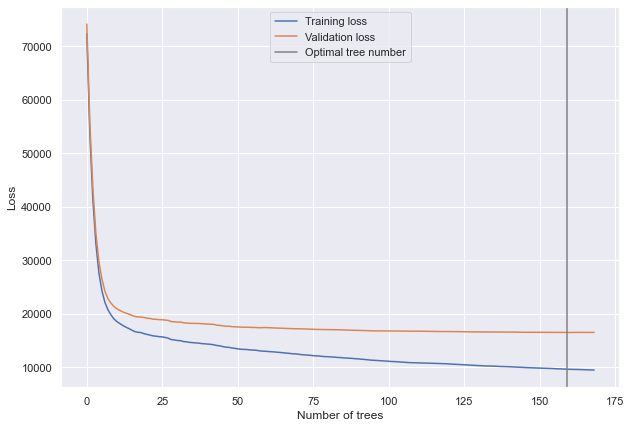

In [401]:
results = xgb_model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(model.best_ntree_limit, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [402]:
xgb_model.best_ntree_limit

159

In [403]:
y_xgb_train_pred = xgb_model.predict(X_train)
y_xgb_test_pred = xgb_model.predict(X_test)

In [404]:
np.sqrt(metrics.mean_squared_error(y_train, y_xgb_train_pred))

9646.901432570277

In [405]:
np.sqrt(metrics.mean_squared_error(y_test, y_xgb_test_pred))

16482.679700739154

In [433]:
metrics.r2_score(y_train, y_xgb_train_pred)

0.9830589214158106

In [435]:
metrics.r2_score(y_test, y_xgb_test_pred)

0.9533885592563119

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

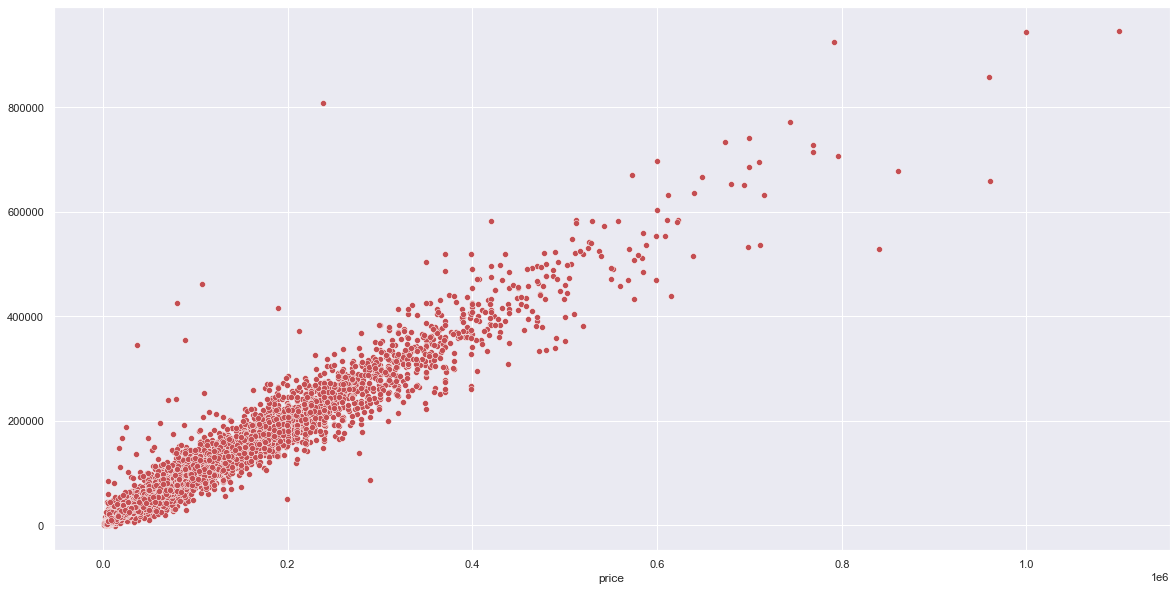

In [436]:
# Check for Linearity
f = plt.figure(figsize=(20, 10))
sns.scatterplot(y_test, y_xgb_test_pred, color="r")
#sns.regplot(y_test, y_pred_test_rf, color='r')
ax.set_title("Actual Vs Predicted value")

In [406]:
# save
xgb_model.save_model("xgboost_model.json")

# load
#new_model = xgb.XGBRegressor()
#new_model.laod_model("my_xgboost.json")

# check optimal number of trees of loaded model
#new_model.best_ntree_limit

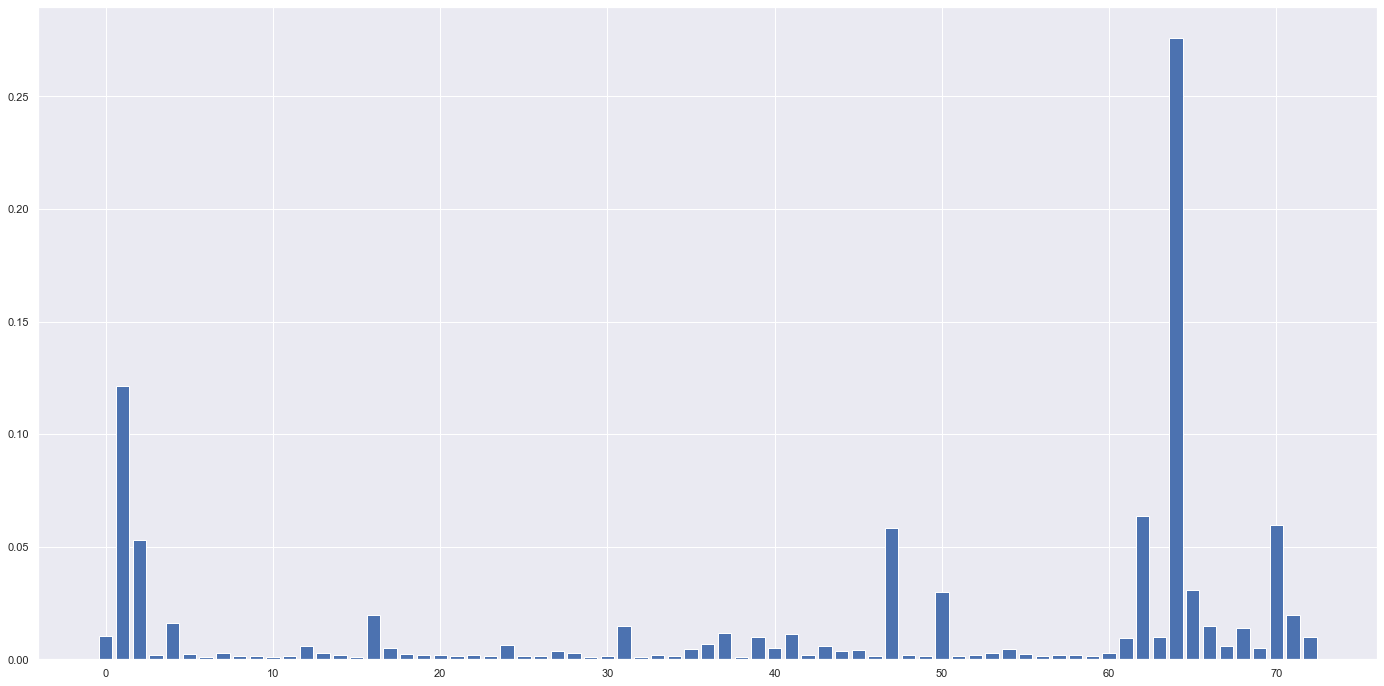

In [409]:
# plot
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.show()

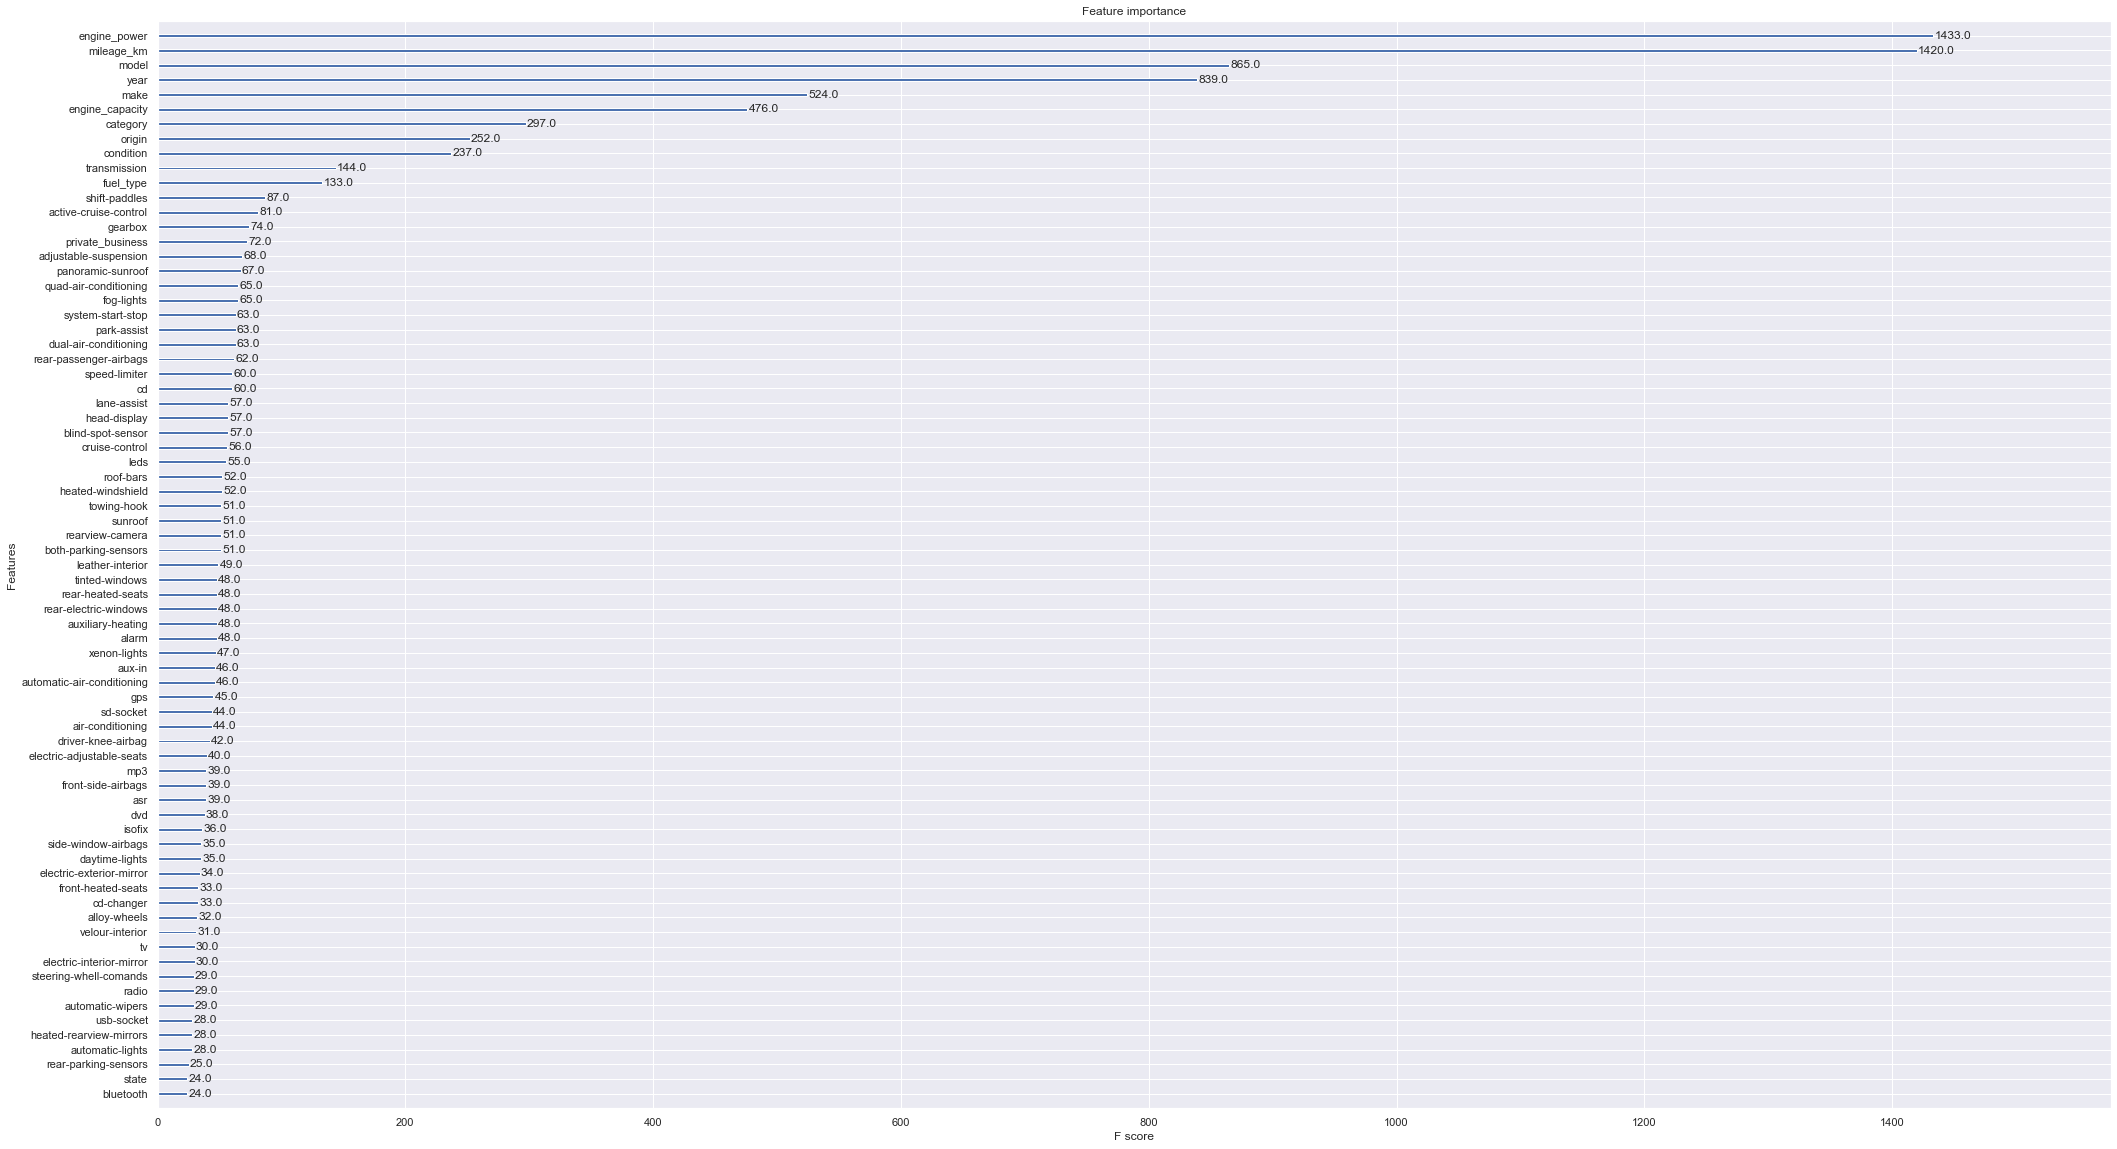

In [414]:
from xgboost import plot_importance
# plot feature importance
plt.rcParams["figure.figsize"] = (35,20)


plot_importance(xgb_model)
plt.show()

In [431]:
# Fit model using each importance as a threshold
thresholds = np.sort(xgb_model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBRegressor()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    print("Thresh=%.3f, n=%d, RMSE: %.2f" % (thresh, select_X_train.shape[1], rmse))

Thresh=0.001, n=73, RMSE: 16772.73
Thresh=0.001, n=72, RMSE: 16725.20
Thresh=0.001, n=71, RMSE: 16841.79
Thresh=0.001, n=70, RMSE: 16788.31
Thresh=0.001, n=69, RMSE: 16760.77
Thresh=0.001, n=68, RMSE: 16671.15
Thresh=0.001, n=67, RMSE: 16881.00
Thresh=0.001, n=66, RMSE: 16804.04
Thresh=0.001, n=65, RMSE: 16646.52
Thresh=0.001, n=64, RMSE: 16835.07
Thresh=0.001, n=63, RMSE: 16771.82
Thresh=0.001, n=62, RMSE: 16690.58
Thresh=0.002, n=61, RMSE: 16628.35
Thresh=0.002, n=60, RMSE: 16686.37
Thresh=0.002, n=59, RMSE: 16699.43
Thresh=0.002, n=58, RMSE: 16822.82
Thresh=0.002, n=57, RMSE: 16718.40
Thresh=0.002, n=56, RMSE: 16597.20
Thresh=0.002, n=55, RMSE: 16472.59
Thresh=0.002, n=54, RMSE: 16575.51
Thresh=0.002, n=53, RMSE: 16503.55
Thresh=0.002, n=52, RMSE: 16638.04
Thresh=0.002, n=51, RMSE: 16367.82
Thresh=0.002, n=50, RMSE: 16732.52
Thresh=0.002, n=49, RMSE: 16708.02
Thresh=0.002, n=48, RMSE: 16572.27
Thresh=0.002, n=47, RMSE: 16476.44
Thresh=0.002, n=46, RMSE: 16488.74
Thresh=0.002, n=45, 